In [ ]:
!pip install optuna

In [ ]:
# Veri işleme
import pandas as pd
import numpy as np
import re
import ast
import json
from collections import defaultdict
from itertools import combinations

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - Ön işleme
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler

# PyTorch
import torch

# Optimizasyon
import optuna
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!git clone https://github.com/Abmn0/emlak_dataset.git

fatal: destination path 'emlak_dataset' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv("emlak_dataset/output.csv")

In [ ]:
df.head()

listingId  realtyId    no  \
0    78883-704  43672903   704   
1   54537-3457  42399668  3457   
2   116181-160  40773651   160   
3    18262-757  42174714   757   
4  131612-1792  44126172  1792   

                                               title  \
0  ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...   
1  SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...   
2             Sapanca,Kırkpınar’da Satılık 4+1 Villa   
3  EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...   
4  3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...   

                             descriptionPhoneNumbers  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [{"number":"+905322368449","extension":null,"f...   

                                         description     price currency  \
0  <h2 style=\"text-align: center;\"><strong styl...   2500000       TL   
1  <p style=\"text-align: center;\"><br></p>\n<p ...   1500000       TL   
2  <p>https://app.immoviewer.com/portal/tour/2907...  19500000       TL   
3  <p><br></p>\n<p style=\"text-align: center;\">...   3350000       TL   
4  <p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...   3700000       TL   

   currencyId                     startDate                       endDate  \
0         1.0  2025-02-07T07:33:35.387+0000  2025-05-08T07:33:35.387+0000   
1         1.0  2025-01-10T11:50:32.547+0000  2025-04-13T08:24:27.627+0000   
2         1.0  2025-02-05T06:56:17.923+0000  2025-05-06T06:56:17.923+0000   
3         1.0  2025-02-12T12:23:38.413+0000  2025-05-13T13:02:20.187+0000   
4         1.0  2025-02-01T09:09:15.317+0000  2025-05-02T09:09:15.317+0000   

   publishId  housingEstate  useContactInfo                    contact  bid  \
0        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   
1        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   
2        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   
3        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   
4        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   

                                              images  locationId  \
0  ["ds01/3/0/9/2/7/6/3/4/926b09a1-1a3e-4488-b8d2...         NaN   
1  ["ds01/8/6/6/9/9/3/2/4/7a1de059-f7eb-4976-a938...         NaN   
2  ["ds01/1/5/6/3/7/7/0/4/1683795523-457676-40773...         NaN   
3  ["ds01/4/1/7/4/7/1/2/4/de21c2b3-96f6-40a4-b4df...         NaN   
4  ["ds01/2/7/1/6/2/1/4/4/cf2bbd94-1da8-4fc7-9b08...         NaN   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county  \
0  {"id":2068,"name":"Adapazarı","tier":2}   
1     {"id":1442,"name":"Karasu","tier":2}   
2    {"id":1595,"name":"Sapanca","tier":3}   
3     {"id":1442,"name":"Karasu","tier":2}   
4    {"id":1818,"name":"Kocaali","tier":4}   

                                  city  address  showAddress  \
0  {"id":54,"name":"Sakarya","tier":2}      NaN          NaN   
1  {"id":54,"name":"Sakarya","tier":2}      NaN          NaN   
2  {"id":54,"name":"Sakarya","tier":2}      NaN          NaN   
3  {"id":54,"name":"Sakarya","tier":2}      NaN          NaN   
4  {"id":54,"name":"Sakarya","tier":2}      NaN          NaN   

In [ ]:
df.shape

(2180, 135)

ÇALIŞMA KAPSAMINDA ODAKLANDIĞIMIZ KESİM SAKARYADAKİ KONUT İLANLARI

In [ ]:
# Sakarya olmayanları filtrele:
df[df['city'].apply(json.loads).apply(lambda x: x['name'] != 'Sakarya')]

listingId  realtyId   no  \
281  147368-154  44104804  154   
283  147368-156  44104806  156   
284  147368-157  44104808  157   

                                                 title  \
281  SİLİVRİ DEĞİRMENKÖYDE 1920 M2 SATILIK YATIRIM ...   
283  TEKİRDAĞ ERGENEDE %30 - 3 KAT İMARLI 321 M2 SA...   
284  ORMANA CEPHE İLÇE MERKEZE YAKIN MESAFEDE 3571 ...   

    descriptionPhoneNumbers  \
281                      []   
283                      []   
284                      []   

                                           description    price currency  \
281  <p>SİLİVRİ DEĞİRMENKÖY MAHALLESİNDE , YEŞİLLİK...  3950000       TL   
283                                                NaN   995000       TL   
284  <p>ORMANA CEPHE , YOL PROBLEMİ YOK , İLÇE MERK...   910000       TL   

     currencyId                     startDate                       endDate  \
281         1.0  2025-01-28T00:03:03.307+0000  2025-04-28T00:03:03.307+0000   
283         1.0  2025-01-28T00:05:03.497+0000  2025-04-28T00:05:03.497+0000   
284         1.0  2025-01-28T00:06:04.443+0000  2025-04-28T00:06:04.443+0000   

     publishId  housingEstate  useContactInfo                    contact  bid  \
281        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   
283        NaN            NaN             NaN                        NaN  NaN   
284        NaN            NaN             NaN  {"name":null,"phones":[]}  NaN   

                                                images  locationId  \
281  ["ds01/4/0/8/4/0/1/4/4/576f408f-af7b-4e31-8f2e...         NaN   
283  ["ds01/6/0/8/4/0/1/4/4/ca12170c-70f7-4210-9055...         NaN   
284  ["ds01/8/0/8/4/0/1/4/4/b3918d24-0f7e-46ff-b937...         NaN   

                                 areas  \
281  [{"id":980,"name":"Değirmenköy"}]   
283                                 []   
284    [{"id":2234,"name":"Kaynarca"}]   

                                              district  \
281           {"id":12724,"name":"İsmetpaşa","tier":1}   
283            {"id":105879,"name":"Misinli","tier":4}   
284  {"id":105746,"name":"Kaynarca (Akarlar)","tier...   

                                       county  \
281     {"id":1622,"name":"Silivri","tier":1}   
283      {"id":2117,"name":"Ergene","tier":4}   
284  {"id":1577,"name":"Pınarhisar","tier":4}   

                                       city  address  showAddress residence  \
281    {"id":34,"name":"İstanbul","tier":1}      NaN          NaN       NaN   
283    {"id":59,"name":"Tekirdağ","tier":1}      NaN          NaN       NaN   
284  {"id":39,"name":"Kırklareli","tier":2}      NaN          NaN       NaN   

    timeShareName  timeShareTerm room livingRoom  bathRoom  advertiseOwner  \
281           NaN            NaN  [0]        [0]         0             NaN   
283           NaN            NaN  [0]        [0]         0             NaN   
284           NaN            NaN  [0]        [0]         0             NaN   

     isMapHidden                                        mapLocation  \
281        False  {"lat":41.117543175797415,"lon":28.02009456898...   
283        False  {"lat":41.31657946284044,"lon":27.603797082972...   
284        False  {"lat":41.65647665954447,"lon":27.43068528444855}   

     mapZoomLevel streetView                   createdDate  \
281           NaN      False  2025-01-28T00:03:02.987+0000   
283           NaN        NaN  2025-01-28T00:05:03.053+0000   
284           NaN      False  2025-01-28T00:06:04.153+0000   

                  updatedDate        listingUpdatedDate  showPrice  projectId  \
281  2025-01-28T00:03:09.767Z  2025-01-28T00:03:02.987Z        NaN        NaN   
283  2025-02-18T09:53:54.100Z  2025-01-28T00:05:03.053Z        NaN        NaN   
284  2025-01-28T00:06:11.737Z  2025-01-28T00:06:04.153Z        NaN        NaN   

                                                   sqm  numberOfBuilding  \
281  {"netSqm":0,"grossSqm":[5120],"indoorGrossSqm"...               0.0   
283  {"netSqm":0,"grossSqm":[321],"indoorGr

In [ ]:
# Konut olmayanları filtrele:
df[df['mainCategory'].apply(json.loads).apply(lambda x: x['name'] != 'Konut')]

listingId  realtyId   no  \
280  147368-153  44104802  153   
281  147368-154  44104804  154   
282  147368-155  44104805  155   
283  147368-156  44104806  156   
284  147368-157  44104808  157   
285  147368-158  44104809  158   
286  147368-159  44104810  159   
291  147368-164  44270668  164   
292  147368-165  44270678  165   
293  147368-166  44270682  166   
294  147368-167  44270691  167   
297  120340-614  43911508  614   
298  120340-615  43911652  615   

                                                 title  \
280  MANZARALI ORMANA CEPHE YOL PROBLEMİ YOK 4.088 ...   
281  SİLİVRİ DEĞİRMENKÖYDE 1920 M2 SATILIK YATIRIM ...   
282  PANOROMİK BİR MANZARAYA SAHİP %40 KONUT İMARLI...   
283  TEKİRDAĞ ERGENEDE %30 - 3 KAT İMARLI 321 M2 SA...   
284  ORMANA CEPHE İLÇE MERKEZE YAKIN MESAFEDE 3571 ...   
285  ACİL İMAR SINIRINDA MUHTEŞEM MANZARALI YATIRIM...   
286  YOL SU ELEKTRİK MEVCUT İMAR SINIRINDA 2.555 M2...   
291  ARAÇ TAKASLI 1850 M2 K.ALANLI ASFALT KENARI İÇ...   
292  TİCARİ FALİYETLERE UYGUN ANAYOL KENARI SATILIK...   
293  E-5 KARAYOLUNA 200 METRE MESAFEDE 1400 M2 SATI...   
294  ELEPEREK MAHALLESİNDE %40-3 KAT KONUT İMARLI S...   
297  EVARSAL EMLAK OFİSİNDEN KÖY İÇİ ASFALTYOL CEPH...   
298  EVARSAL EMLAK OFİSİNDEN KÖY İÇİ %40 İMARLI SAT...   

    descriptionPhoneNumbers  \
280                      []   
281                      []   
282                      []   
283                      []   
284                      []   
285                      []   
286                      []   
291                      []   
292                      []   
293                      []   
294                      []   
297                      []   
298                      []   

                                           description    price currency  \
280  <p>MANZARALI VE HAVADAR BİR KONUMA SAHİP , ORM...  1350000       TL   
281  <p>SİLİVRİ DEĞİRMENKÖY MAHALLESİNDE , YEŞİLLİK...  3950000       TL   
282  <p>ETRAFI ÇEVRİLİ , MUHTEŞEM BİR MANZARAYA SAH...  1850000       TL   
283                                                NaN   995000       TL   
284  <p>ORMANA CEPHE , YOL PROBLEMİ YOK , İLÇE MERK...   910000       TL   
285  <p>HÜSEYİNLİ KÖYÜNDE İMAR SINIRINDA&nbsp;</p> ...  1975000       TL   
286  <p>İÇME SUYU VE ELEKTRİK ÇOK YAKIN MESAFEDE , ...  2485000       TL   
291  <p>SAKARYA PAMUKOVA ŞEYHVARMAZ MAHALLESİNE KAY...  1285000       TL   
292  <p>TİCARİ FALİYETLERE UYGUN , ANAYOL KENARINDA...  4200000       TL   
293  <p>İSTANBUL-ANTALYA ANAYOLUNA 200 METRE MESAFE...   850000       TL   
294  <p>PAMUKOVANIN EN GÖZDE YAPSATIN BOL OLDUĞU MA...  3100000       TL   
297  <p>EVARSAL EMLAK OFİSİNDEN SAKARYA İLİ ADAPAZA...  3650000       TL   
298  EVARSAL EMLAK OFİSİNDEN KAYNARCA-OSMANLI MAHAL...  1350000       TL   

     currencyId                     startDate                       endDate  \
280         1.0  2025-03-03T07:43:00.887+0000  2025-06-01T07:43:00.887+0000   
281         1.0  2025-01-28T00:03:03.307+0000  2025-04-28T00:03:03.307+0000   
282         1.0  2025-03-03T07:43:00.980+0000  2025-06-01T07:43:00.980+0000   
283         1.0  2025-01-28T00:05:03.497+0000  2025-04-28T00:05:03.497+0000   
284         1.0  2025-01-28T00:06:04.443+0000  2025-04-28T00:06:04.443+0000   
285         1.0  2025-01-28T00:07:06.637+0000  2025-04-28T00:07:06.637+0000   
286         1.0  2025-01-28T00:08:06.927+0000  2025-05-22T13:53:25.200+0000   
291         1.0  2025-03-03T07:45:04.297+0000  2025-06-01T07:45:04.297+0000   
292         1.0  2025-03-03T07:46:16.893+0000  2025-06-01T07:46:16.893+0000   
293         1.0  2025-03-03T07:47:03.547+0000  2025-06-01T07:47:03.547+0000   
294         1.0  2025-03-03T07:48:03.630+0000  2025-06-01T07:48:03.630+0000   
297         1.0  2024-12-23T20:44:26.543+0000  2025-03-23T20:44:26.543+0000   
298         1.0  2024-12-24T05:35:33.020+0000  2025-04-23T08:03:53.980+0000   

     publishId  housingEstate  useContactInfo                    contact  bid  \
280        NaN            Na

In [ ]:
# 1. Sakarya dışı veya konut olmayan ilanların silinmesi
def first_mistakes(df):
    df = df[~(df['city'].apply(json.loads).apply(lambda x: x['name'] != 'Sakarya'))]
    df = df[~(df['mainCategory'].apply(json.loads).apply(lambda x: x['name'] != 'Konut'))]
    return df
df = first_mistakes(df)

Aslında İstanbul, Kırklareli, Tekirdağ illeri de arsa idi ancak gözümüzden kaçmadı :)


In [ ]:
df.shape

(2167, 135)

--- remove_empty_columns FONKSİYONU ÖNCESİ ---
DataFrame Boyutu (Satır, Sütun):
(2167, 135)

Sütunlardaki Eksik Değer Sayıları (ÖNCESİ):
advertiseOwner                  2167
address                         2167
locationId                      2167
bid                             2167
publishId                       2167
useContactInfo                  2167
housingEstate                   2167
gabarite                        2167
groundStudies                   2167
checkInTime                     2167
realtyPermitDocumentNo          2167
fixedDailyPriceCurrencyId       2167
cleaningFeeCurrency             2167
period                          2167
showAddress                     2167
mapZoomLevel                    2167
showPrice                       2167
activateId                      2167
balcony                         2167
cleanLandRegisterStateTypeId    2167
cleanLandRegisterFilePath       2167
star                            2167
projectId                       2167
registerId  

<ipython-input-441-ef8c2d836aa2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent_once.index, y=missing_percent_once.values, palette='viridis')


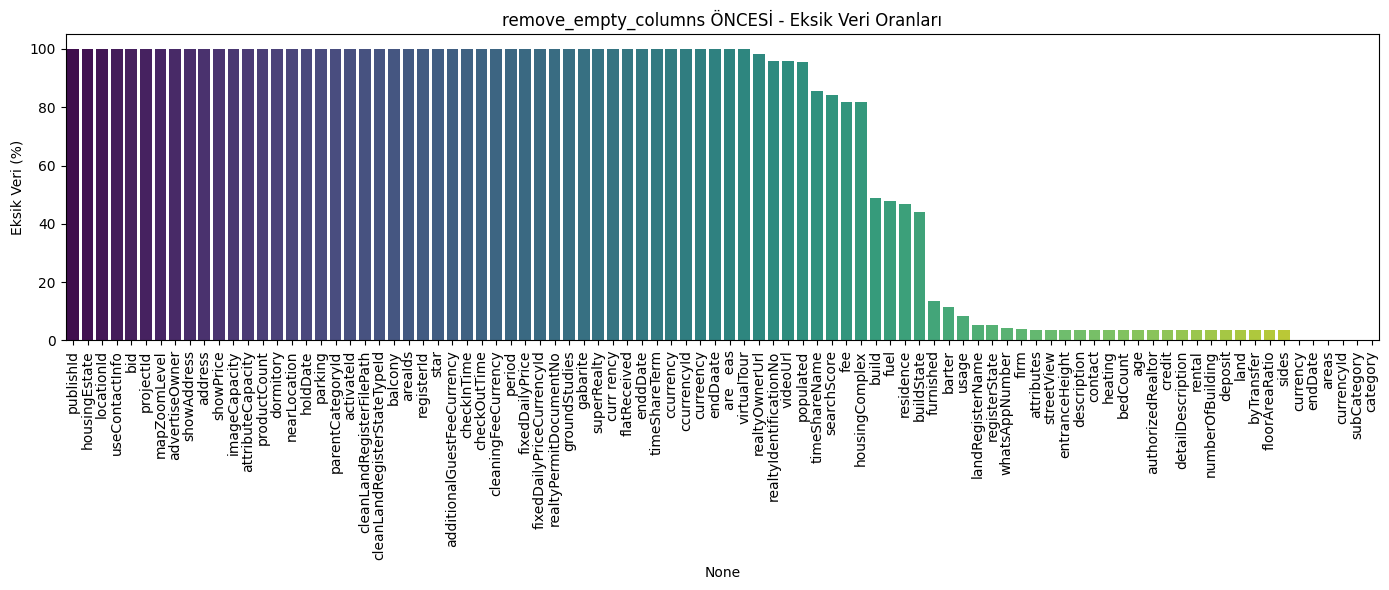

--- Fonksiyon öncesi analiz tamamlandı ---

--- remove_empty_columns FONKSİYONU SONRASI ---
DataFrame Boyutu (Satır, Sütun):
(2167, 98)

Sütunlardaki Eksik Değer Sayıları (SONRASI):
timeShareTerm              2166
flatReceived               2166
are   eas                  2166
curr rency                 2166
enddDate                   2166
ccurrency                  2166
ccurrencyId                2166
endDaate                   2166
curreency                  2166
virtualTour                2165
realtyOwnerUrl             2127
realtyIdentificationNo     2079
videoUrl                   2079
populated                  2067
timeShareName              1857
searchScore                1827
fee                        1775
housingComplex             1772
build                      1062
fuel                       1040
residence                  1018
buildState                  956
furnished                   295
barter                      247
usage                       183
registerState     

<ipython-input-441-ef8c2d836aa2>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent_sonra.index, y=missing_percent_sonra.values, palette='viridis')


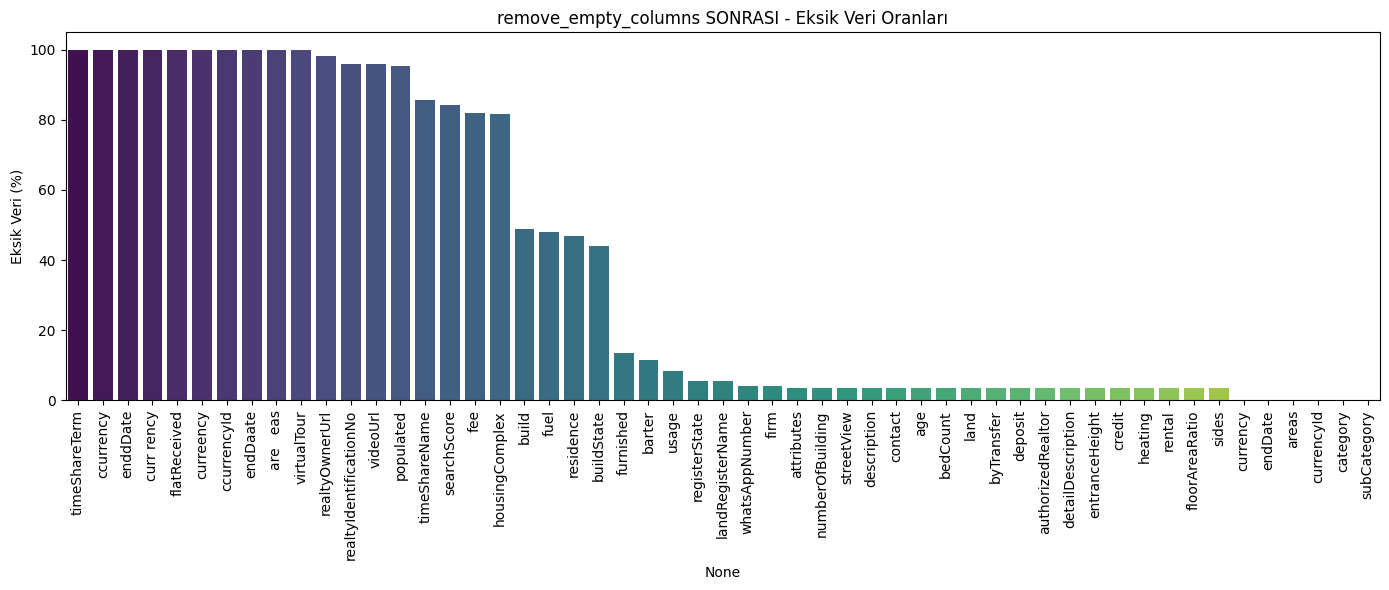

--- Fonksiyon sonrası analiz tamamlandı ---



In [ ]:
print("--- remove_empty_columns FONKSİYONU ÖNCESİ ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)

print("\nSütunlardaki Eksik Değer Sayıları (ÖNCESİ):")
eksik_degerler_once = df.isna().sum()
print(eksik_degerler_once[eksik_degerler_once >= 0].sort_values(ascending=False))  # Tüm sütunları gösterir

# Eksik Veri Oranlarını Gösteren Bar Grafiği (ÖNCESİ)
missing_percent_once = df.isna().mean() * 100
missing_percent_once = missing_percent_once[missing_percent_once > 0].sort_values(ascending=False)

if not missing_percent_once.empty:
    plt.figure(figsize=(14, 6))
    sns.barplot(x=missing_percent_once.index, y=missing_percent_once.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.ylabel("Eksik Veri (%)")
    plt.title("remove_empty_columns ÖNCESİ - Eksik Veri Oranları")
    plt.tight_layout()
    plt.show()
else:
    print("Eksik veri bulunamadı.")

print("--- Fonksiyon öncesi analiz tamamlandı ---\n")

# 1. Hiç değeri olmayan sütunları silen fonksiyon
def remove_empty_columns(df):
    empty_cols = [col for col in df.columns if df[col].isna().all()]
    df = df.drop(columns=empty_cols)
    return df

df = remove_empty_columns(df)

print("--- remove_empty_columns FONKSİYONU SONRASI ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)

print("\nSütunlardaki Eksik Değer Sayıları (SONRASI):")
eksik_degerler_sonra = df.isna().sum()
print(eksik_degerler_sonra[eksik_degerler_sonra >= 0].sort_values(ascending=False))

# Eksik Veri Oranlarını Gösteren Bar Grafiği (SONRASI)
missing_percent_sonra = df.isna().mean() * 100
missing_percent_sonra = missing_percent_sonra[missing_percent_sonra > 0].sort_values(ascending=False)

if not missing_percent_sonra.empty:
    plt.figure(figsize=(14, 6))
    sns.barplot(x=missing_percent_sonra.index, y=missing_percent_sonra.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.ylabel("Eksik Veri (%)")
    plt.title("remove_empty_columns SONRASI - Eksik Veri Oranları")
    plt.tight_layout()
    plt.show()
else:
    print("Eksik veri bulunamadı.")

print("--- Fonksiyon sonrası analiz tamamlandı ---\n")


--- remove_single_value_columns FONKSİYONU ÖNCESİ ---
DataFrame Boyutu (Satır, Sütun):
(2167, 98)

Sütunlardaki Benzersiz Değer Sayıları (NaN hariç) (ÖNCESİ):
currencyId                    1
timeShareTerm                 1
numberOfBuilding              1
entranceHeight                1
streetView                    1
city                          1
timeShareName                 1
bedCount                      1
flatReceived                  1
byTransfer                    1
populated                     1
mainCategory                  1
are   eas                     1
ccurrency                     1
endDaate                      1
curreency                     1
entertainmentAllowed          1
guestCount                    1
invoiceIncluded               1
maximumStay                   1
minimumStay                   1
petAllowed                    1
doubleBedCount                1
singleBedCount                1
listingPropertyOrder          1
curr rency                    1
enddDate 

<ipython-input-442-c2ce128171a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


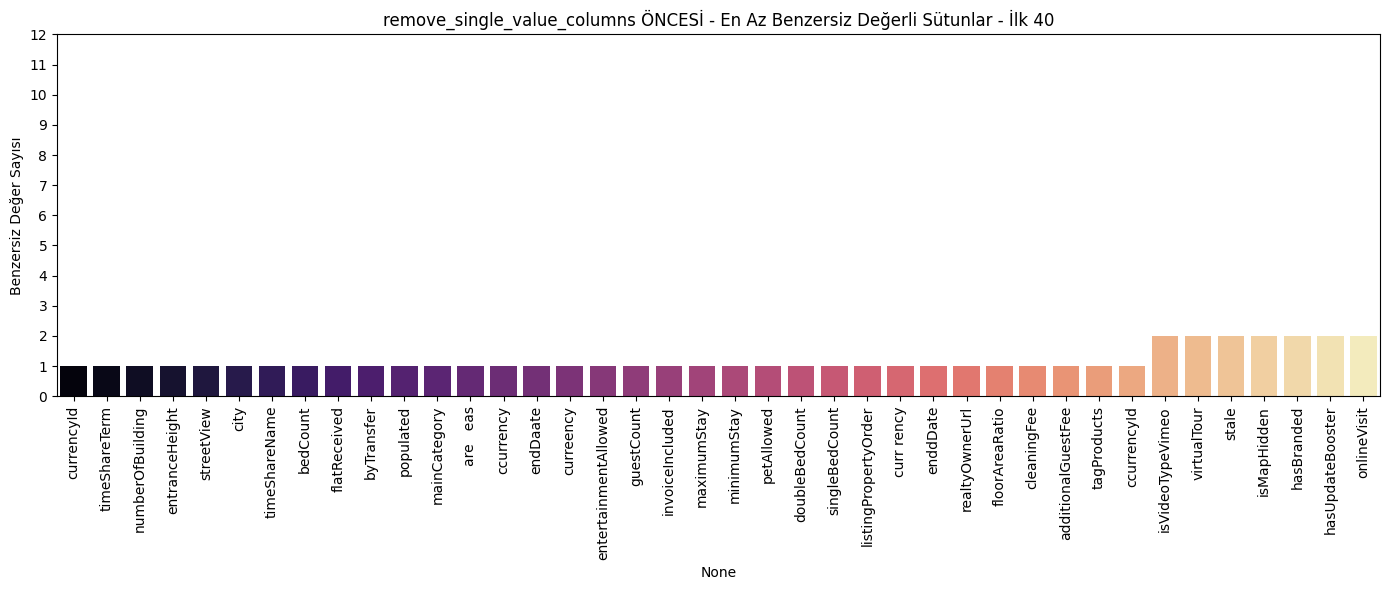

--- Fonksiyon öncesi analiz tamamlandı ---

--- remove_single_value_columns FONKSİYONU SONRASI ---
DataFrame Boyutu (Satır, Sütun):
(2167, 65)

Sütunlardaki Benzersiz Değer Sayıları (NaN hariç) (SONRASI):
currency                      2
isMapHidden                   2
virtualTour                   2
onlineVisit                   2
hasBranded                    2
hasUpdateBooster              2
furnished                     2
authorizedRealtor             2
stale                         2
isVideoTypeVimeo              2
deposit                       3
category                      4
livingRoom                    5
credit                        8
barter                        9
fuel                          9
buildState                   10
build                        11
redirectLink                 11
featuringProducts            12
bathRoom                     12
usage                        13
room                         13
residence                    15
landRegisterName           

<ipython-input-442-c2ce128171a4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


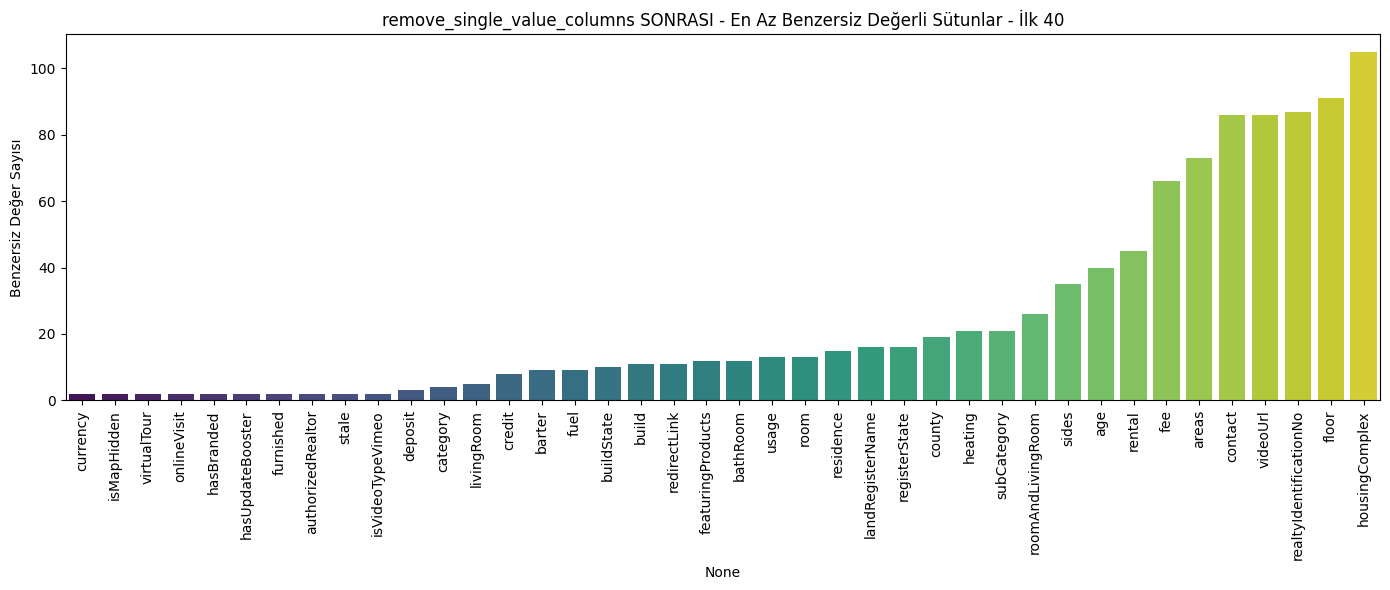

--- Fonksiyon sonrası analiz tamamlandı ---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- remove_single_value_columns FONKSİYONU ÖNCESİ ---
print("--- remove_single_value_columns FONKSİYONU ÖNCESİ ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)

print("\nSütunlardaki Benzersiz Değer Sayıları (NaN hariç) (ÖNCESİ):")
benzersiz_deger_sayilari_once = df.nunique(dropna=True)
print(benzersiz_deger_sayilari_once.sort_values())

# Görselleştirme: En az benzersiz değere sahip 20 sütun
plt.figure(figsize=(14, 6))
sns.barplot(
    x=benzersiz_deger_sayilari_once.sort_values().head(40).index,
    y=benzersiz_deger_sayilari_once.sort_values().head(40).values,
    palette="magma"
)
plt.title("remove_single_value_columns ÖNCESİ - En Az Benzersiz Değerli Sütunlar - İlk 40")
plt.ylabel("Benzersiz Değer Sayısı")
plt.xticks(rotation=90)


plt.yticks(np.arange(0, 13, 1))
plt.tight_layout()
plt.show()

print("--- Fonksiyon öncesi analiz tamamlandı ---\n")

# 3. Tek çeşit değer içeren sütunları silen fonksiyon
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].dropna().unique()
        if len(unique_values) <= 1:
            single_value_cols.append(col)

    df = df.drop(columns=single_value_cols)
    return df

df = remove_single_value_columns(df)

# --- remove_single_value_columns FONKSİYONU SONRASI ---
print("--- remove_single_value_columns FONKSİYONU SONRASI ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)

print("\nSütunlardaki Benzersiz Değer Sayıları (NaN hariç) (SONRASI):")
benzersiz_deger_sayilari_sonra = df.nunique(dropna=True)
print(benzersiz_deger_sayilari_sonra.sort_values())

# Görselleştirme: En az benzersiz değere sahip 20 sütun (SONRASI)
plt.figure(figsize=(14, 6))
sns.barplot(
    x=benzersiz_deger_sayilari_sonra.sort_values().head(40).index,
    y=benzersiz_deger_sayilari_sonra.sort_values().head(40).values,
    palette="viridis"
)
plt.title("remove_single_value_columns SONRASI - En Az Benzersiz Değerli Sütunlar - İlk 40")
plt.ylabel("Benzersiz Değer Sayısı")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("--- Fonksiyon sonrası analiz tamamlandı ---\n")


In [ ]:
df.head()

listingId  realtyId    no  \
0    78883-704  43672903   704   
1   54537-3457  42399668  3457   
2   116181-160  40773651   160   
3    18262-757  42174714   757   
4  131612-1792  44126172  1792   

                                               title  \
0  ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...   
1  SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...   
2             Sapanca,Kırkpınar’da Satılık 4+1 Villa   
3  EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...   
4  3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...   

                             descriptionPhoneNumbers  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [{"number":"+905322368449","extension":null,"f...   

                                         description     price currency  \
0  <h2 style=\"text-align: center;\"><strong styl...   2500000       TL   
1  <p style=\"text-align: center;\"><br></p>\n<p ...   1500000       TL   
2  <p>https://app.immoviewer.com/portal/tour/2907...  19500000       TL   
3  <p><br></p>\n<p style=\"text-align: center;\">...   3350000       TL   
4  <p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...   3700000       TL   

                      startDate                       endDate  \
0  2025-02-07T07:33:35.387+0000  2025-05-08T07:33:35.387+0000   
1  2025-01-10T11:50:32.547+0000  2025-04-13T08:24:27.627+0000   
2  2025-02-05T06:56:17.923+0000  2025-05-06T06:56:17.923+0000   
3  2025-02-12T12:23:38.413+0000  2025-05-13T13:02:20.187+0000   
4  2025-02-01T09:09:15.317+0000  2025-05-02T09:09:15.317+0000   

                     contact  \
0  {"name":null,"phones":[]}   
1  {"name":null,"phones":[]}   
2  {"name":null,"phones":[]}   
3  {"name":null,"phones":[]}   
4  {"name":null,"phones":[]}   

                                              images  \
0  ["ds01/3/0/9/2/7/6/3/4/926b09a1-1a3e-4488-b8d2...   
1  ["ds01/8/6/6/9/9/3/2/4/7a1de059-f7eb-4976-a938...   
2  ["ds01/1/5/6/3/7/7/0/4/1683795523-457676-40773...   
3  ["ds01/4/1/7/4/7/1/2/4/de21c2b3-96f6-40a4-b4df...   
4  ["ds01/2/7/1/6/2/1/4/4/cf2bbd94-1da8-4fc7-9b08...   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county                        residence  \
0  {"id":2068,"name":"Adapazarı","tier":2}     {"id":101004,"name":"Daire"}   
1     {"id":1442,"name":"Karasu","tier":2}                              NaN   
2    {"id":1595,"name":"Sapanca","tier":3}   {"id":101005,"name":"Dubleks"}   
3     {"id":1442,"name":"Karasu","tier":2}     {"id":101004,"name":"Daire"}   
4    {"id":1818,"name":"Kocaali","tier":4}  {"id":101008,"name":"Tripleks"}   

  room livingRoom  bathRoom  isMapHidden  \
0  [3]        [1]         1        False   
1  [2]        [1]         1        False   
2  [4]        [1]         2        False   
3  [3]        [1]         1        False   
4  [3]        [1]         3        False   

                                         mapLocation  \
0  {"lat":40.78177696011071,"lon":30.400175993150...   
1  {"lat":41.10962272499753,"lon":30.692469430880...   
2  {"lat":40.701133631737555,"lon":30.21435713528...   
3  {"lat":41.10212238429355,"lon":30.681114194206...   
4  {"lat":41.07494321848645,"lon":30.85647390116245}   

         

description, title, detailDescription =Serbest metin   
currency, contact, mapLocation, firmUser = 	Veri taşımıyor ya da kullanılamaz yapıda  
  videoUrl, virtualTour, images =Görsel bağlantılar, model açısından faydasız
                
whatsAppNumber, descriptionPhoneNumbers =	özel veri gizlilik açısından sakıncalı

realtyIdentificationNo, listingId =Benzersiz kimlik – modelin öğrenmesine katkısı yok

category, featuringProducts, deposit = Veri eksik, tekrar eden ya da çok seyrek olan sütunlar


In [ ]:
print("--- remove_columns FONKSİYONU ÖNCESİ ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)

# 4. Belirtilen sütunları silen fonksiyon
def remove_columns(df):
    columns_to_drop = ['title','description','currency','contact','images','mapLocation','listingUpdatedDate','land','timeShareName',
                       'deposit','detailUrl','firmUser','category','videoUrl','featuringProducts','whatsAppNumber','virtualTour',
                       'realtyIdentificationNo','listingId.1','realtyId	no','descriptionPhoneNumbers', 'detailDescription','deposit','landRegisterName']
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=existing_columns, inplace=True)
    return df

df = remove_columns(df)

print("\n--- remove_columns FONKSİYONU SONRASI ---")
print("DataFrame Boyutu (Satır, Sütun):")
print(df.shape)


--- remove_columns FONKSİYONU ÖNCESİ ---
DataFrame Boyutu (Satır, Sütun):
(2167, 65)

--- remove_columns FONKSİYONU SONRASI ---
DataFrame Boyutu (Satır, Sütun):
(2167, 44)


In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  \
0  2025-05-08T07:33:35.387+0000   
1  2025-04-13T08:24:27.627+0000   
2  2025-05-06T06:56:17.923+0000   
3  2025-05-13T13:02:20.187+0000   
4  2025-05-02T09:09:15.317+0000   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county                        residence  \
0  {"id":2068,"name":"Adapazarı","tier":2}     {"id":101004,"name":"Daire"}   
1     {"id":1442,"name":"Karasu","tier":2}                              NaN   
2    {"id":1595,"name":"Sapanca","tier":3}   {"id":101005,"name":"Dubleks"}   
3     {"id":1442,"name":"Karasu","tier":2}     {"id":101004,"name":"Daire"}   
4    {"id":1818,"name":"Kocaali","tier":4}  {"id":101008,"name":"Tripleks"}   

  room livingRoom  bathRoom  isMapHidden                   createdDate  \
0  [3]        [1]         1        False  2024-11-08T10:10:32.780+0000   
1  [2]        [1]         1        False  2024-03-23T02:16:07.357+0000   
2  [4]        [1]         2        False  2023-05-11T08:56:04.663+0000   
3  [3]        [1]         1        False  2024-02-08T12:37:36.627+0000   
4  [3]        [1]         3        False  2025-02-01T09:05:23.047+0000   

                updatedDate  \
0  2025-02-07T07:33:35.410Z   
1  2025-01-13T08:24:27.637Z   
2  2025-02-05T06:56:17.940Z   
3  2025-02-12T13:02:20.197Z   
4  2025-02-01T09:11:19.287Z   

                                                 sqm  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   

                                     floor   age  \
0  {"id":101216,"count":4,"name":"2. Kat"}  30.0   
1  {"id":101216,"count":3,"name":"2. Kat"}   0.0   
2        {"id":null,"count":2,"name":null}  10.0   
3  {"id":101217,"count":3,"name":"3. Kat"}   0.0   
4        {"id":null,"count":3,"name":null}   0.0   

                        heating                             fuel  \
0  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
1  {"id":101304,"name":"Kombi"}                              NaN   
2  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
3  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
4  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   

                              build                        buildState  \
0  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
1                               NaN                               NaN   
2  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
3                               NaN      {"id":101601,"name":"Sıfır"}   
4  {"id":101502,"name":"Betonarme"}      {"id":101601,"name":"Sıfır"}   

                        usage                        credit  \
0  {"id":1017

In [ ]:
for description_text in df['attributes'].head(10):
    print("  ",description_text)
    print("-" * 50)

   {"inAttributes":[{"id":1,"name":"ADSL"},{"id":16,"name":"Balkon"},{"id":31,"name":"Çelik Kapı"},{"id":73,"name":"Isıcam"},{"id":79,"name":"Kablo TV-Uydu"},{"id":114,"name":"Mutfak Doğalgazı"},{"id":125,"name":"Panel Kapı"},{"id":127,"name":"Parke"},{"id":139,"name":"Saten Boya"},{"id":142,"name":"Seramik Zemin"}],"outAttributes":[{"id":121,"name":"Otopark - Açık"},{"id":134,"name":"PVC Doğrama"}],"locationAttributes":[{"id":328,"name":"Cadde Üzerinde"},{"id":26,"name":"Caddeye yakın"},{"id":331,"name":"E-5'e yakın"},{"id":94,"name":"Manzara"},{"id":100,"name":"Manzara - Şehir"},{"id":104,"name":"Merkezde"},{"id":333,"name":"Minibüs / Dolmuşa yakın"},{"id":118,"name":"Otobana yakın"},{"id":124,"name":"Ön cephe"},{"id":332,"name":"TEM'e yakın"},{"id":162,"name":"Toplu Ulaşıma yakın"}],"roomSocialInstitutionAttributes":[],"roomAttributes":[],"infrastructureAttributes":[],"usageAttributes":[],"dormitoryAttributes":[],"dormitoryLocationAttributes":[],"serviceAttributes":[]}
-------------

In [ ]:
# 5. Attributes özelliğini sütunlara ayıran ve oluşan sütunlara eşik değer kontrolü sağlayan fonksiyon
def process_attributes(df, min_feature_count=300):
    feature_counts = defaultdict(int)
    row_features = {}

    # Özellikleri toplama
    for idx, attr_str in df['attributes'].items():
        features = set()
        if pd.isna(attr_str):
            row_features[idx] = features
            continue

        data = ast.literal_eval(attr_str) if isinstance(attr_str, str) else attr_str

        def collect_features(obj):
            if isinstance(obj, dict):
                if 'name' in obj:
                    feature = obj['name']
                    features.add(feature)
                    feature_counts[feature] += 1
                for v in obj.values():
                    collect_features(v)
            elif isinstance(obj, list):
                for item in obj:
                    collect_features(item)

        collect_features(data)
        row_features[idx] = features

    # Filtrelenmiş özellikleri seçme
    filtered_features = {f: f"attr_{f}" for f, count in feature_counts.items() if count >= min_feature_count}
    print(f"Toplam {len(feature_counts)} özellik bulundu, {len(filtered_features)} tanesi {min_feature_count} eşiğini geçti.")

    # Yeni sütunları oluşturma
    new_columns = pd.DataFrame(0, index=df.index, columns=filtered_features.values())
    new_columns['total_features'] = 0

    for idx, features in row_features.items():
        valid_features = [f for f in features if f in filtered_features]
        for feature in valid_features:
            new_columns.at[idx, filtered_features[feature]] = 1
        new_columns.at[idx, 'total_features'] = len(valid_features)

    # Dataframe'i birleştirme
    df = pd.concat([df.drop(columns=['attributes']), new_columns], axis=1)
    return df

In [ ]:
df=process_attributes(df)

Toplam 271 özellik bulundu, 33 tanesi 300 eşiğini geçti.


In [ ]:
df.shape

(2167, 77)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  \
0  2025-05-08T07:33:35.387+0000   
1  2025-04-13T08:24:27.627+0000   
2  2025-05-06T06:56:17.923+0000   
3  2025-05-13T13:02:20.187+0000   
4  2025-05-02T09:09:15.317+0000   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county                        residence  \
0  {"id":2068,"name":"Adapazarı","tier":2}     {"id":101004,"name":"Daire"}   
1     {"id":1442,"name":"Karasu","tier":2}                              NaN   
2    {"id":1595,"name":"Sapanca","tier":3}   {"id":101005,"name":"Dubleks"}   
3     {"id":1442,"name":"Karasu","tier":2}     {"id":101004,"name":"Daire"}   
4    {"id":1818,"name":"Kocaali","tier":4}  {"id":101008,"name":"Tripleks"}   

  room livingRoom  bathRoom  isMapHidden                   createdDate  \
0  [3]        [1]         1        False  2024-11-08T10:10:32.780+0000   
1  [2]        [1]         1        False  2024-03-23T02:16:07.357+0000   
2  [4]        [1]         2        False  2023-05-11T08:56:04.663+0000   
3  [3]        [1]         1        False  2024-02-08T12:37:36.627+0000   
4  [3]        [1]         3        False  2025-02-01T09:05:23.047+0000   

                updatedDate  \
0  2025-02-07T07:33:35.410Z   
1  2025-01-13T08:24:27.637Z   
2  2025-02-05T06:56:17.940Z   
3  2025-02-12T13:02:20.197Z   
4  2025-02-01T09:11:19.287Z   

                                                 sqm  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   

                                     floor   age  \
0  {"id":101216,"count":4,"name":"2. Kat"}  30.0   
1  {"id":101216,"count":3,"name":"2. Kat"}   0.0   
2        {"id":null,"count":2,"name":null}  10.0   
3  {"id":101217,"count":3,"name":"3. Kat"}   0.0   
4        {"id":null,"count":3,"name":null}   0.0   

                        heating                             fuel  \
0  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
1  {"id":101304,"name":"Kombi"}                              NaN   
2  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
3  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
4  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   

                              build                        buildState  \
0  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
1                               NaN                               NaN   
2  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
3                               NaN      {"id":101601,"name":"Sıfır"}   
4  {"id":101502,"name":"Betonarme"}      {"id":101601,"name":"Sıfır"}   

                        usage                        credit  \
0  {"id":1017


--- Attribute Özellik Sayıları ---
attr_Balkon                     1334
attr_Duşakabin                  1074
attr_Çelik Kapı                 1069
attr_Isıcam                      913
attr_Cadde Üzerinde              733
attr_Mutfak Doğalgazı            705
attr_Manzara - Doğa              697
attr_Manzara - Şehir             692
attr_Kablo TV-Uydu               678
attr_Seramik Zemin               654
attr_PVC Doğrama                 639
attr_Bahçeli                     559
attr_Denize yakın                554
attr_ADSL                        540
attr_Kartonpiyer                 535
attr_Toplu Ulaşıma yakın         499
attr_Minibüs / Dolmuşa yakın     494
attr_Spot Işık                   487
attr_Isı Yalıtım                 486
attr_Panel Kapı                  481
attr_Caddeye yakın               476
attr_Parke                       448
attr_Otopark - Açık              443
attr_Açık Yüzme Havuzu           411
attr_E-5'e yakın                 409
attr_Ebeveyn Banyolu             374
at

<ipython-input-451-7eb8f900f58b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute_counts.index, y=attribute_counts.values, palette="viridis")


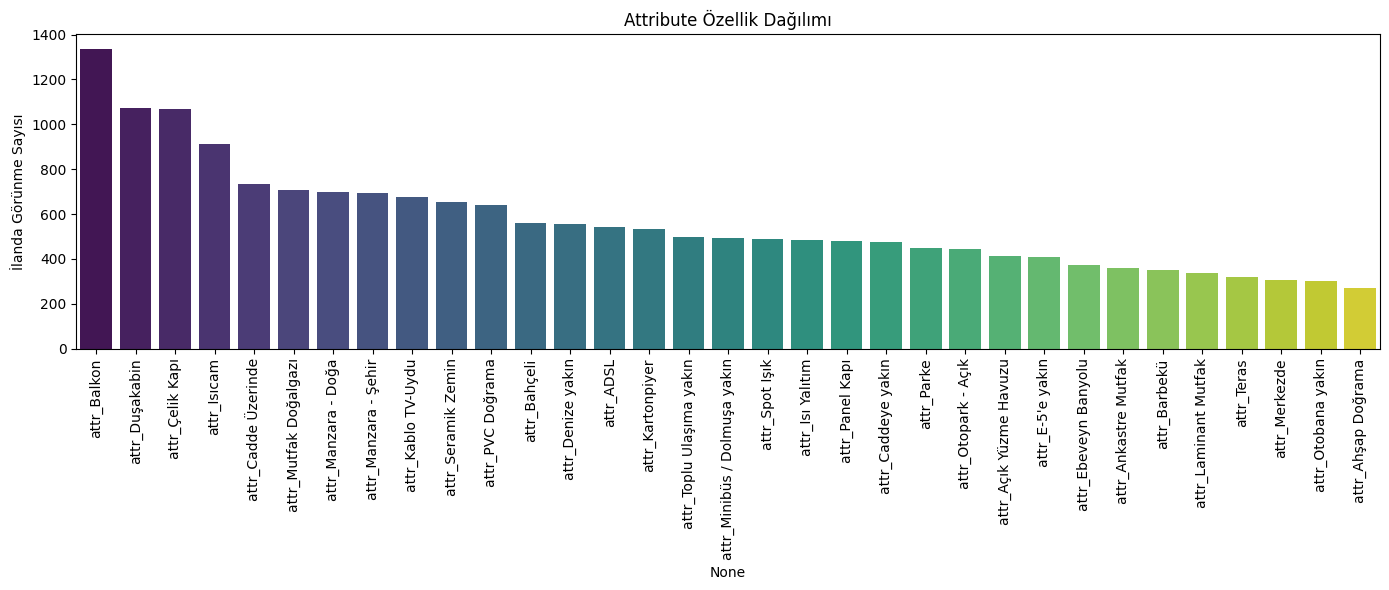

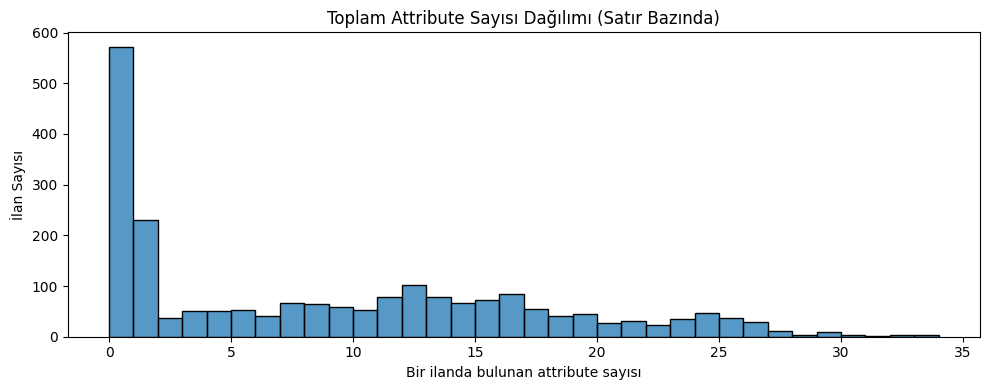

In [ ]:
def analyze_attribute_features(df):
    # 1. attr_ ile başlayan sütunları seç
    attribute_columns = [col for col in df.columns if col.startswith('attr_')]

    if not attribute_columns:
        print("Attribute sütunu bulunamadı.")
        return

    # 2. Her bir sütunda kaç tane '1' olduğunu hesapla (özelliğin kaç satırda göründüğü)
    attribute_counts = df[attribute_columns].sum().sort_values(ascending=False)

    print("\n--- Attribute Özellik Sayıları ---")
    print(attribute_counts)

    # 3. Görselleştirme
    plt.figure(figsize=(14, 6))
    sns.barplot(x=attribute_counts.index, y=attribute_counts.values, palette="viridis")
    plt.title("Attribute Özellik Dağılımı")
    plt.ylabel("İlanda Görünme Sayısı")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # 4. Toplam özellik sayısının dağılımı
    if 'total_features' in df.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df['total_features'], bins=range(0, df['total_features'].max() + 2), kde=False)
        plt.title("Toplam Attribute Sayısı Dağılımı (Satır Bazında)")
        plt.xlabel("Bir ilanda bulunan attribute sayısı")
        plt.ylabel("İlan Sayısı")
        plt.tight_layout()
        plt.show()

# Fonksiyonu uygula
analyze_attribute_features(df)


In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  \
0  2025-05-08T07:33:35.387+0000   
1  2025-04-13T08:24:27.627+0000   
2  2025-05-06T06:56:17.923+0000   
3  2025-05-13T13:02:20.187+0000   
4  2025-05-02T09:09:15.317+0000   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county                        residence  \
0  {"id":2068,"name":"Adapazarı","tier":2}     {"id":101004,"name":"Daire"}   
1     {"id":1442,"name":"Karasu","tier":2}                              NaN   
2    {"id":1595,"name":"Sapanca","tier":3}   {"id":101005,"name":"Dubleks"}   
3     {"id":1442,"name":"Karasu","tier":2}     {"id":101004,"name":"Daire"}   
4    {"id":1818,"name":"Kocaali","tier":4}  {"id":101008,"name":"Tripleks"}   

  room livingRoom  bathRoom  isMapHidden                   createdDate  \
0  [3]        [1]         1        False  2024-11-08T10:10:32.780+0000   
1  [2]        [1]         1        False  2024-03-23T02:16:07.357+0000   
2  [4]        [1]         2        False  2023-05-11T08:56:04.663+0000   
3  [3]        [1]         1        False  2024-02-08T12:37:36.627+0000   
4  [3]        [1]         3        False  2025-02-01T09:05:23.047+0000   

                updatedDate  \
0  2025-02-07T07:33:35.410Z   
1  2025-01-13T08:24:27.637Z   
2  2025-02-05T06:56:17.940Z   
3  2025-02-12T13:02:20.197Z   
4  2025-02-01T09:11:19.287Z   

                                                 sqm  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   

                                     floor   age  \
0  {"id":101216,"count":4,"name":"2. Kat"}  30.0   
1  {"id":101216,"count":3,"name":"2. Kat"}   0.0   
2        {"id":null,"count":2,"name":null}  10.0   
3  {"id":101217,"count":3,"name":"3. Kat"}   0.0   
4        {"id":null,"count":3,"name":null}   0.0   

                        heating                             fuel  \
0  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
1  {"id":101304,"name":"Kombi"}                              NaN   
2  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
3  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
4  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   

                              build                        buildState  \
0  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
1                               NaN                               NaN   
2  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
3                               NaN      {"id":101601,"name":"Sıfır"}   
4  {"id":101502,"name":"Betonarme"}      {"id":101601,"name":"Sıfır"}   

                        usage                        credit  \
0  {"id":1017

In [ ]:
def column_detail(df,column_name,top_n=5):
    for description_text in df[column_name].head(top_n):
        print("  ",description_text)
        print("-" * 50)

In [ ]:
def plot_value_counts(df, column_name, top_n=None):
    # NaN değerleri "NaN" olarak göster
    value_counts = df[column_name].fillna("NaN").value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    print(f"\n--- '{column_name}' Sütunu: Değer Frekansları ---")
    print(value_counts)

     # Eğer tüm değerler sayıya çevrilebiliyorsa sırala
    try:
        temp_values = pd.to_numeric(plot_df['value'], errors='raise')
        plot_df['value'] = temp_values
        plot_df = plot_df.sort_values('value').reset_index(drop=True)
    except:
        pass  # Sayıya çevrilemiyorsa dokunma

    # Veri hazırlama
    plot_df = value_counts.reset_index()
    plot_df.columns = ['value', 'count']

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")
    plt.title(f"'{column_name}' Sütunu Değer Dağılımı", color="purple", fontsize=14)
    plt.ylabel("Frekans")
    plt.xlabel("Değer")
    plt.xticks(rotation=45, color="purple")
    plt.yticks(color="purple")

    # Sayıları barların üstüne yaz
    for i, row in plot_df.iterrows():
        ax.text(i, row['count'] + 5, str(row['count']), ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()


In [ ]:
def extract_and_map_subcategory(link):
        match = re.search(r'"linkedSubcategoryUrl":"(.*?)"', str(link))
        if not match:
            return None
        subcat = match.group(1)
        if subcat == 'yazlik':
            return 'mustakil-ev'
        return subcat

    # 1. Alt kategoriyi çıkar + yazlık'ı mustakil-ev yap
df['redirectLink'].apply(extract_and_map_subcategory).value_counts()

redirectLink
daire          1306
villa           613
mustakil-ev     207
bina             23
ciftlik-evi       8
bungalov          3
prefabrik         3
kosk              2
koy-evi           1
residence         1
Name: count, dtype: int64

In [ ]:
column_detail(df,"redirectLink")

   {"linkedCategoryUrl":"satilik","linkedSubcategoryUrl":"daire"}
--------------------------------------------------
   {"linkedCategoryUrl":"satilik","linkedSubcategoryUrl":"daire"}
--------------------------------------------------
   {"linkedCategoryUrl":"satilik","linkedSubcategoryUrl":"villa"}
--------------------------------------------------
   {"linkedCategoryUrl":"satilik","linkedSubcategoryUrl":"daire"}
--------------------------------------------------
   {"linkedCategoryUrl":"satilik","linkedSubcategoryUrl":"villa"}
--------------------------------------------------


In [ ]:
# 6. redirectLink fosnkiyonu
def process_redirectLink(df, min_freq=30):
    def extract_and_map_subcategory(link):
        match = re.search(r'"linkedSubcategoryUrl":"(.*?)"', str(link))
        if not match:
            return None
        subcat = match.group(1)
        if subcat == 'yazlik':
            return 'mustakil-ev'
        return subcat

    # 1. Alt kategoriyi çıkar + yazlık'ı mustakil-ev yap
    df['SimplifiedSubcategory'] = df['redirectLink'].apply(extract_and_map_subcategory)

    # 2. Nadir sınıfları belirle ve 'diger' olarak değiştir
    value_counts = df['SimplifiedSubcategory'].value_counts()
    rare_categories = value_counts[value_counts < min_freq].index

    df['SimplifiedSubcategory'] = df['SimplifiedSubcategory'].apply(
        lambda x: 'diger' if x in rare_categories else x
    )

    return df
df=process_redirectLink(df)


--- 'SimplifiedSubcategory' Sütunu: Değer Frekansları ---
SimplifiedSubcategory
daire          1306
villa           613
mustakil-ev     207
diger            41
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


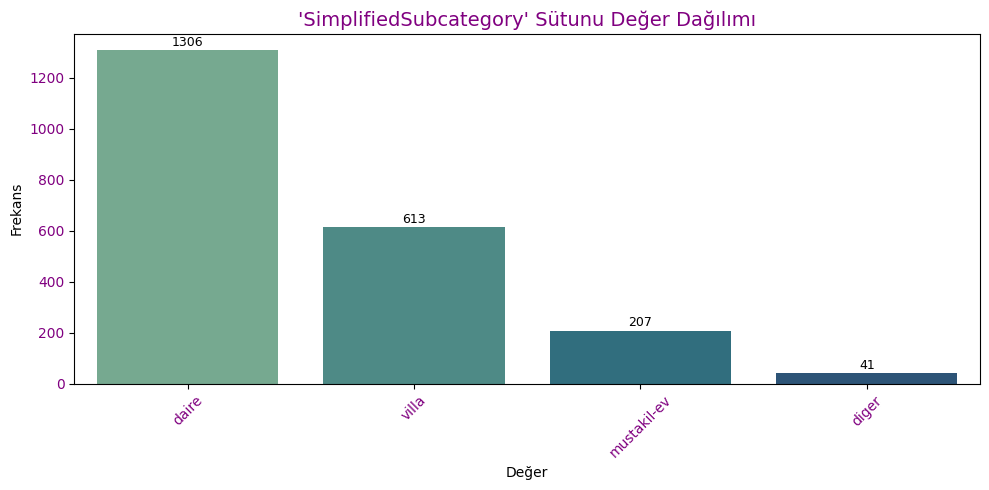

In [ ]:
plot_value_counts(df,"SimplifiedSubcategory")

In [ ]:
#Değer varsa 1 yoksa 0
df['housingComplex'] = df['housingComplex'].notnull().astype(int)

In [ ]:
df['housingComplex'].value_counts(dropna=False)

housingComplex
0    1772
1     395
Name: count, dtype: int64

In [ ]:
column_detail(df,"firm")

   {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":"ÇİFTÇİ EMLAK","address":"Atatürk Bulvarı Tığcılar mh Tekin sk ( KuveytTürk Bankası aralığı ) No:3 Kat:1 Adapazarı / Sakarya","city":"Sakarya","county":"Adapazarı","district":"Tığcılar","summaryStartDate":"2016-05-21T10:45:07.660+0000","summaryPackageCategoryTypeId":181310,"summaryPackageCategoryName":null,"firstPackageStartDate":"2016-05-21T13:45:07.660+0000","blackList":null,"firmUser":{"id":1507968,"firstName":"Erdem","lastName":"ÇİFTÇİ","phones":[{"countryCode":"+90","areaCode":"545","phoneNumber":"9541404","extensionNumber":"","phoneType":"PHONE1"},{"countryCode":"+90","areaCode":"264","phoneNumber":"2745472","extensionNumber":"","phoneType":"PHONE2"},{"countryCode":"+90","areaCode":"545","phoneNumber":"9541404","extensionNumber":"","phoneType":"MOBILE_PHONE"}],"admin":true,"url":"emlak-ofisi/ciftci-emlak-78883/erdem-ciftci-1507968","licenceNumber":"YB0162/17UY0333-5/00/421","licenceNumberExpireDate":"2026-01-23T21:00:00.000+0000","

In [ ]:
# 7. firm sütununda 'inşaat' kelimesi geçenleri işaretleme
def process_firm(df):
    df['insaat_var_mi'] = df['firm'].fillna("").str.lower().apply(
        lambda x: 1 if any(kelime in x for kelime in ['inşaat', 'insaat', 'ınşaat']) else 0
    )
    return df

In [ ]:
df=process_firm(df)


--- 'insaat_var_mi' Sütunu: Değer Frekansları ---
insaat_var_mi
0    1377
1     790
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


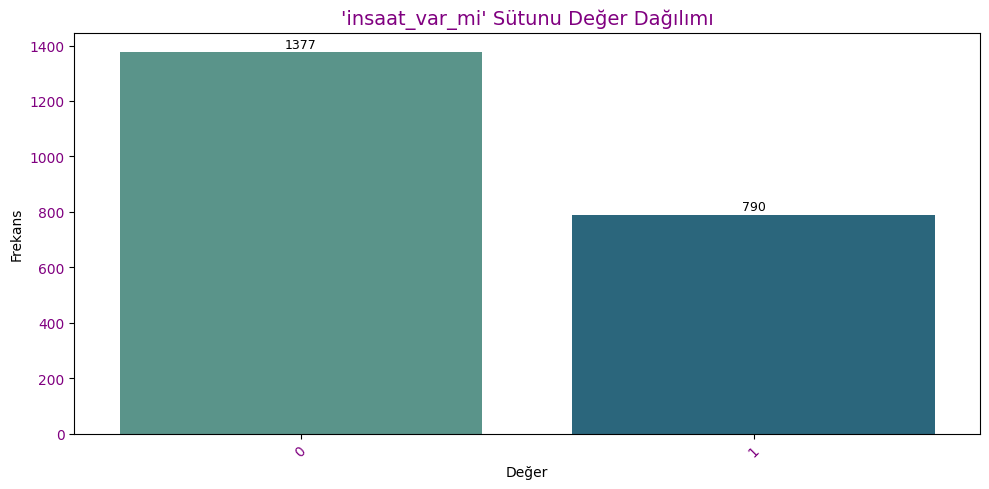

In [ ]:
plot_value_counts(df,"insaat_var_mi")

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  \
0  2025-05-08T07:33:35.387+0000   
1  2025-04-13T08:24:27.627+0000   
2  2025-05-06T06:56:17.923+0000   
3  2025-05-13T13:02:20.187+0000   
4  2025-05-02T09:09:15.317+0000   

                                               areas  \
0                    [{"id":1055,"name":"İstiklal"}]   
1                       [{"id":5451,"name":"Diğer"}]   
2  [{"id":5371,"name":"Diğer"},{"id":6180,"name":...   
3                       [{"id":5451,"name":"Diğer"}]   
4                       [{"id":5617,"name":"Diğer"}]   

                                           district  \
0           {"id":15148,"name":"Kurtuluş","tier":2}   
1               {"id":15223,"name":"Yalı","tier":2}   
2  {"id":97323,"name":"Kırkpınar Soğuksu","tier":3}   
3            {"id":15224,"name":"Kabakoz","tier":2}   
4              {"id":17452,"name":"Yayla","tier":4}   

                                    county                        residence  \
0  {"id":2068,"name":"Adapazarı","tier":2}     {"id":101004,"name":"Daire"}   
1     {"id":1442,"name":"Karasu","tier":2}                              NaN   
2    {"id":1595,"name":"Sapanca","tier":3}   {"id":101005,"name":"Dubleks"}   
3     {"id":1442,"name":"Karasu","tier":2}     {"id":101004,"name":"Daire"}   
4    {"id":1818,"name":"Kocaali","tier":4}  {"id":101008,"name":"Tripleks"}   

  room livingRoom  bathRoom  isMapHidden                   createdDate  \
0  [3]        [1]         1        False  2024-11-08T10:10:32.780+0000   
1  [2]        [1]         1        False  2024-03-23T02:16:07.357+0000   
2  [4]        [1]         2        False  2023-05-11T08:56:04.663+0000   
3  [3]        [1]         1        False  2024-02-08T12:37:36.627+0000   
4  [3]        [1]         3        False  2025-02-01T09:05:23.047+0000   

                updatedDate  \
0  2025-02-07T07:33:35.410Z   
1  2025-01-13T08:24:27.637Z   
2  2025-02-05T06:56:17.940Z   
3  2025-02-12T13:02:20.197Z   
4  2025-02-01T09:11:19.287Z   

                                                 sqm  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   

                                     floor   age  \
0  {"id":101216,"count":4,"name":"2. Kat"}  30.0   
1  {"id":101216,"count":3,"name":"2. Kat"}   0.0   
2        {"id":null,"count":2,"name":null}  10.0   
3  {"id":101217,"count":3,"name":"3. Kat"}   0.0   
4        {"id":null,"count":3,"name":null}   0.0   

                        heating                             fuel  \
0  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
1  {"id":101304,"name":"Kombi"}                              NaN   
2  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
3  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   
4  {"id":101304,"name":"Kombi"}  {"id":101401,"name":"Doğalgaz"}   

                              build                        buildState  \
0  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
1                               NaN                               NaN   
2  {"id":101502,"name":"Betonarme"}  {"id":101602,"name":"İkinci El"}   
3                               NaN      {"id":101601,"name":"Sıfır"}   
4  {"id":101502,"name":"Betonarme"}      {"id":101601,"name":"Sıfır"}   

                        usage                        credit  \
0  {"id":1017

In [ ]:
# 8. ilgili sütunlarda name-count değerlerini çekme ve önceki sütunları silme
def extract_values(df):
    def safe_eval(json_str):
        try:
            return ast.literal_eval(json_str)
        except Exception:
            return None  # Değerlendirilemeyenler için None döndür

    def extract_from_row(json_str, keys):
        data = safe_eval(json_str)

        if isinstance(data, dict):
            return {key: data.get(key, None) for key in keys}

        elif isinstance(data, list):
            extracted = {
                key: [item.get(key, None) for item in data if isinstance(item, dict)]
                for key in keys
            }

            for key in extracted:
                values = extracted[key]
                if all(isinstance(v, int) for v in values):
                    extracted[key] = ", ".join(map(str, values))
                elif all(isinstance(v, str) for v in values):
                    extracted[key] = ", ".join(values)
                else:
                    extracted[key] = ", ".join(map(str, values))

            return extracted

        return {key: None for key in keys}

    name_columns = ["areas", "district", "county", "residence", "heating",
                    "buildState", "usage", "credit", "barter"]

    for col in name_columns:
        extracted = df[col].astype(str).apply(lambda x: extract_from_row(x, ["name"]))
        df[f"{col}_name"] = extracted.apply(lambda x: x["name"])
        df.drop(columns=[col], inplace=True)

    extracted_floor = df["floor"].astype(str).apply(lambda x: extract_from_row(x, ["name", "count"]))
    df["floor_name"] = extracted_floor.apply(lambda x: x["name"])
    df["floor_count"] = extracted_floor.apply(lambda x: x["count"])
    df.drop(columns=["floor"], inplace=True)

    return df

In [ ]:
df=extract_values(df)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate room livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000  [3]        [1]         1        False   
1  2025-04-13T08:24:27.627+0000  [2]        [1]         1        False   
2  2025-05-06T06:56:17.923+0000  [4]        [1]         2        False   
3  2025-05-13T13:02:20.187+0000  [3]        [1]         1        False   
4  2025-05-02T09:09:15.317+0000  [3]        [1]         3        False   

                    createdDate               updatedDate  \
0  2024-11-08T10:10:32.780+0000  2025-02-07T07:33:35.410Z   
1  2024-03-23T02:16:07.357+0000  2025-01-13T08:24:27.637Z   
2  2023-05-11T08:56:04.663+0000  2025-02-05T06:56:17.940Z   
3  2024-02-08T12:37:36.627+0000  2025-02-12T13:02:20.197Z   
4  2025-02-01T09:05:23.047+0000  2025-02-01T09:11:19.287Z   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"Kuzey"},{"id":101902,"na...           ["3+1"]   
1  [{"i

In [ ]:
# 9. date ler için olan fonskiyon
def process_dates(df):
    # Tarih sütunlarını timezone-naive datetime formatına çevir
    df['createdDate'] = pd.to_datetime(df['createdDate'], utc=True).dt.tz_localize(None)
    df['updatedDate'] = pd.to_datetime(df['updatedDate'], utc=True).dt.tz_localize(None)

    # Sadece gün, ay ve yıl bilgilerini karşılaştır (saat kısmını at)
    df['sameDayUpdate'] = (df['createdDate'].dt.date == df['updatedDate'].dt.date).astype(int)

    # Sütun sırasını düzenle - sameDayUpdate sütununu createdDate ve updatedDate sütunlarının yanına taşı
    cols = list(df.columns)
    created_idx = cols.index('createdDate')
    updated_idx = cols.index('updatedDate')
    last_date_idx = max(created_idx, updated_idx)

    # sameDayUpdate sütununu son tarih sütunundan sonraki pozisyona yerleştir
    cols.remove('sameDayUpdate')
    cols.insert(last_date_idx + 1, 'sameDayUpdate')

    # Sütunları yeniden düzenle
    df = df[cols]

    return df

In [ ]:
df=process_dates(df)


--- 'sameDayUpdate' Sütunu: Değer Frekansları ---
sameDayUpdate
0    1382
1     785
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


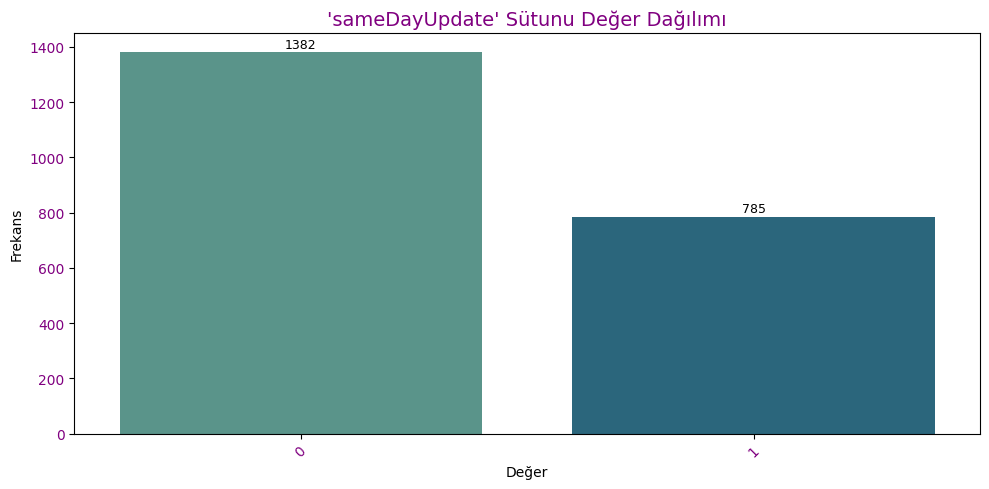

In [ ]:
plot_value_counts(df,"sameDayUpdate")

In [ ]:
column_detail(df,"sqm")

   {"netSqm":110,"grossSqm":[122],"indoorGrossSqm":0,"outdoorGrossSqm":0,"indoorNetSqm":0,"outdoorNetSqm":0,"openAreaSqm":0,"closedAreaSqm":0,"price":0,"currencyCode":null}
--------------------------------------------------
   {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":0,"outdoorGrossSqm":0,"indoorNetSqm":0,"outdoorNetSqm":0,"openAreaSqm":0,"closedAreaSqm":0,"price":0,"currencyCode":null}
--------------------------------------------------
   {"netSqm":200,"grossSqm":[250],"indoorGrossSqm":0,"outdoorGrossSqm":0,"indoorNetSqm":0,"outdoorNetSqm":0,"openAreaSqm":0,"closedAreaSqm":0,"price":0,"currencyCode":null}
--------------------------------------------------
   {"netSqm":120,"grossSqm":[130],"indoorGrossSqm":0,"outdoorGrossSqm":0,"indoorNetSqm":0,"outdoorNetSqm":0,"openAreaSqm":0,"closedAreaSqm":0,"price":0,"currencyCode":null}
--------------------------------------------------
   {"netSqm":140,"grossSqm":[160],"indoorGrossSqm":0,"outdoorGrossSqm":0,"indoorNetSqm":0,"outdoorNetSqm":

In [ ]:
# 10. sqm sütununu kategorilere ayırma
def process_sqm(df):
    def extract_sqm(json_str):
        data = json.loads(json_str.replace("'", '"'))  # JSON string ise düzelt
        net = data.get('netSqm', None)
        gross = data.get('grossSqm', None)

        # gross listeyse ilkini al
        if isinstance(gross, list):
            gross = gross[0] if gross else None

        return pd.Series({'net': net, 'gross': gross})

    extracted = df['sqm'].apply(extract_sqm)
    df = pd.concat([df, extracted], axis=1)

    return df

In [ ]:
df=process_sqm(df)

In [ ]:
df.shape

(2167, 83)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate room livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000  [3]        [1]         1        False   
1  2025-04-13T08:24:27.627+0000  [2]        [1]         1        False   
2  2025-05-06T06:56:17.923+0000  [4]        [1]         2        False   
3  2025-05-13T13:02:20.187+0000  [3]        [1]         1        False   
4  2025-05-02T09:09:15.317+0000  [3]        [1]         3        False   

              createdDate             updatedDate  sameDayUpdate  \
0 2024-11-08 10:10:32.780 2025-02-07 07:33:35.410              0   
1 2024-03-23 02:16:07.357 2025-01-13 08:24:27.637              0   
2 2023-05-11 08:56:04.663 2025-02-05 06:56:17.940              0   
3 2024-02-08 12:37:36.627 2025-02-12 13:02:20.197              0   
4 2025-02-01 09:05:23.047 2025-02-01 09:11:19.287              1   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"Kuzey"},{"id":

In [ ]:
column_detail(df,"sides")

   [{"id":101901,"name":"Kuzey"},{"id":101902,"name":"Güney"}]
--------------------------------------------------
   [{"id":101901,"name":"Kuzey"},{"id":101902,"name":"Güney"},{"id":101903,"name":"Doğu"},{"id":101904,"name":"Batı"}]
--------------------------------------------------
   []
--------------------------------------------------
   []
--------------------------------------------------
   [{"id":101902,"name":"Güney"},{"id":101903,"name":"Doğu"},{"id":101904,"name":"Batı"}]
--------------------------------------------------


In [ ]:
# 11. Sides Sütunu İçin Bölgelere ayırma
def sides_process(df):
    df['sides'] = df['sides'].astype(str).str.lower()

    df['kuzey'] = df['sides'].apply(lambda x: 1 if 'kuzey' in x else 0)
    df['güney'] = df['sides'].apply(lambda x: 1 if 'güney' in x else 0)
    df['doğu']  = df['sides'].apply(lambda x: 1 if 'doğu'  in x else 0)
    df['batı']  = df['sides'].apply(lambda x: 1 if 'batı'  in x else 0)

    return df
df=sides_process(df)


--- 'kuzey' Sütunu: Değer Frekansları ---
kuzey
1    1110
0    1057
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


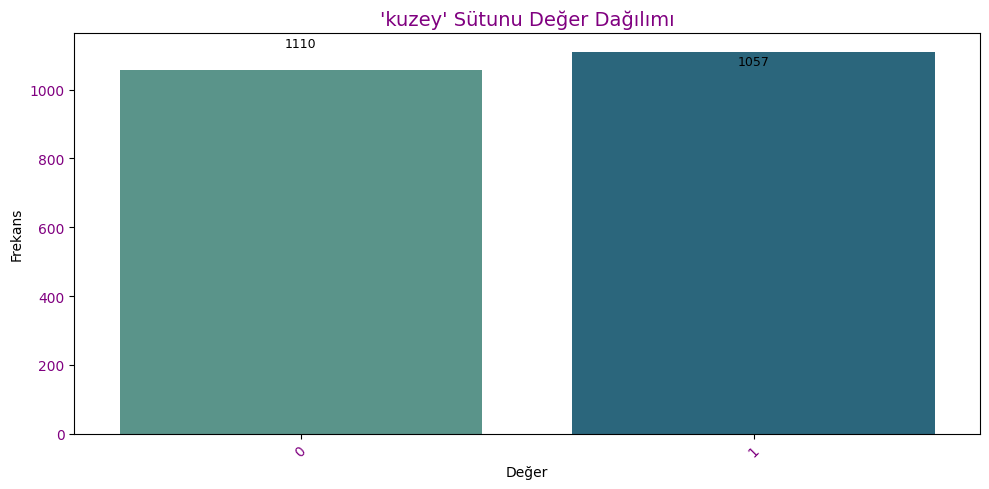


--- 'güney' Sütunu: Değer Frekansları ---
güney
1    1313
0     854
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


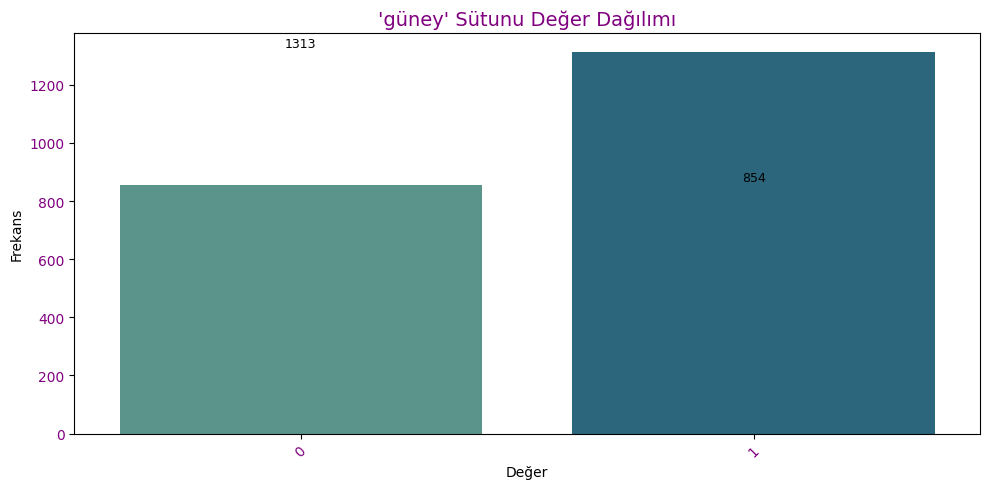


--- 'doğu' Sütunu: Değer Frekansları ---
doğu
1    1215
0     952
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


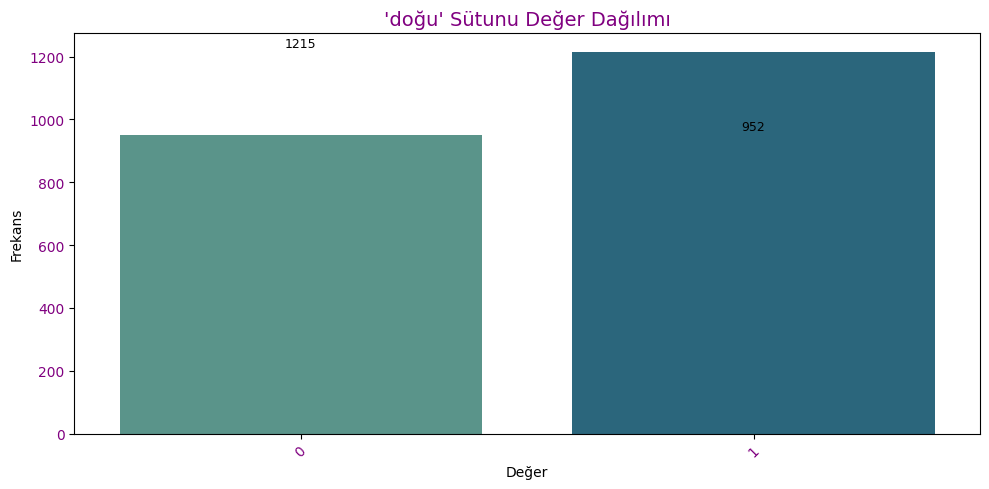


--- 'batı' Sütunu: Değer Frekansları ---
batı
1    1168
0     999
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


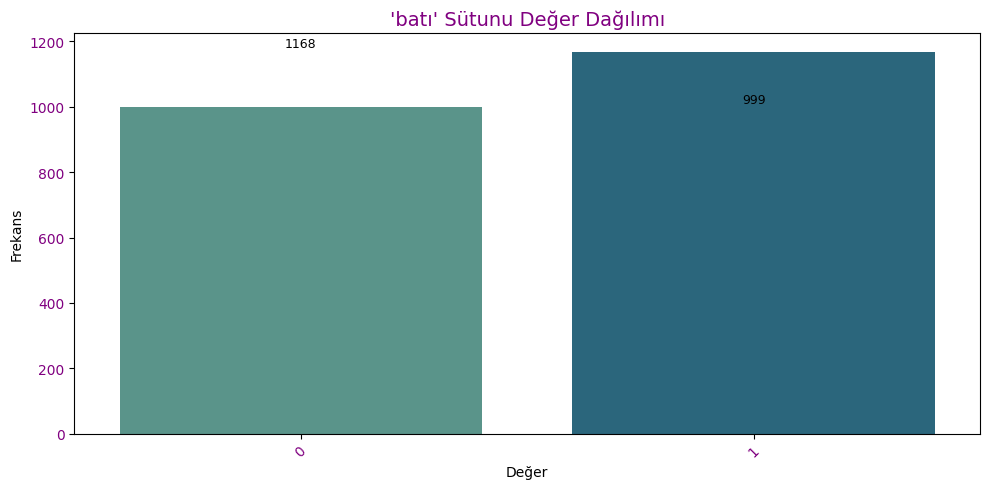

In [ ]:
plot_value_counts(df,"kuzey")
plot_value_counts(df,"güney")
plot_value_counts(df,"doğu")
plot_value_counts(df,"batı")

In [ ]:
df.shape

(2167, 87)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate room livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000  [3]        [1]         1        False   
1  2025-04-13T08:24:27.627+0000  [2]        [1]         1        False   
2  2025-05-06T06:56:17.923+0000  [4]        [1]         2        False   
3  2025-05-13T13:02:20.187+0000  [3]        [1]         1        False   
4  2025-05-02T09:09:15.317+0000  [3]        [1]         3        False   

              createdDate             updatedDate  sameDayUpdate  \
0 2024-11-08 10:10:32.780 2025-02-07 07:33:35.410              0   
1 2024-03-23 02:16:07.357 2025-01-13 08:24:27.637              0   
2 2023-05-11 08:56:04.663 2025-02-05 06:56:17.940              0   
3 2024-02-08 12:37:36.627 2025-02-12 13:02:20.197              0   
4 2025-02-01 09:05:23.047 2025-02-01 09:11:19.287              1   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"kuzey"},{"id":

In [ ]:
column_detail(df,"rental")

   {"amount":15000,"currencyCode":"TL"}
--------------------------------------------------
   {"amount":0,"currencyCode":"TL"}
--------------------------------------------------
   {"amount":25000,"currencyCode":"TL"}
--------------------------------------------------
   {"amount":0,"currencyCode":"TL"}
--------------------------------------------------
   {"amount":0,"currencyCode":"TL"}
--------------------------------------------------


In [ ]:
# 12. rental sütunu fonksiyonu - kira bedelini çıkarma
def process_rental_sub(df):
    def get_amount(json_str):
        if not isinstance(json_str, str):
            return None
        try:
            data = json.loads(json_str.replace("'", '"'))  # Tek tırnakları düzelt
            return data.get('amount', None)
        except Exception:
            return None

    df['rental_amount'] = df['rental'].apply(get_amount)

    return df
df=process_rental_sub(df)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate room livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000  [3]        [1]         1        False   
1  2025-04-13T08:24:27.627+0000  [2]        [1]         1        False   
2  2025-05-06T06:56:17.923+0000  [4]        [1]         2        False   
3  2025-05-13T13:02:20.187+0000  [3]        [1]         1        False   
4  2025-05-02T09:09:15.317+0000  [3]        [1]         3        False   

              createdDate             updatedDate  sameDayUpdate  \
0 2024-11-08 10:10:32.780 2025-02-07 07:33:35.410              0   
1 2024-03-23 02:16:07.357 2025-01-13 08:24:27.637              0   
2 2023-05-11 08:56:04.663 2025-02-05 06:56:17.940              0   
3 2024-02-08 12:37:36.627 2025-02-12 13:02:20.197              0   
4 2025-02-01 09:05:23.047 2025-02-01 09:11:19.287              1   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"kuzey"},{"id":

In [ ]:
df[["listingId","registerState","heating_name","buildState_name","usage_name","credit_name","barter_name","floor_name"]].iloc[2120:2160]

listingId   registerState        heating_name buildState_name  \
2133  131612-1771   Kat Mülkiyeti       Yerden Isıtma           Sıfır   
2134   116767-558    Kat İrtifakı               Kombi       İkinci El   
2135    149323-82   Kat Mülkiyeti       Yerden Isıtma            None   
2136  130421-2619   Kat Mülkiyeti       Yerden Isıtma            None   
2137   93425-4270    Hisseli Tapu               Kombi            None   
2138  122716-1059   Kat Mülkiyeti               Kombi            None   
2139   54537-3582   Kat Mülkiyeti               Kombi            None   
2140   54537-3622     Condominium  Underfloor Heating            None   
2141   54537-3702     Condominium  Underfloor Heating               0   
2142  125745-1453     Condominium  Underfloor Heating               0   
2143    84109-218            Land        Combi Boiler     Second Hand   
2144  114945-1061  Floor Easement  Underfloor Heating            None   
2145   0-44154291            Land  Underfloor Heating               0   
2146  114945-1084  Floor Easement       Heating Stove            None   
2147  114945-1063  Floor Easement        Combi Boiler            None   
2148    144694-79     Condominium        Combi Boiler               0   
2149  114945-1001  Floor Easement        Combi Boiler            None   
2150  114945-1090     Condominium  Underfloor Heating               0   
2151     155297-2     Condominium  Underfloor Heating               0   
2152     155297-4     Condominium  Underfloor Heating               0   
2153  115668-2188     Condominium  Underfloor Heating               0   
2154   134880-940     Condominium        Combi Boiler     Second Hand   
2155  130421-2682     Condominium  Underfloor Heating               0   
2156  115668-2242     Condominium        Combi Boiler            None   
2157  131612-1820     Condominium  Underfloor Heating               0   
2158   74658-1797     Condominium        Combi Boiler     Second Hand   
2159   146643-185  Floor Easement        Combi Boiler               0   
2160    3006-6568    Kat İrtifakı               Kombi       İkinci El   
2161    152066-51   Kat Mülkiyeti       Yerden Isıtma           Sıfır   
2162   93427-1676    Kat İrtifakı               Kombi       İkinci El   
2163   116468-218    Kat İrtifakı               Kombi            None   
2164    145556-59   Kat Mülkiyeti               Kombi           Sıfır   
2165  138402-2207   Kat Mülkiyeti               Kombi       İkinci El   
2166  138402-2206    Kat İrtifakı      Kat Kaloriferi       İkinci El   
2167  131681-1040   Kat Mülkiyeti               Kombi       İkinci El   
2168  131612-1818   Kat Mülkiyeti       Yerden Isıtma           Sıfır   
2169  131612-1817   Kat Mülkiyeti               Kombi           Sıfır   
2170  122716-1098   Kat Mülkiyeti               Kombi            None   
2171   93427-1675    Kat İrtifakı               Kombi       İkinci El   
2172   84727-1786    Kat İrtifakı       Yerden Isıtma            None   

       usage_name    credit_name barter_name    floor_name  
2133          Boş          Uygun     Yapılır          None  
2134          Boş    Uygun değil    Yapılmaz        4. Kat  
2135  Mülk Sahibi          Uygun     Yapılır    Bahçe Katı  
2136          Boş          Uygun     Yapılır    Bahçe Katı  
2137          Boş          Uygun    Yapılmaz    Bahçe Katı  
2138          Boş          Uygun     Yapılır        2. Kat  
2139          Boş          Uygun     Yapılır        1. Kat  
2140        Empty  Not Available       Makes      3. Floor  
2141        Empty      Available       Makes  Garden Floor  
2142        Empty      Available       Makes  Ground Floor  
2143        Owner  Not Available    Not Done          None  
2144        Empty  Not Available    Not Done      2. Floor  
2145        Empty      Available       Makes          None  
2146        Empty      Available       Makes      2. Floor  
2147        Empty      Available    Not Done      3. Floor  
2148        Empty      Available    No

In [ ]:
# 13. İngilizce satırlar
def translate_dataframe_values(df):
    """
    Pandas DataFrame'indeki belirli sütunlardaki İngilizce değerleri
    tanımlanmış Türkçe karşılıklarıyla değiştirir.

    Args:
        df (pd.DataFrame): Üzerinde işlem yapılacak DataFrame.

    Returns:
        pd.DataFrame: Değerleri çevrilmiş DataFrame.
    """

    translations = {

        "registerState": {
            "Floor Easement": "Kat İrtifakı",
            "Condominium": "Kat Mülkiyeti",
            "Land": "Kat Mülkiyeti"

        },
        "heating_name": {
            "Underfloor Heating": "Yerden Isıtma",
            "Combi Boiler": "Kombi",
            "Heating Stove": "Soba"

        },
        "buildState_name": {
            "Second Hand": "İkinci El"

        },
        "usage_name": {
            "Empty": "Boş",
            "Owner": "Mülk Sahibi",
            "Tenanted": "Kiracılı"

        },
        "credit_name": {
            "Not Available": "Uygun Değil",
            "Available": "Uygun"

        },
        "barter_name": {
            "Makes": "Yapılır",
            "Not Done": "Yapılmaz"

        },
        "floor_name": {
            "Garden Floor": "Bahçe Katı",
            "1. Floor": "1. Kat",
            "2. Floor": "2. Kat",
            "3. Floor": "3. Kat",
            "Top Floor": "En Üst Kat",
            "Middle Floor": "Ara Kat",
            "Ground Floor": "Giriş Kat"}

    }

    for column, mapping in translations.items():
        if column in df.columns: # Sütunun DataFrame'de olup olmadığını kontrol et
            df[column] = df[column].replace(mapping)

    return df
df=translate_dataframe_values(df)

In [ ]:
df[["registerState","heating_name","buildState_name","usage_name","credit_name","barter_name","floor_name"]].iloc[2120:2160]

registerState    heating_name buildState_name   usage_name  credit_name  \
2133  Kat Mülkiyeti   Yerden Isıtma           Sıfır          Boş        Uygun   
2134   Kat İrtifakı           Kombi       İkinci El          Boş  Uygun değil   
2135  Kat Mülkiyeti   Yerden Isıtma            None  Mülk Sahibi        Uygun   
2136  Kat Mülkiyeti   Yerden Isıtma            None          Boş        Uygun   
2137   Hisseli Tapu           Kombi            None          Boş        Uygun   
2138  Kat Mülkiyeti           Kombi            None          Boş        Uygun   
2139  Kat Mülkiyeti           Kombi            None          Boş        Uygun   
2140  Kat Mülkiyeti   Yerden Isıtma            None          Boş  Uygun Değil   
2141  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2142  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2143  Kat Mülkiyeti           Kombi       İkinci El  Mülk Sahibi  Uygun Değil   
2144   Kat İrtifakı   Yerden Isıtma            None          Boş  Uygun Değil   
2145  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2146   Kat İrtifakı            Soba            None          Boş        Uygun   
2147   Kat İrtifakı           Kombi            None          Boş        Uygun   
2148  Kat Mülkiyeti           Kombi               0          Boş        Uygun   
2149   Kat İrtifakı           Kombi            None          Boş  Uygun Değil   
2150  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2151  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2152  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2153  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2154  Kat Mülkiyeti           Kombi       İkinci El  Mülk Sahibi        Uygun   
2155  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2156  Kat Mülkiyeti           Kombi            None          Boş        Uygun   
2157  Kat Mülkiyeti   Yerden Isıtma               0          Boş        Uygun   
2158  Kat Mülkiyeti           Kombi       İkinci El          Boş        Uygun   
2159   Kat İrtifakı           Kombi               0     Kiracılı        Uygun   
2160   Kat İrtifakı           Kombi       İkinci El     Kiracılı        Uygun   
2161  Kat Mülkiyeti   Yerden Isıtma           Sıfır          Boş        Uygun   
2162   Kat İrtifakı           Kombi       İkinci El          Boş        Uygun   
2163   Kat İrtifakı           Kombi            None  Mülk Sahibi        Uygun   
2164  Kat Mülkiyeti           Kombi           Sıfır          Boş        Uygun   
2165  Kat Mülkiyeti           Kombi       İkinci El  Mülk Sahibi        Uygun   
2166   Kat İrtifakı  Kat Kaloriferi       İkinci El  Mülk Sahibi        Uygun   
2167  Kat Mülkiyeti           Kombi       İkinci El         None        Uygun   
2168  Kat Mülkiyeti   Yerden Isıtma           Sıfır          Boş        Uygun   
2169  Kat Mülkiyeti           Kombi           Sıfır          Boş        Uygun   
2170  Kat Mülkiyeti           Kombi            None          Boş        Uygun   
2171   Kat İrtifakı           Kombi       İkinci El          Boş        Uygun   
2172   Kat İrtifakı   Yerden Isıtma            None          Boş        Uygun   

     barter_name    floor_name  
2133     Yapılır          None  
2134    Yapılmaz        4. Kat  
2135     Yapılır    Bahçe Katı  
2136     Yapılır    Bahçe Katı  
2137    Yapılmaz    Bahçe Katı  
2138     Yapılır        2. Kat  
2139     Yapılır        1. Kat  
2140     Yapılır        3. Kat  
2141     Yapılır    Bahçe Katı  
2142     Yapılır     Giriş Kat  
2143    Yapılmaz          None  
2144    Yapılmaz        2. Kat  
2145     Yapılır          None  
2146     Yapılır        2. Kat  
2147    Yapılmaz        3. Kat  
2148    Yapılmaz       Ara Kat  
2149    Yapılmaz        3. Kat  
2150     Yapılır       Ara Kat  
2151    Yapılmaz          None  
2152    Yapılmaz        

In [ ]:
df[["room","livingRoom","roomAndLivingRoom"]].head()

room livingRoom roomAndLivingRoom
0  [3]        [1]           ["3+1"]
1  [2]        [1]           ["2+1"]
2  [4]        [1]           ["4+1"]
3  [3]        [1]           ["3+1"]
4  [3]        [1]           ["3+1"]

In [ ]:
# 14. roomAndLivingRoom düzenlemesi ve toplam oda sayısı, ortalama oda başı m2 özellik çıkarımı
def fix_room_values(df):

    # 1. Köşeli parantezleri kaldır, numerik değerlere çevir
    df["room"] = df["room"].astype(str).str.extract(r"(\d+)").astype(float)
    df["livingRoom"] = df["livingRoom"].astype(str).str.extract(r"(\d+)").astype(float)

    # 2. roomAndLivingRoom sütununu güncelle: "room+livingRoom" şeklinde kategorik ifade
    df["roomAndLivingRoom"] = df["room"].astype(int).astype(str) + "+" + df["livingRoom"].astype(int).astype(str)

    # 3. Toplam oda sayısı: room + livingRoom
    df["total_room_count"] = df["room"] + df["livingRoom"]
    df["total_room_count"] = df["total_room_count"].astype(int)  # kategorik olarak

    # 4. Ortalama oda başı m²
    df["avg_area_per_room"] = df["net"] / (df["room"] + df["livingRoom"])

    def group_rare_cats(df, column, threshold=10, new_name="Diğer"):
        counts = df[column].value_counts()
        rare = counts[counts < threshold].index
        df[column] = df[column].apply(lambda x: new_name if x in rare else x)
        return df
    df=group_rare_cats(df,"roomAndLivingRoom")
    return df
df=fix_room_values(df)

In [ ]:
df[["room","livingRoom","roomAndLivingRoom","net","total_room_count","avg_area_per_room"]].head()

room  livingRoom roomAndLivingRoom  net  total_room_count  \
0   3.0         1.0               3+1  110                 4   
1   2.0         1.0               2+1   75                 3   
2   4.0         1.0               4+1  200                 5   
3   3.0         1.0               3+1  120                 4   
4   3.0         1.0               3+1  140                 4   

   avg_area_per_room  
0               27.5  
1               25.0  
2               40.0  
3               30.0  
4               35.0

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  room  livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000   3.0         1.0         1        False   
1  2025-04-13T08:24:27.627+0000   2.0         1.0         1        False   
2  2025-05-06T06:56:17.923+0000   4.0         1.0         2        False   
3  2025-05-13T13:02:20.187+0000   3.0         1.0         1        False   
4  2025-05-02T09:09:15.317+0000   3.0         1.0         3        False   

              createdDate             updatedDate  sameDayUpdate  \
0 2024-11-08 10:10:32.780 2025-02-07 07:33:35.410              0   
1 2024-03-23 02:16:07.357 2025-01-13 08:24:27.637              0   
2 2023-05-11 08:56:04.663 2025-02-05 06:56:17.940              0   
3 2024-02-08 12:37:36.627 2025-02-12 13:02:20.197              0   
4 2025-02-01 09:05:23.047 2025-02-01 09:11:19.287              1   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"ku


--- 'total_room_count' Sütunu: Değer Frekansları ---
total_room_count
3     780
4     685
5     298
2     223
6      96
7      36
8      14
1      10
10      7
9       6
11      6
12      2
13      1
16      1
22      1
14      1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


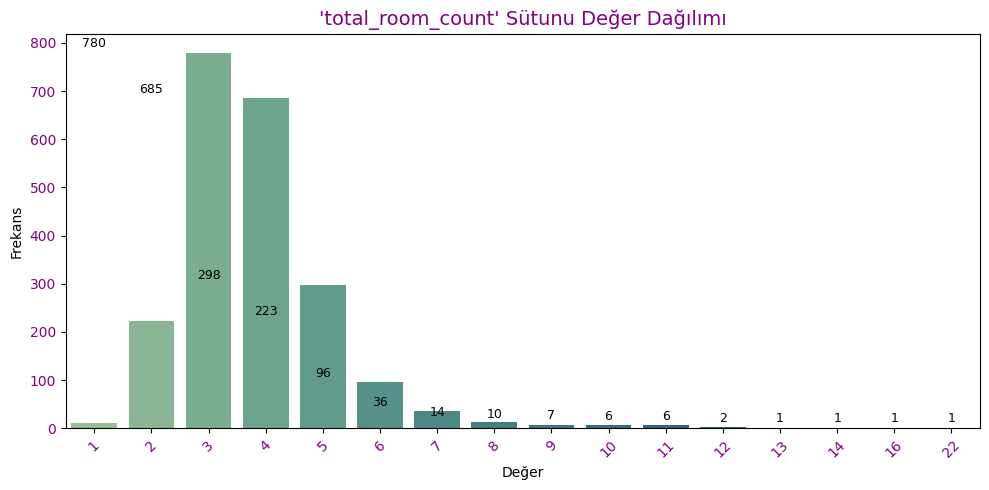

In [ ]:
plot_value_counts(df,"total_room_count")

In [ ]:
df["avg_area_per_room"].value_counts().head(20)

avg_area_per_room
30.000000    208
25.000000    168
26.666667    151
40.000000    119
28.333333    115
27.500000    110
23.333333    102
32.500000     73
35.000000     70
45.000000     64
37.500000     59
36.000000     49
31.250000     44
33.333333     42
20.000000     39
33.750000     37
21.666667     37
28.750000     35
31.666667     27
32.000000     25
Name: count, dtype: int64

<ipython-input-494-b562a143f823>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=net_bin, palette='crest', order=labels)
<ipython-input-494-b562a143f823>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


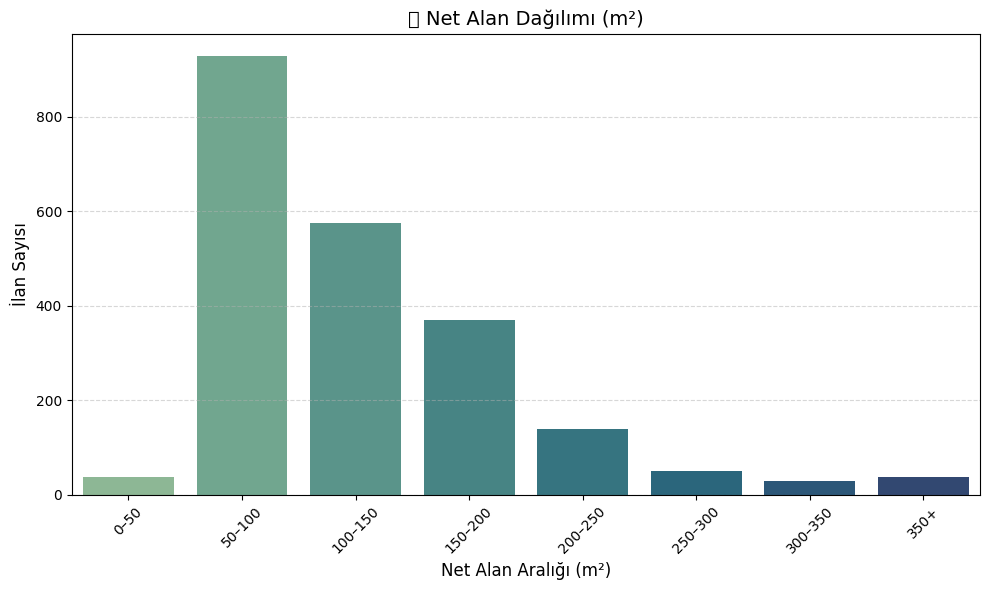

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, float('inf')]
labels = ['0–50', '50–100', '100–150', '150–200', '200–250', '250–300', '300–350', '350+']

# net sütununa göre geçici kategorik seri oluştur
net_bin = pd.cut(df['net'], bins=bins, labels=labels, right=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(x=net_bin, palette='crest', order=labels)

plt.title("🧱 Net Alan Dağılımı (m²)", fontsize=14)
plt.xlabel("Net Alan Aralığı (m²)", fontsize=12)
plt.ylabel("İlan Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df['clicked'] = df['searchScore'].notna().astype(int)


--- 'clicked' Sütunu: Değer Frekansları ---
clicked
0    1827
1     340
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


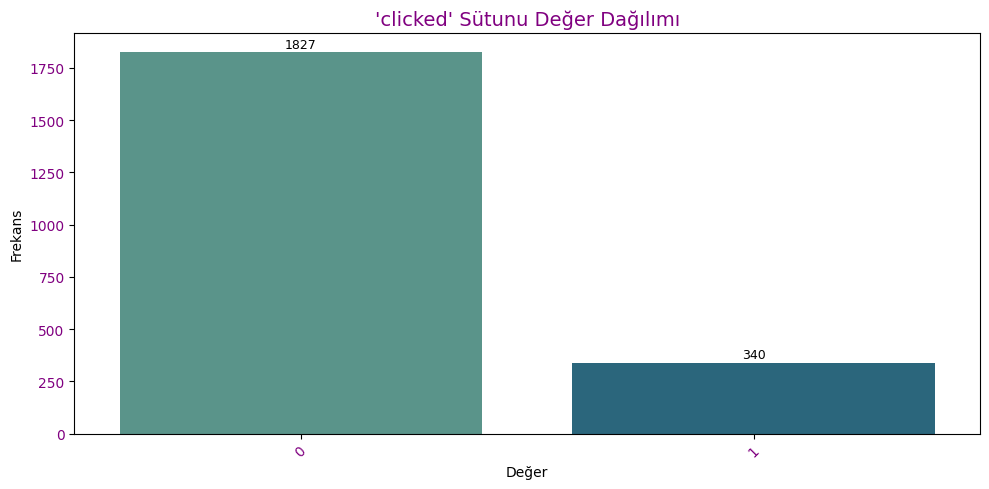

In [ ]:
plot_value_counts(df,"clicked")

In [ ]:
def delete_columns(df,silinecek_sutunlar = [
        'realtyId', 'no', 'startDate', 'endDate', 'createdDate', 'updatedDate','isMapHidden',
        'sqm', 'fuel', 'build', 'redirectLink', 'firm', 'fee', 'sides','rental','areas_name','residence_name','stale','isVideoTypeVimeo','floor_name','subCategory','room','livingRoom',"searchScore","registerState","hasUpdateBooster"
    ]):

    df.drop(columns=[col for col in silinecek_sutunlar if col in df.columns], inplace=True)
    return df

sqm → net, gross//firm → insaat_var_mi//redirectLink → SimplifiedSubcategory//floor → floor_name, floor_count//  room, livingRoom → roomAndLivingRoom, total_room_count, avg_area_per_room // sides → kuzey, güney, doğu, batı
//rental → rental_amount//createdDate, updatedDate → sameDayUpdate yeni veriler oluşturduğumuz için eski sütünları siliyoruz. Diğer sütülarıda anlamsız veriler olduğu için siliyoruz.


In [ ]:
df.shape

(2167, 91)

In [ ]:
df.head()

listingId  realtyId    no     price                     startDate  \
0    78883-704  43672903   704   2500000  2025-02-07T07:33:35.387+0000   
1   54537-3457  42399668  3457   1500000  2025-01-10T11:50:32.547+0000   
2   116181-160  40773651   160  19500000  2025-02-05T06:56:17.923+0000   
3    18262-757  42174714   757   3350000  2025-02-12T12:23:38.413+0000   
4  131612-1792  44126172  1792   3700000  2025-02-01T09:09:15.317+0000   

                        endDate  room  livingRoom  bathRoom  isMapHidden  \
0  2025-05-08T07:33:35.387+0000   3.0         1.0         1        False   
1  2025-04-13T08:24:27.627+0000   2.0         1.0         1        False   
2  2025-05-06T06:56:17.923+0000   4.0         1.0         2        False   
3  2025-05-13T13:02:20.187+0000   3.0         1.0         1        False   
4  2025-05-02T09:09:15.317+0000   3.0         1.0         3        False   

              createdDate             updatedDate  sameDayUpdate  \
0 2024-11-08 10:10:32.780 2025-02-07 07:33:35.410              0   
1 2024-03-23 02:16:07.357 2025-01-13 08:24:27.637              0   
2 2023-05-11 08:56:04.663 2025-02-05 06:56:17.940              0   
3 2024-02-08 12:37:36.627 2025-02-12 13:02:20.197              0   
4 2025-02-01 09:05:23.047 2025-02-01 09:11:19.287              1   

                                                 sqm   age  \
0  {"netSqm":110,"grossSqm":[122],"indoorGrossSqm...  30.0   
1  {"netSqm":75,"grossSqm":[80],"indoorGrossSqm":...   0.0   
2  {"netSqm":200,"grossSqm":[250],"indoorGrossSqm...  10.0   
3  {"netSqm":120,"grossSqm":[130],"indoorGrossSqm...   0.0   
4  {"netSqm":140,"grossSqm":[160],"indoorGrossSqm...   0.0   

                              fuel                             build  \
0  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
1                              NaN                               NaN   
2  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   
3  {"id":101401,"name":"Doğalgaz"}                               NaN   
4  {"id":101401,"name":"Doğalgaz"}  {"id":101502,"name":"Betonarme"}   

   housingComplex                                rental authorizedRealtor  \
0               0  {"amount":15000,"currencyCode":"TL"}              True   
1               0      {"amount":0,"currencyCode":"TL"}             False   
2               0  {"amount":25000,"currencyCode":"TL"}              True   
3               1      {"amount":0,"currencyCode":"TL"}              True   
4               0      {"amount":0,"currencyCode":"TL"}              True   

  furnished                                       redirectLink  \
0     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
1     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
2     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
3     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   
4     False  {"linkedCategoryUrl":"satilik","linkedSubcateg...   

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                         subCategory  \
0  {"id":10000101,"typeId":10000101,"typeName":"D...   
1  {"id":10000101,"typeId":10000101,"typeName":"D...   
2  {"id":10000110,"typeId":10000110,"typeName":"V...   
3  {"id":10000101,"typeId":10000101,"typeName":"D...   
4  {"id":10000110,"typeId":10000110,"typeName":"V...   

                                   fee  \
0   {"amount":200,"currencyCode":"TL"}   
1                                  NaN   
2  {"amount":1000,"currencyCode":"TL"}   
3                                  NaN   
4                                  NaN   

                                               sides roomAndLivingRoom  \
0  [{"id":101901,"name":"ku


--- 'isMapHidden' Sütunu: Değer Frekansları ---
isMapHidden
False    1885
True      282
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


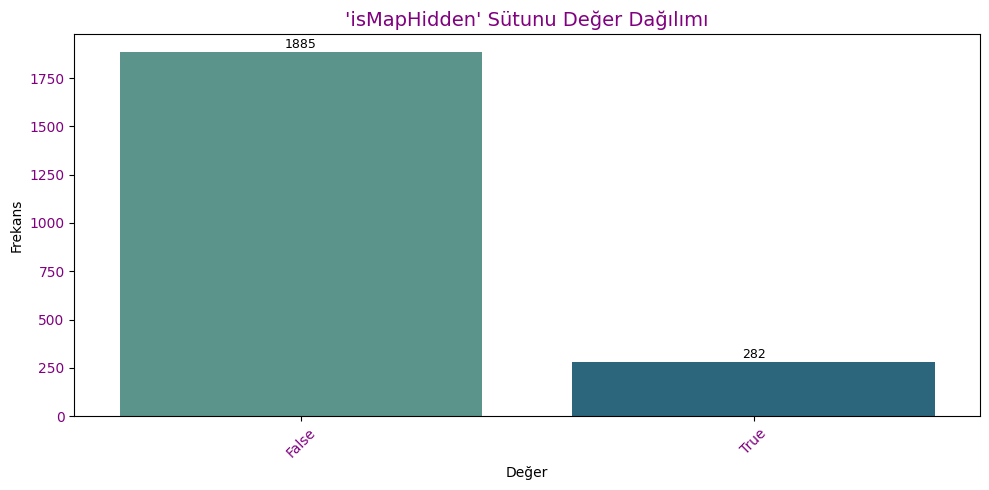

In [ ]:
plot_value_counts(df,"isMapHidden")


--- 'registerState' Sütunu: Değer Frekansları ---
registerState
Kat Mülkiyeti    1346
Kat İrtifakı      486
NaN               118
Tapu Yok           55
Kat M�lkiyeti      53
Arsa               49
KatMülkiyeti       24
Katİrtifakı        13
Hisseli Tapu       10
Yabancıdan          5
Kat Irtifaki        4
Kat �rtifak�        2
Yabancidan          1
TapuYok             1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


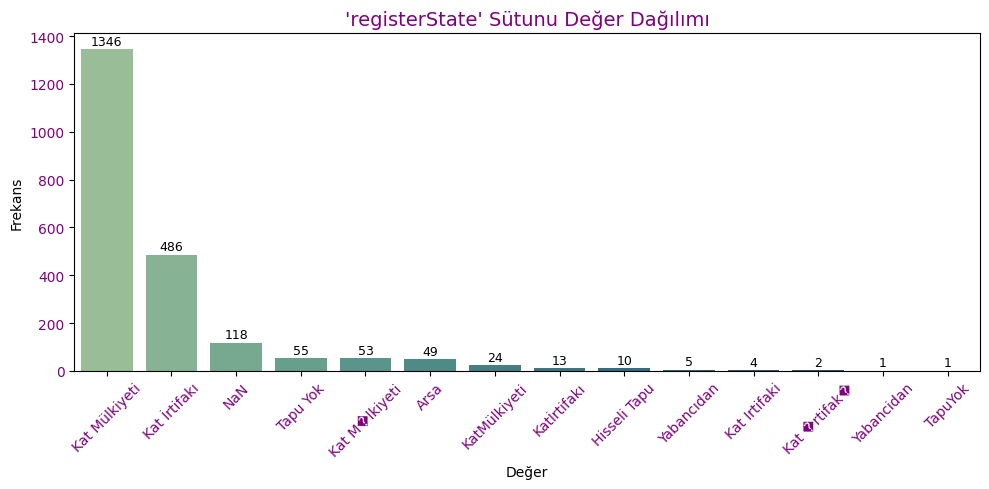

In [ ]:
plot_value_counts(df,"registerState")

In [ ]:
df[df["registerState"] == "Kat İrtifakı"]["age"].value_counts()

age
0.0      182
5.0       50
10.0      26
4.0       24
3.0       24
8.0       21
7.0       18
1.0       16
6.0       13
2.0       12
12.0      12
11.0      11
26.0      10
16.0       9
15.0       8
21.0       8
25.0       8
9.0        7
17.0       4
20.0       4
24.0       4
30.0       3
31.0       3
35.0       3
40.0       2
23.0       1
13.0       1
695.0      1
14.0       1
Name: count, dtype: int64

In [ ]:
df.shape

(2167, 91)

'searchScore' değilkeni 1 0 olarak tıklanmış tıklanmamış oluşturulacak


--- 'hasUpdateBooster' Sütunu: Değer Frekansları ---
hasUpdateBooster
False    2093
True       74
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


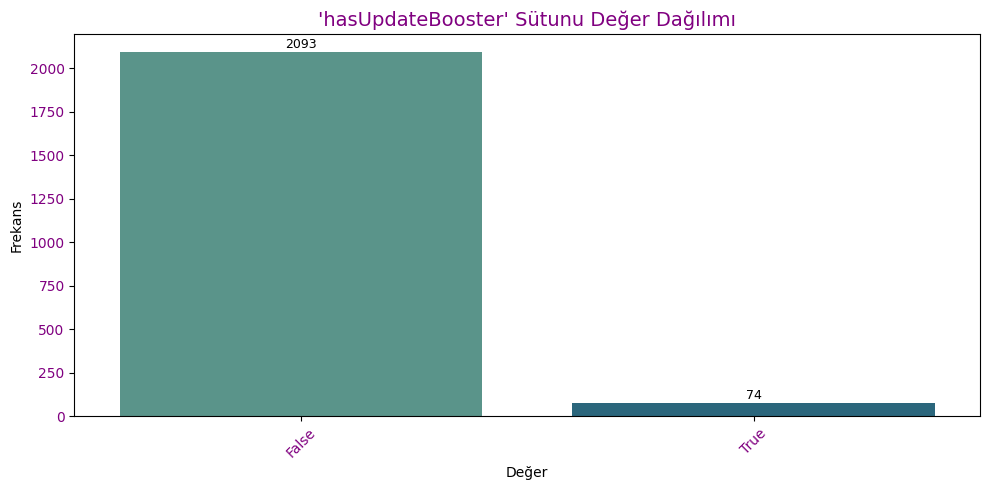

In [ ]:
plot_value_counts(df,"hasUpdateBooster")


--- 'stale' Sütunu: Değer Frekansları ---
stale
False    2091
True       76
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


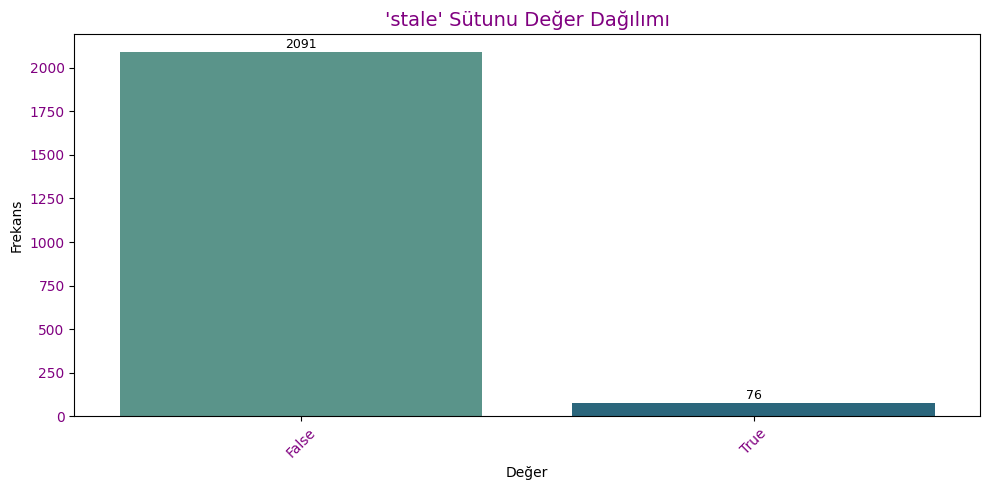

In [ ]:
plot_value_counts(df,"stale")


--- 'isVideoTypeVimeo' Sütunu: Değer Frekansları ---
isVideoTypeVimeo
False    2084
True       83
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


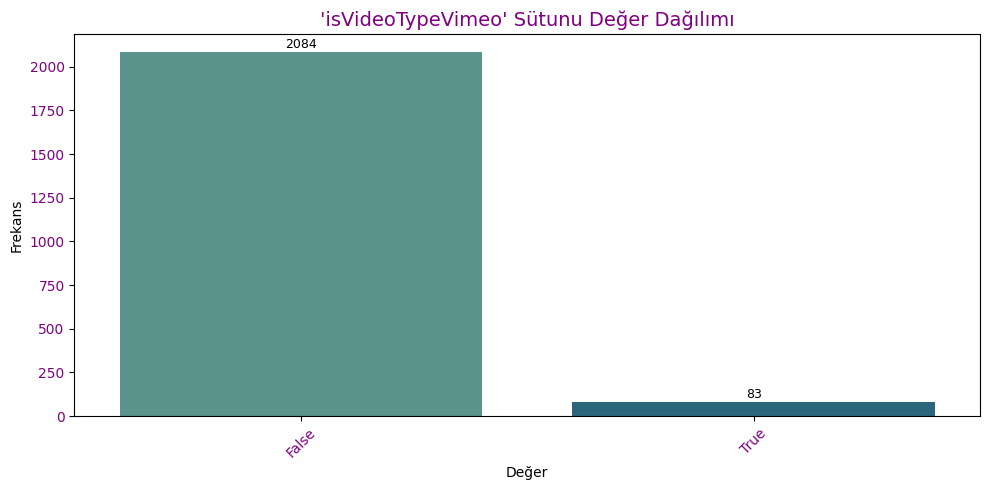

In [ ]:
plot_value_counts(df,"isVideoTypeVimeo")


--- 'hasBranded' Sütunu: Değer Frekansları ---
hasBranded
True     1150
False    1017
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


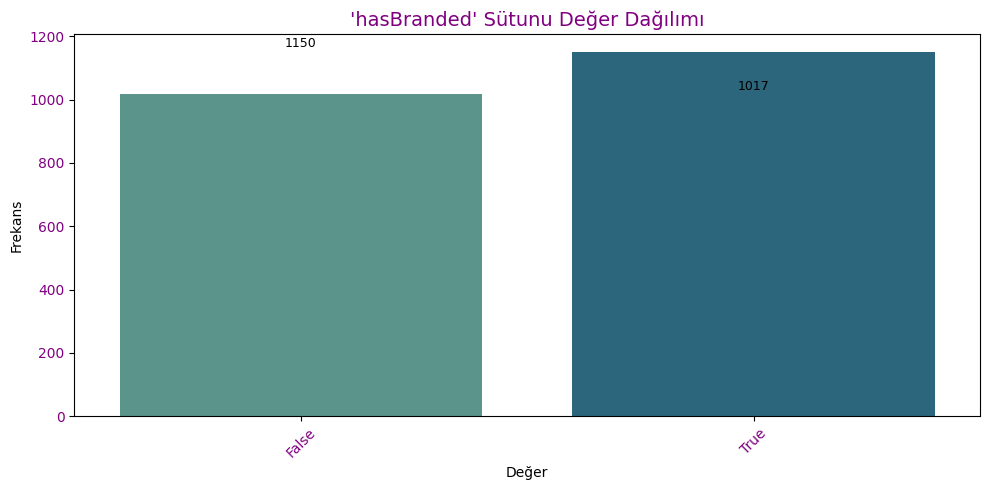

In [ ]:
plot_value_counts(df,"hasBranded")


--- 'onlineVisit' Sütunu: Değer Frekansları ---
onlineVisit
False    1349
True      818
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


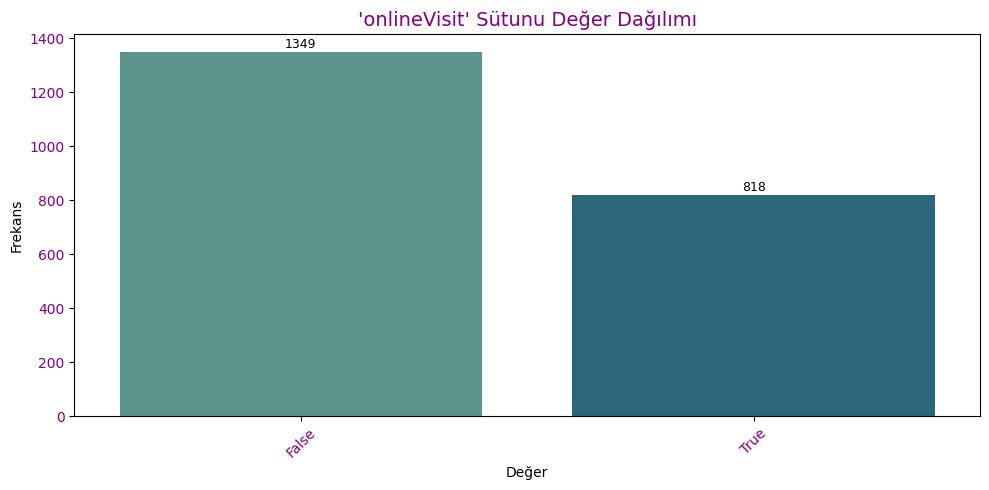

In [ ]:
plot_value_counts(df,"onlineVisit")

Silme işlemi gerçekleştiriliyor

In [ ]:
df=delete_columns(df)

In [ ]:
df.shape

(2167, 65)

In [ ]:
df.head()

listingId     price  bathRoom  sameDayUpdate   age  housingComplex  \
0    78883-704   2500000         1              0  30.0               0   
1   54537-3457   1500000         1              0   0.0               0   
2   116181-160  19500000         2              0  10.0               0   
3    18262-757   3350000         1              0   0.0               1   
4  131612-1792   3700000         3              1   0.0               0   

  authorizedRealtor furnished roomAndLivingRoom  onlineVisit  hasBranded  \
0              True     False               3+1         True       False   
1             False     False               2+1        False        True   
2              True     False               4+1         True       False   
3              True     False               3+1         True        True   
4              True     False               3+1         True       False   

   attr_ADSL  attr_Balkon  attr_Çelik Kapı  attr_Isıcam  attr_Kablo TV-Uydu  \
0          1            1                1            1                   1   
1          1            1                1            1                   1   
2          0            1                0            1                   0   
3          0            0                0            0                   0   
4          1            1                1            1                   1   

   attr_Mutfak Doğalgazı  attr_Panel Kapı  attr_Parke  attr_Seramik Zemin  \
0                      1                1           1                   1   
1                      1                1           1                   1   
2                      1                0           1                   0   
3                      0                0           0                   0   
4                      1                0           0                   1   

   attr_Otopark - Açık  attr_PVC Doğrama  attr_Cadde Üzerinde  \
0                    1                 1                    1   
1                    0                 0                    1   
2                    1                 0                    0   
3                    0                 0                    0   
4                    0                 0                    1   

   attr_Caddeye yakın  attr_E-5'e yakın  attr_Manzara - Şehir  attr_Merkezde  \
0                   1                 1                     1              1   
1                   0                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 1                     1              1   

   attr_Minibüs / Dolmuşa yakın  attr_Otobana yakın  attr_Toplu Ulaşıma yakın  \
0                             1                   1                         1   
1                             0                   0                         0   
2                             0                   1                         1   
3                             0                   0                         0   
4                             1                   1                         1   

   attr_Ankastre Mutfak  attr_Duşakabin  attr_Laminant Mutfak  \
0                     0               0                     0   
1                     1               1                     1   
2                     0               1                     0   
3                     0               0                     0   
4                     0               1                     0   

   attr_Denize yakın  attr_Açık Yüzme Havuzu  attr_Ebeveyn Banyolu  \
0                  0                       0                     0   
1                  1                       0                     0   
2                  0                       1                     0   
3                  0                       0                     0   
4                  1                       0               


--- 'barter_name' Sütunu: Değer Frekansları ---
barter_name
Yapılır     1063
Yapılmaz     785
NaN          261
Yapilir       39
Yapilmaz      16
Yap�l�r        2
Yap�lmaz       1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


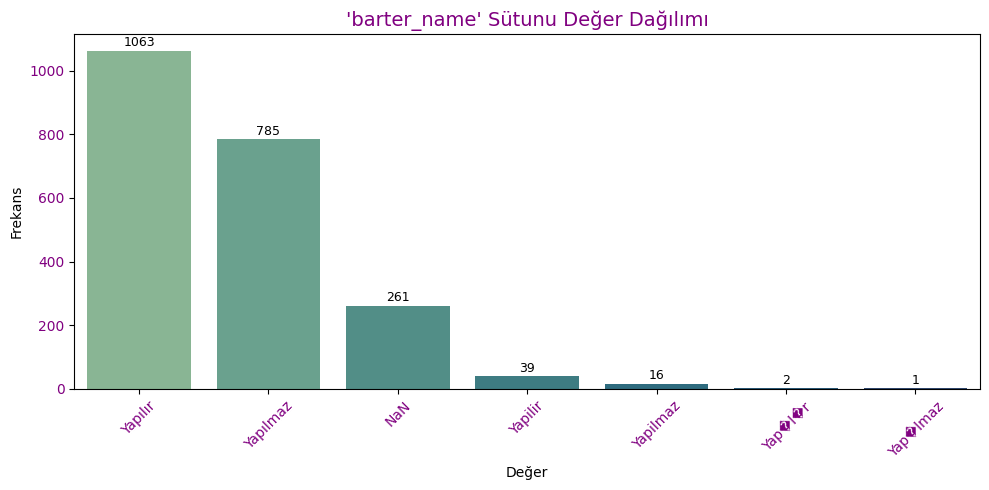

In [ ]:
plot_value_counts(df,"barter_name")

In [ ]:
# 16. barter_name sütunu hatalı verilerin düzenlenmesi
def fix_barter_values(df):
    def clean_barter(val):
        if pd.isna(val):
            return val
        val_str = str(val).strip().lower()
        if val_str.endswith('r'):
            return 'Yapılır'
        elif val_str.endswith('z'):
            return 'Yapılmaz'
        else:
            return val

    df['barter_name'] = df['barter_name'].apply(clean_barter)
    return df
df=fix_barter_values(df)

In [ ]:
df["barter_name"].value_counts(dropna=False)

barter_name
Yapılır     1104
Yapılmaz     802
None         261
Name: count, dtype: int64


--- 'barter_name' Sütunu: Değer Frekansları ---
barter_name
Yapılır     1104
Yapılmaz     802
NaN          261
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


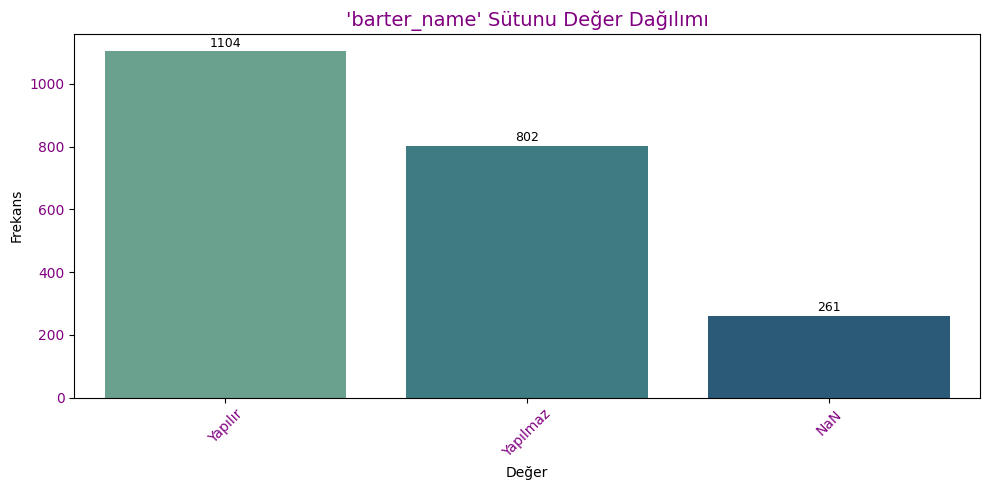

In [ ]:
plot_value_counts(df,"barter_name")


--- 'usage_name' Sütunu: Değer Frekansları ---
usage_name
Boş              1456
Mülk Sahibi       280
NaN               188
Kiracılı          173
Bos                44
Belirtilmemiş       8
M�lk Sahibi         8
MülkSahibi          4
Kiracili            3
Bo�                 3
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


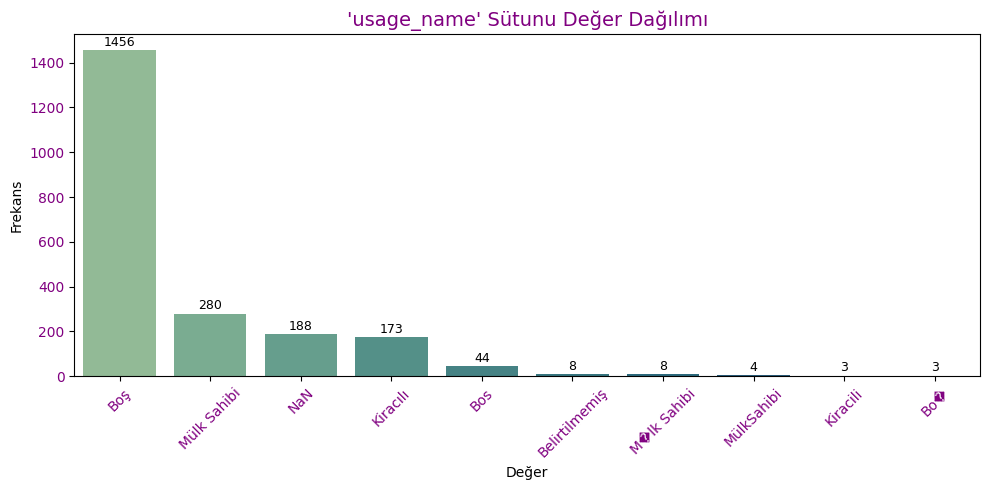

In [ ]:
plot_value_counts(df,"usage_name")

In [ ]:
# 17. usage_name sütunu hatalı verilerin düzenlenmesi
def fix_usage_values(df):
    def clean_usage(val):
        if pd.isna(val) or str(val).strip().lower() == 'none':
            return "Belirtilmemiş"
        val_str = str(val).strip()
        if val_str.startswith("Bo"):
            return "Boş"
        elif val_str.startswith("M"):
            return "Mülk Sahibi"
        elif val_str.startswith("K"):
            return "Kiracılı"
        else:
            return val  # Diğer değerler aynen kalsın

    df["usage_name"] = df["usage_name"].apply(clean_usage)
    return df
df=fix_usage_values(df)


--- 'usage_name' Sütunu: Değer Frekansları ---
usage_name
Boş              1503
Mülk Sahibi       292
Belirtilmemiş     196
Kiracılı          176
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


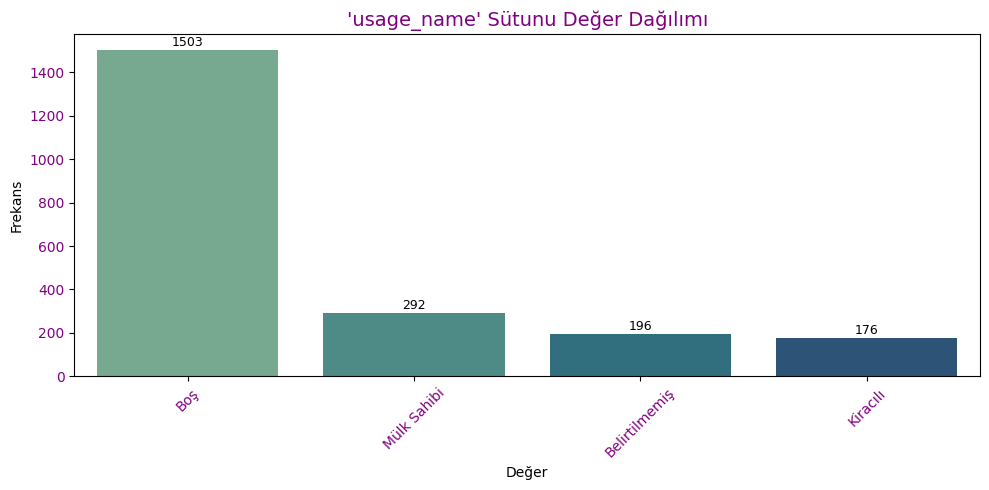

In [ ]:
plot_value_counts(df,"usage_name")


--- 'heating_name' Sütunu: Değer Frekansları ---
heating_name
Kombi                  1279
Yerden Isıtma           596
NaN                      76
Soba                     67
Yerden Isitma            27
Isıtma Yok               21
Belirtilmemiş            20
Klima                    17
Doğalgaz Sobası          14
Merkezi                  13
Kat Kaloriferi           12
YerdenIsıtma             10
Merkezi (Pay Ölçer)       5
Isı Pompası               4
Güneş Enerjisi            2
Jeotermal Isıtma          1
Yerden Is�tma             1
DoğalgazSobası            1
Merkezi (PayÖlçer)        1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


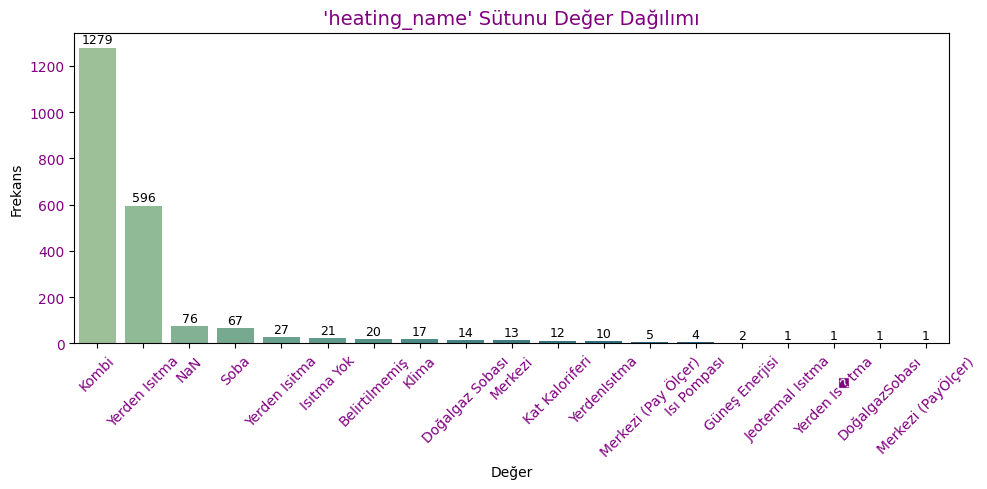

In [ ]:
plot_value_counts(df,"heating_name")

In [ ]:
# 18. heating_name sütunu hatalı verilerin düzenlenmesi
def fix_heating_values(df):
    def clean_heating(val):
        if pd.isna(val) or str(val).strip().lower() == 'none':
            return "Diğer"

        val_str = str(val).strip().lower()

        # Yerden Isıtma grubu
        if val_str.startswith("y"):
            return "Yerden Isıtma"

        # Kombi
        elif "kombi" in val_str:
            return "Kombi"

        # Nadir gruplar
        else:
            return "Diğer"

    df["heating_name"] = df["heating_name"].apply(clean_heating)
    return df
df=fix_heating_values(df)


--- 'heating_name' Sütunu: Değer Frekansları ---
heating_name
Kombi            1279
Yerden Isıtma     634
Diğer             254
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


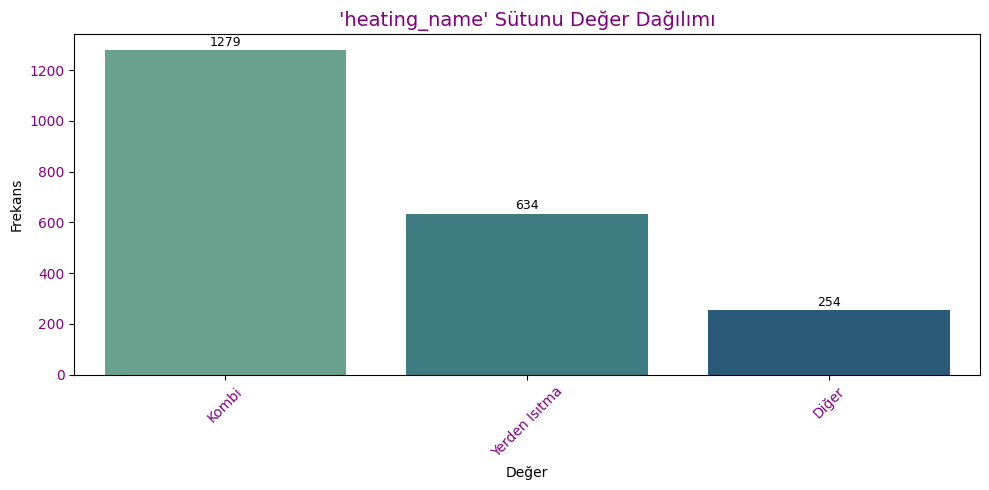

In [ ]:
plot_value_counts(df,"heating_name")


--- 'credit_name' Sütunu: Değer Frekansları ---
credit_name
Uygun          1894
Uygun değil     183
NaN              76
Uygundeğil        4
Uygun degil       4
Uygun Değil       4
Uygun de�il       1
Bilinmiyor        1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


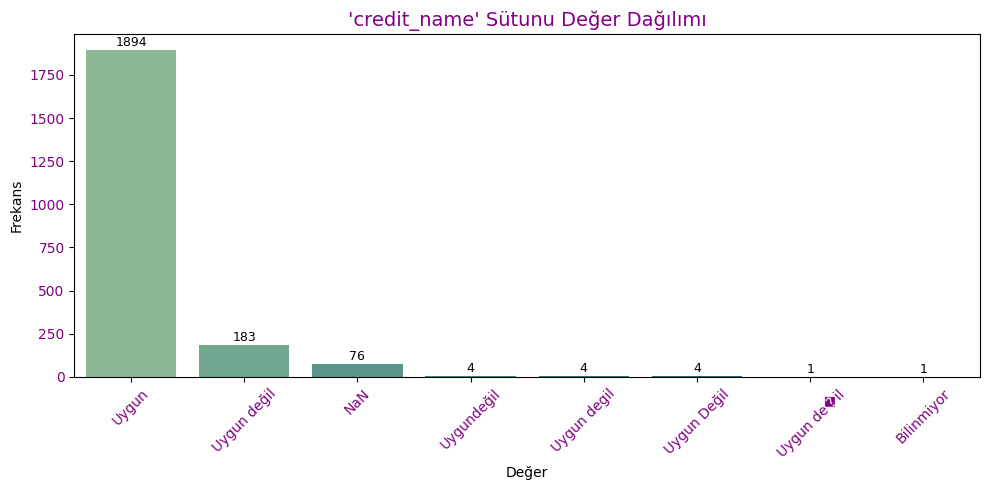

In [ ]:
plot_value_counts(df,"credit_name")

In [ ]:
# 19. credit_name sütunu hatalı verilerin düzenlenmesi
def fix_credit_values(df):
    def clean_credit(val):
        if str(val).strip().lower() == "uygun":
            return "Uygun"
        else:
            return "Uygun Değil"

    df["credit_name"] = df["credit_name"].apply(clean_credit)
    return df
df=fix_credit_values(df)


--- 'credit_name' Sütunu: Değer Frekansları ---
credit_name
Uygun          1894
Uygun Değil     273
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


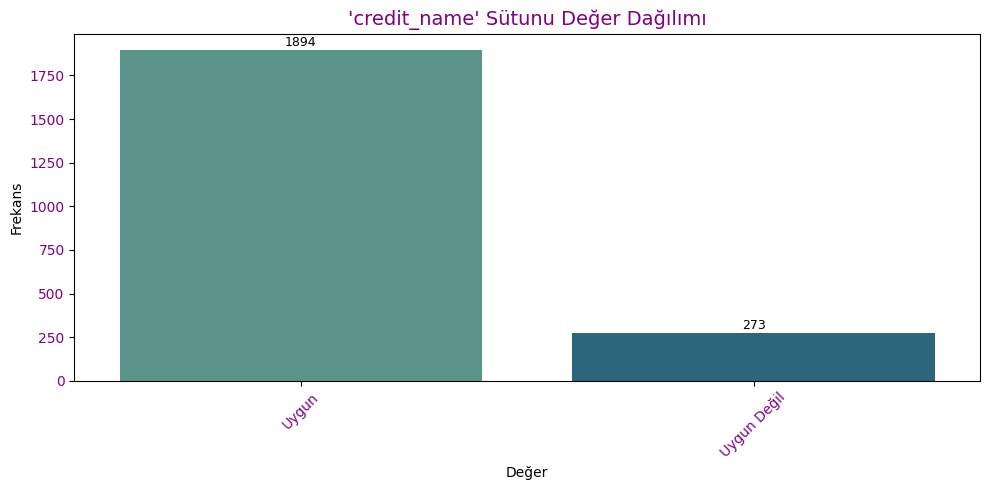

In [ ]:
plot_value_counts(df,"credit_name")

<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")



--- 'age' Sütunu: Değer Frekansları ---
age
0.0      824
5.0      257
4.0      102
NaN       76
10.0      72
3.0       69
8.0       68
2.0       68
11.0      67
1.0       65
7.0       51
6.0       46
16.0      41
26.0      41
15.0      40
30.0      36
21.0      33
12.0      27
25.0      24
20.0      19
31.0      18
13.0      14
9.0       14
35.0      12
17.0      11
40.0      10
14.0      10
24.0      10
18.0       6
32.0       6
27.0       6
45.0       4
19.0       4
22.0       4
28.0       3
23.0       3
34.0       2
50.0       1
46.0       1
42.0       1
695.0      1
Name: count, dtype: int64


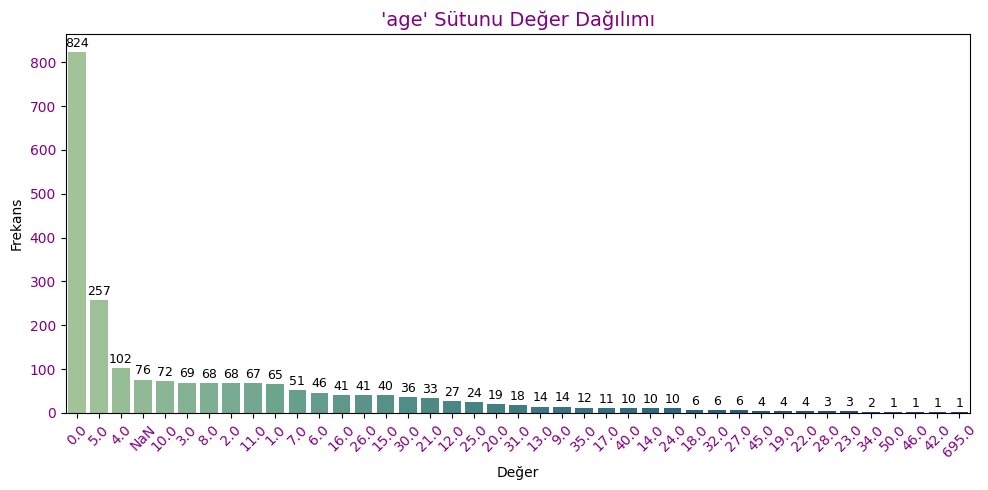


--- 'furnished' Sütunu: Değer Frekansları ---
furnished
False    1643
NaN       295
True      229
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


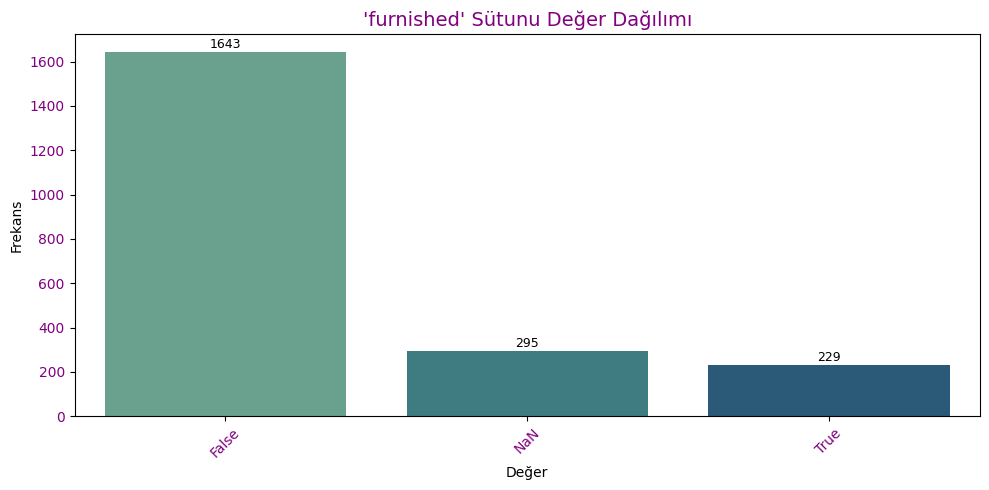


--- 'barter_name' Sütunu: Değer Frekansları ---
barter_name
Yapılır     1104
Yapılmaz     802
NaN          261
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


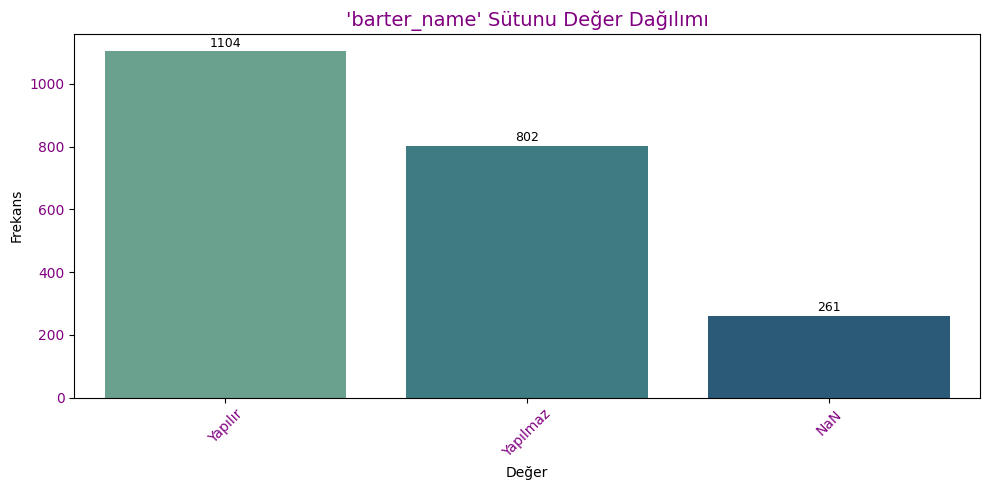


--- 'authorizedRealtor' Sütunu: Değer Frekansları ---
authorizedRealtor
False    1066
True     1025
NaN        76
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


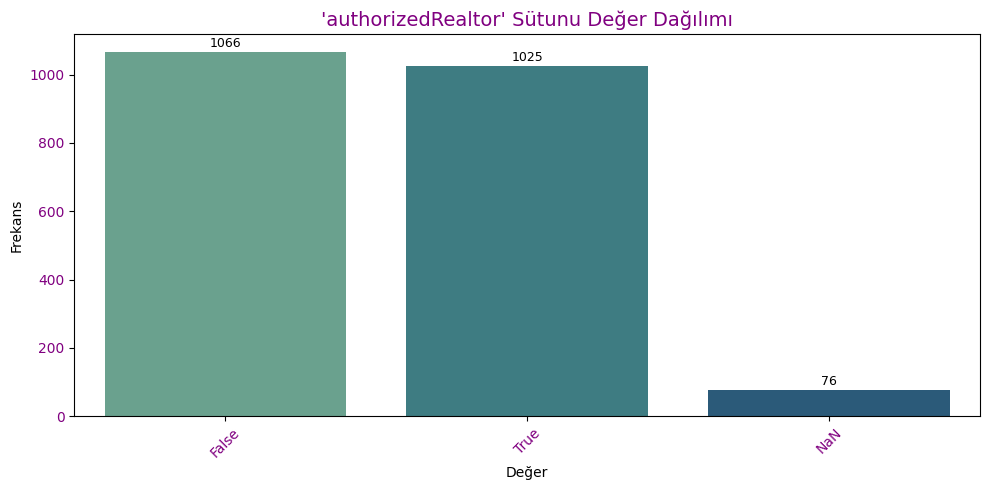


--- 'rental_amount' Sütunu: Değer Frekansları ---
rental_amount
0.0         1762
NaN           76
15000.0       64
10000.0       42
12000.0       34
20000.0       30
25000.0       25
30000.0       15
13000.0       14
35000.0       12
18000.0       11
17000.0        8
50000.0        8
40000.0        7
60000.0        7
14000.0        5
80000.0        4
8000.0         4
45000.0        3
5000.0         3
12500.0        3
100000.0       3
7500.0         2
8500.0         2
7000.0         2
22000.0        2
75000.0        2
17500.0        2
24000.0        1
27000.0        1
16000.0        1
1.0            1
45.0           1
28000.0        1
150000.0       1
13500.0        1
90000.0        1
9000.0         1
70000.0        1
1200.0         1
400000.0       1
11000.0        1
600000.0       1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


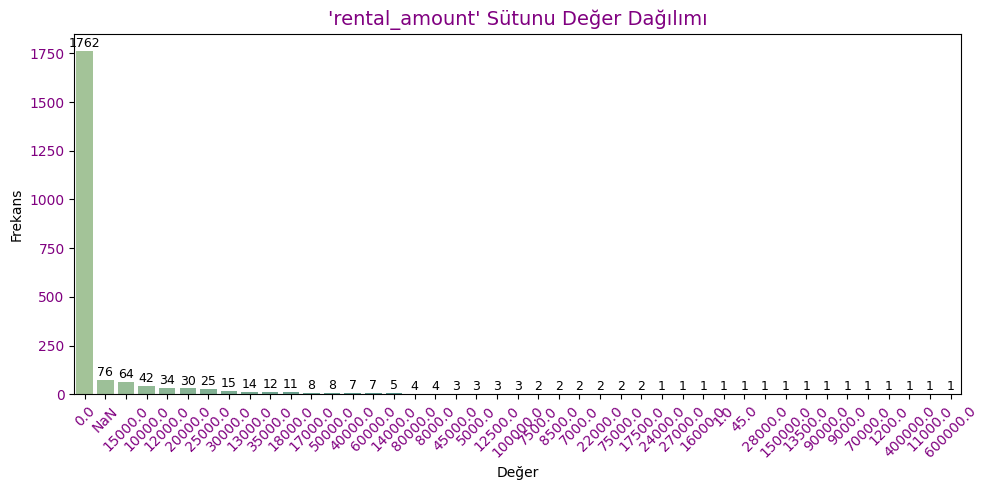


--- 'floor_count' Sütunu: Değer Frekansları ---
floor_count
3.0      1028
NaN       596
2.0       256
4.0       198
5.0        54
1.0        33
10.0        1
314.0       1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


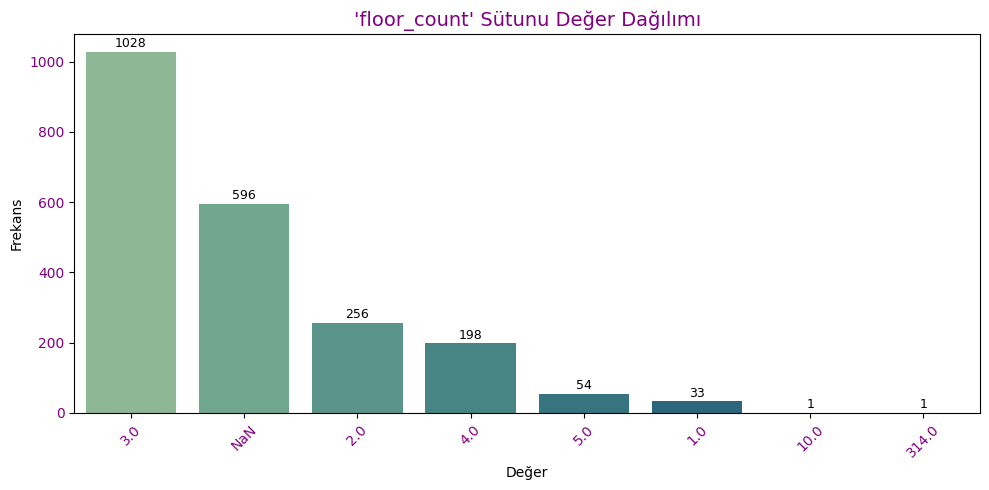

In [ ]:
plot_value_counts(df,'age')
plot_value_counts(df,'furnished')
plot_value_counts(df,'barter_name')
plot_value_counts(df,'authorizedRealtor')
plot_value_counts(df,'rental_amount')
plot_value_counts(df,'floor_count')

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['boş değer sayısı','oran'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


In [ ]:
missing_values_table(df, na_name=False)

                   boş değer sayısı   oran
buildState_name                 990  45.69
floor_count                     596  27.50
furnished                       295  13.61
barter_name                     261  12.04
age                              76   3.51
authorizedRealtor                76   3.51
rental_amount                    76   3.51


In [ ]:
# 20. Boş değerleri gruplayarak dolduran fonksiyon
def fill_missing_values(df):
    #  'age' sütununu district_name ortalaması ile doldur
    df['age'] = df.groupby('district_name')['age'].transform(lambda x: x.fillna(x.mean()))

    #  'furnished' sütununu district_name modu ile doldur
    df['furnished'] = df.groupby('district_name')['furnished'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

    #  'barter_name' sütununu county_name modu ile doldur
    df['barter_name'] = df.groupby('county_name')['barter_name'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

    #  'authorizedRealtor' sütununu county_name modu ile doldur
    df['authorizedRealtor'] = df.groupby('county_name')['authorizedRealtor'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

    #  'rental_amount' sütununu district_name modu ile doldur
    df['rental_amount'] = df.groupby('district_name')['rental_amount'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

    #  'floor_count' sütununu district_name medyanı ile doldur
    df['floor_count'] = df.groupby('district_name')['floor_count'].transform(lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else x)

    for col in df.columns:
        if col == 'buildState_name':
            continue  # Atla
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
        else:
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col] = df[col].fillna(mode_val.iloc[0])

    return df
df=fill_missing_values(df)

<ipython-input-528-3b4a42cc662e>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnished'] = df.groupby('district_name')['furnished'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
<ipython-input-528-3b4a42cc662e>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['authorizedRealtor'] = df.groupby('county_name')['authorizedRealtor'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
<ipython-input-528-3b4a42cc662e>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfil

In [ ]:
missing_values_table(df, na_name=False)

                 boş değer sayısı   oran
buildState_name               990  45.69


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")



--- 'buildState_name' Sütunu: Değer Frekansları ---
buildState_name
NaN                 990
İkinci El           582
Sıfır               521
Sifir                29
İkinciEl             19
0                    11
Ikinci El             9
Yapım Aşamasında      5
Kiracılı              1
Name: count, dtype: int64


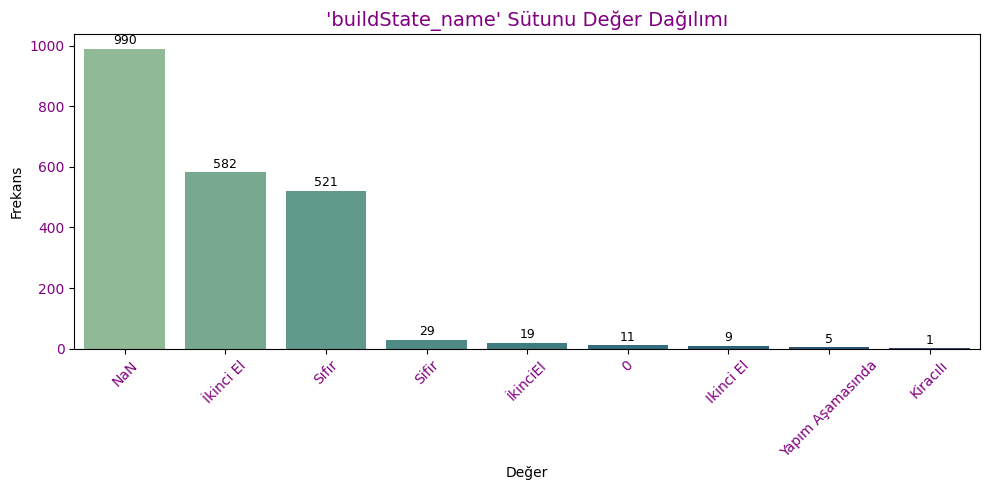

In [ ]:
plot_value_counts(df,'buildState_name')

In [ ]:
# 21. buildState_name sütunu hatalı verilerin düzenlenmesi
def fix_buildState_name(df):
    def clean_buildstate(val, age):
        if pd.isna(val) or str(val).strip().lower() == 'none':
            # Sonra age değerine göre doldurulacak, şimdilik None bırakıyoruz
            return None

        val_str = str(val).strip().lower()

        if val_str.startswith(('i', 'k')):
            return "İkinci El"
        elif val_str.startswith(('s', '0', 'y')):
            return "Sıfır"
        else:
            return val  # Diğer değerler olduğu gibi kalacak

    # Önce temizleyelim
    df['buildState_name'] = [clean_buildstate(val, age) for val, age in zip(df['buildState_name'], df['age'])]

    # Şimdi None olanları age değerine göre dolduralım
    def fill_none(row):
        if row['buildState_name'] is not None:
            return row['buildState_name']
        else:
            if row['age'] == 0:
                return "Sıfır"
            else:
                return "İkinci El"

    df['buildState_name'] = df.apply(fill_none, axis=1)

    return df
df=fix_buildState_name(df)


--- 'buildState_name' Sütunu: Değer Frekansları ---
buildState_name
İkinci El    1284
Sıfır         883
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


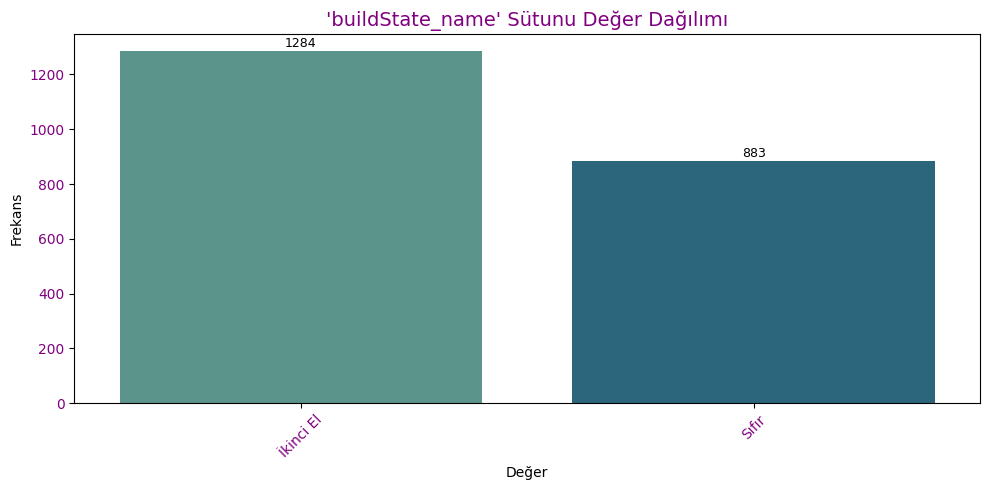

In [ ]:
plot_value_counts(df,'buildState_name')

In [ ]:
missing_values_table(df, na_name=False)

Empty DataFrame
Columns: [boş değer sayısı, oran]
Index: []


# **AYKIRI DEĞER ANALİZİ**

In [ ]:
df.shape

(2167, 65)

In [ ]:
def grab_col_names(dataframe, cat_th=10):

    #Nümerik ama kardşnalitesi yüksek sütunlar
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
              dataframe[col].dtypes !="O"]

    #num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    #nümerik olanları alıyor ama nümerik gibi gözüküp categorik olanları almıyor bunu kardinalitesinin az olmasından anlıyor


    print(f"Satır sayısı: {dataframe.shape[0]}")
    print(f"Sütun sayısı: {dataframe.shape[1]}")
    print(f"num_cols: {len(num_cols)}")

    return num_cols

In [ ]:
num_cols = grab_col_names(df)

Satır sayısı: 2167
Sütun sayısı: 65
num_cols: 10


In [ ]:
num_cols

['price',
 'bathRoom',
 'age',
 'total_features',
 'floor_count',
 'net',
 'gross',
 'rental_amount',
 'total_room_count',
 'avg_area_per_room']

In [ ]:
def plot_numeric_corr_heatmap(df,numeric_cols):

    # Korelasyon matrisi hesapla
    corr_matrix = df[numeric_cols].corr()

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title('Sayısal Değişkenler Korelasyon Matrisi')
    plt.show()


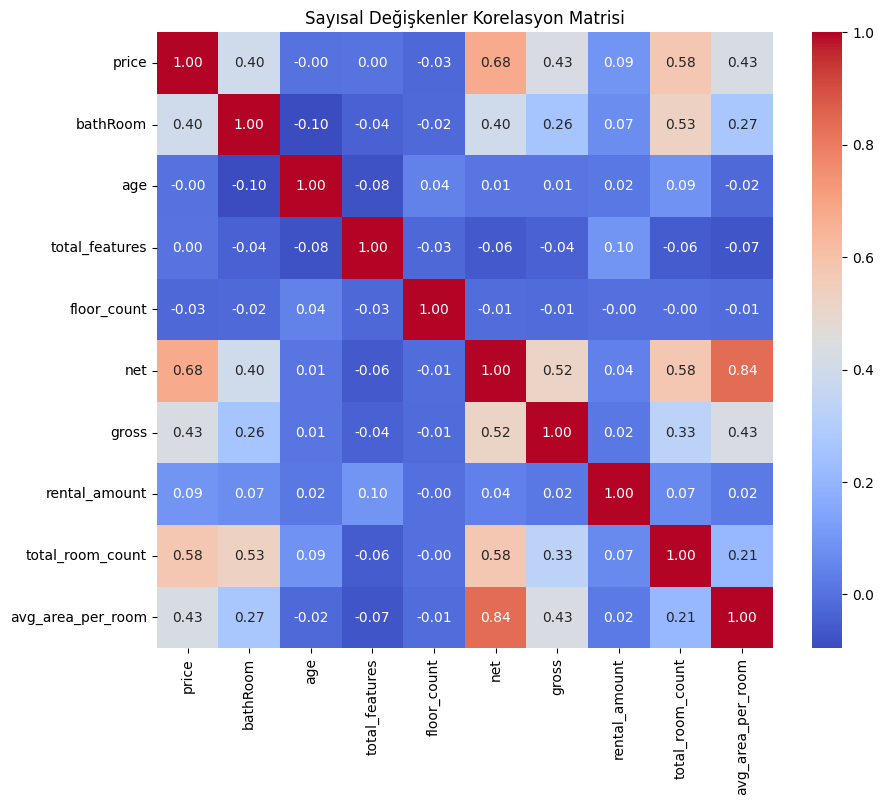

In [ ]:
plot_numeric_corr_heatmap(df,num_cols)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, num_cols, q1_ratio=0.05, q3_ratio=0.95):
    # Filter out 'price' and ensure columns exist in df
    num_cols = [col for col in num_cols if col != 'price' and col in df.columns]

    # Check if there are any valid columns to process
    if not num_cols:
        print("No valid numerical columns (excluding 'price') found in DataFrame.")
        return {}

    outlier_details = {}

    for col in num_cols:
        Q1 = df[col].quantile(q1_ratio)
        Q3 = df[col].quantile(q3_ratio)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_min = df[col].min()
        col_max = df[col].max()

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_details[col] = {
            "count": len(outliers),
            "values": outliers.values,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "min": col_min,
            "max": col_max
        }

        # Visualization
        plt.figure(figsize=(10, 4))
        sns.stripplot(x=df[col], color='blue', alpha=0.3, jitter=True)
        plt.axvline(Q1, color='orange', linestyle='-', label=f'Q1 ({q1_ratio:.2f}): {Q1:.2f}')
        plt.axvline(Q3, color='orange', linestyle='-', label=f'Q3 ({q3_ratio:.2f}): {Q3:.2f}')
        plt.axvline(lower_bound, color='red', linestyle='--', label=f'Alt Sınır: {lower_bound:.2f}')
        plt.axvline(upper_bound, color='green', linestyle='--', label=f'Üst Sınır: {upper_bound:.2f}')
        plt.axvline(col_min, color='purple', linestyle=':', label=f'Min: {col_min:.2f}')
        plt.axvline(col_max, color='black', linestyle=':', label=f'Max: {col_max:.2f}')
        plt.title(f'{col} Sütunu için Aykırı Değer Görselleştirmesi')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print outlier details
        print(f"{col} - {len(outliers)} aykırı değer:")
        print(f"Alt Sınır: {lower_bound:.2f} | Üst Sınır: {upper_bound:.2f}")
        print(f"Minimum Değer: {col_min:.2f} | Maksimum Değer: {col_max:.2f}")
        print("Aykırı Değerler:", outliers.values)
        print("-" * 60)

    return outlier_details

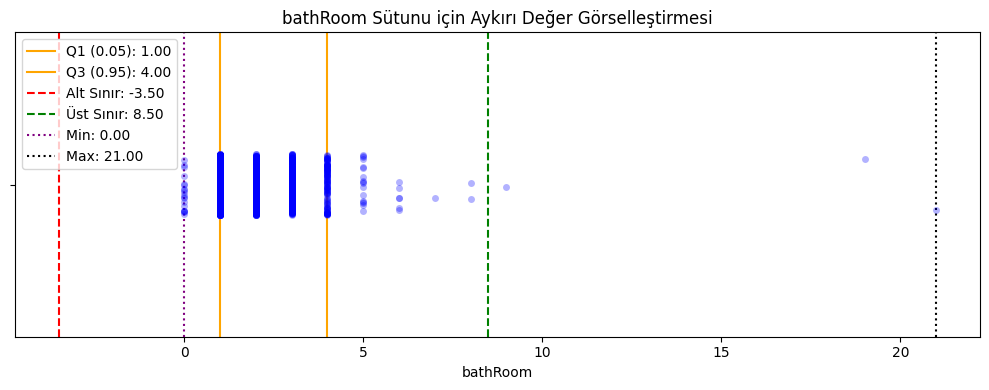

bathRoom - 3 aykırı değer:
Alt Sınır: -3.50 | Üst Sınır: 8.50
Minimum Değer: 0.00 | Maksimum Değer: 21.00
Aykırı Değerler: [19 21  9]
------------------------------------------------------------


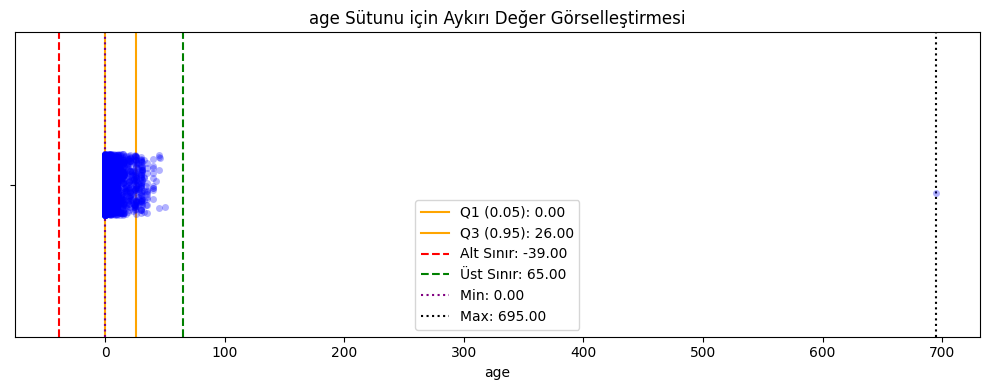

age - 1 aykırı değer:
Alt Sınır: -39.00 | Üst Sınır: 65.00
Minimum Değer: 0.00 | Maksimum Değer: 695.00
Aykırı Değerler: [695.]
------------------------------------------------------------


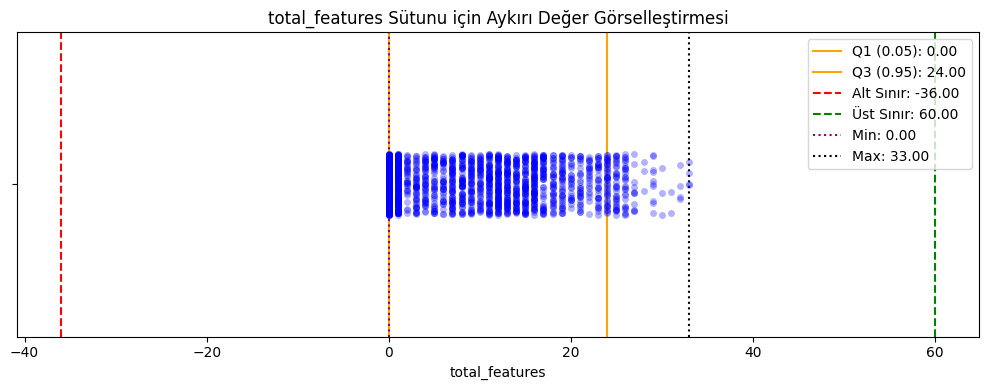

total_features - 0 aykırı değer:
Alt Sınır: -36.00 | Üst Sınır: 60.00
Minimum Değer: 0.00 | Maksimum Değer: 33.00
Aykırı Değerler: []
------------------------------------------------------------


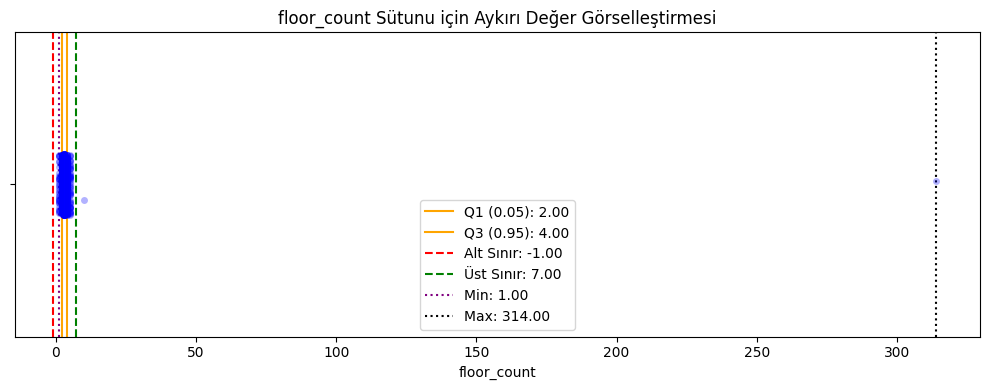

floor_count - 2 aykırı değer:
Alt Sınır: -1.00 | Üst Sınır: 7.00
Minimum Değer: 1.00 | Maksimum Değer: 314.00
Aykırı Değerler: [ 10. 314.]
------------------------------------------------------------


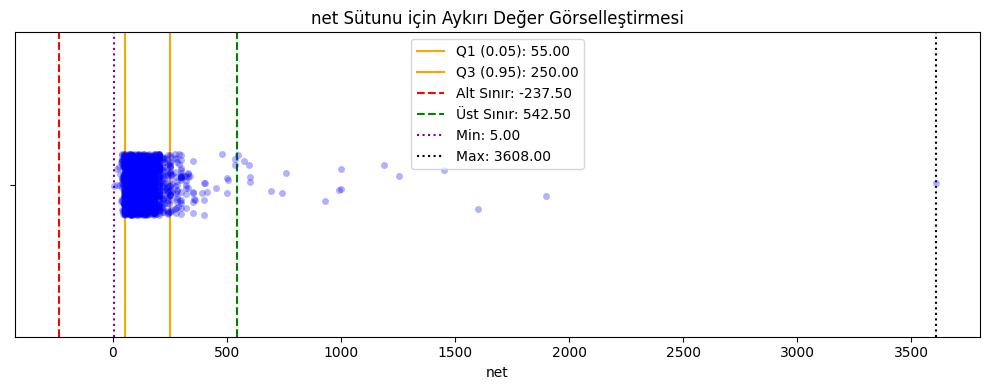

net - 18 aykırı değer:
Alt Sınır: -237.50 | Üst Sınır: 542.50
Minimum Değer: 5.00 | Maksimum Değer: 3608.00
Aykırı Değerler: [ 760  550  600  575 3608  990  693 1255 1450  743  600 1190 1000 1600
  930  596  998 1900]
------------------------------------------------------------


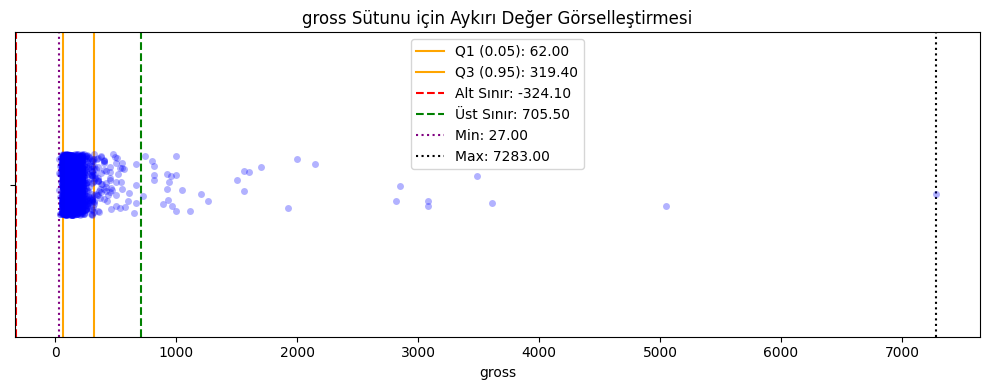

gross - 36 aykırı değer:
Alt Sınır: -324.10 | Üst Sınır: 705.50
Minimum Değer: 27.00 | Maksimum Değer: 7283.00
Aykırı Değerler: [ 920 3080  930  967 3080 3609 1050 1000  938  720 1110  812  812 1260
 5050  922 1600 2813 3490 1560  888 7283 1500 2000  744  812  952 1560
 1200 2846 2150 1700 1000  796 1000 1920]
------------------------------------------------------------


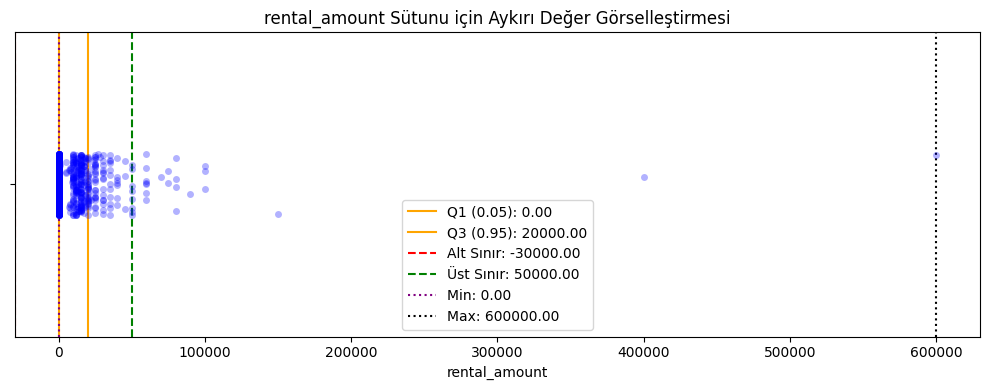

rental_amount - 21 aykırı değer:
Alt Sınır: -30000.00 | Üst Sınır: 50000.00
Minimum Değer: 0.00 | Maksimum Değer: 600000.00
Aykırı Değerler: [ 60000.  60000.  60000.  75000.  80000. 150000. 100000.  60000. 100000.
  80000.  90000.  60000.  70000.  80000.  80000. 100000.  60000.  75000.
 400000.  60000. 600000.]
------------------------------------------------------------


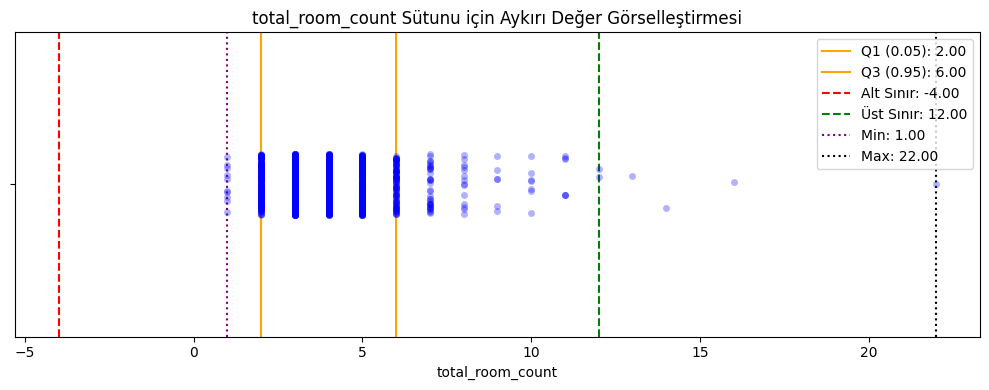

total_room_count - 4 aykırı değer:
Alt Sınır: -4.00 | Üst Sınır: 12.00
Minimum Değer: 1.00 | Maksimum Değer: 22.00
Aykırı Değerler: [13 16 22 14]
------------------------------------------------------------


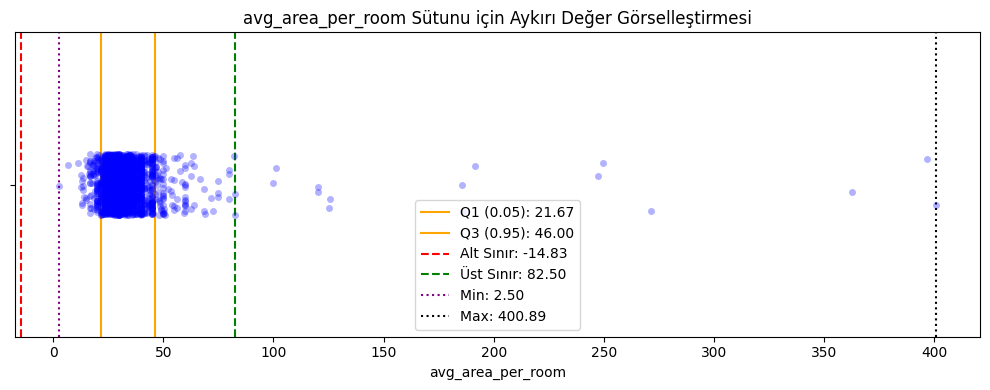

avg_area_per_room - 15 aykırı değer:
Alt Sınır: -14.83 | Üst Sınır: 82.50
Minimum Değer: 2.50 | Maksimum Değer: 400.89
Aykırı Değerler: [120.         101.         191.66666667 400.88888889 247.5
 125.         125.5        362.5        185.75       120.
 396.66666667 186.         100.         249.5        271.42857143]
------------------------------------------------------------


In [ ]:
outliers_info = detect_outliers(df, num_cols)

In [ ]:
# 22. Aykırı değerleri üst sınırla baskıla
def suppress_upper_outliers(df, outlier_info):

    for col, info in outlier_info.items():
        upper = info['upper_bound']
        df[col] = np.where(df[col] > upper, upper, df[col])
        print(f"{col} sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: {df[col].max():.2f}")

    return df

In [ ]:
df=suppress_upper_outliers(df,outliers_info)

bathRoom sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 8.50
age sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 65.00
total_features sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 33.00
floor_count sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 7.00
net sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 542.50
gross sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 705.50
rental_amount sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 50000.00
total_room_count sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 12.00
avg_area_per_room sütunundaki üst sınırdan büyük değerler baskılandı. Yeni max: 82.50


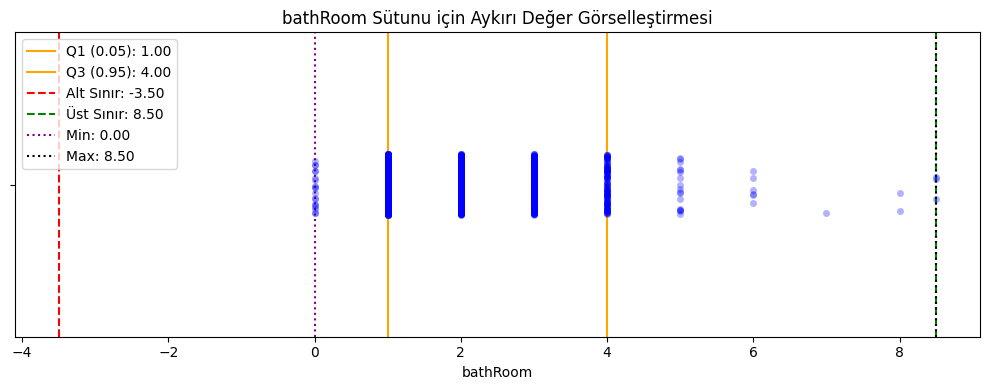

bathRoom - 0 aykırı değer:
Alt Sınır: -3.50 | Üst Sınır: 8.50
Minimum Değer: 0.00 | Maksimum Değer: 8.50
Aykırı Değerler: []
------------------------------------------------------------


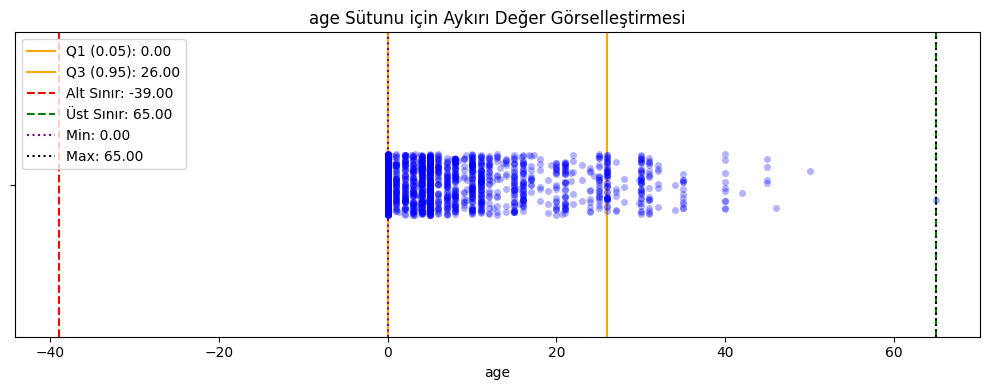

age - 0 aykırı değer:
Alt Sınır: -39.00 | Üst Sınır: 65.00
Minimum Değer: 0.00 | Maksimum Değer: 65.00
Aykırı Değerler: []
------------------------------------------------------------


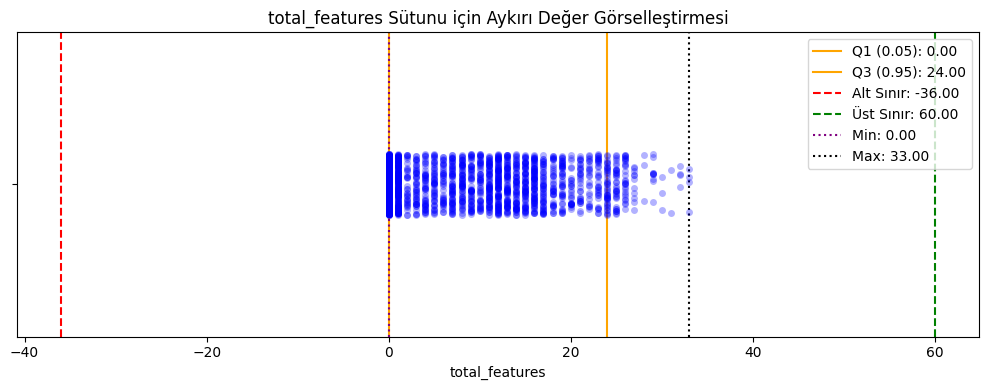

total_features - 0 aykırı değer:
Alt Sınır: -36.00 | Üst Sınır: 60.00
Minimum Değer: 0.00 | Maksimum Değer: 33.00
Aykırı Değerler: []
------------------------------------------------------------


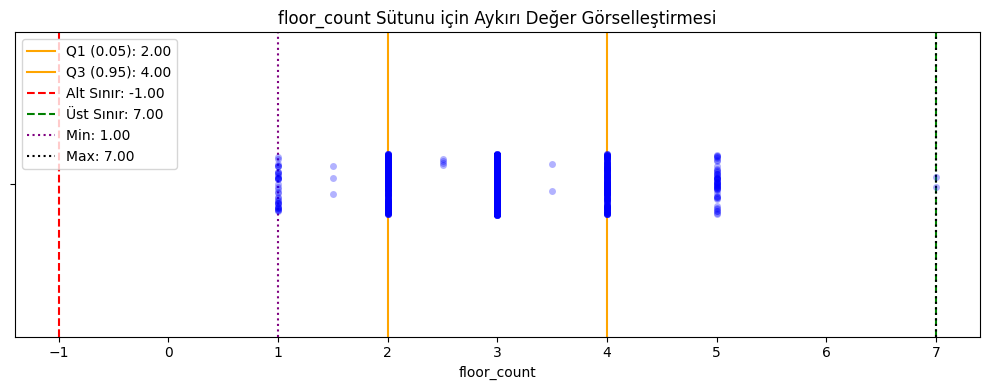

floor_count - 0 aykırı değer:
Alt Sınır: -1.00 | Üst Sınır: 7.00
Minimum Değer: 1.00 | Maksimum Değer: 7.00
Aykırı Değerler: []
------------------------------------------------------------


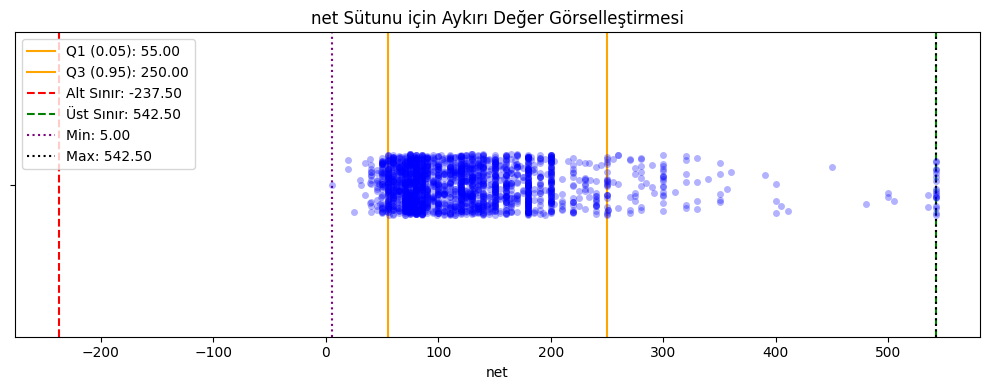

net - 0 aykırı değer:
Alt Sınır: -237.50 | Üst Sınır: 542.50
Minimum Değer: 5.00 | Maksimum Değer: 542.50
Aykırı Değerler: []
------------------------------------------------------------


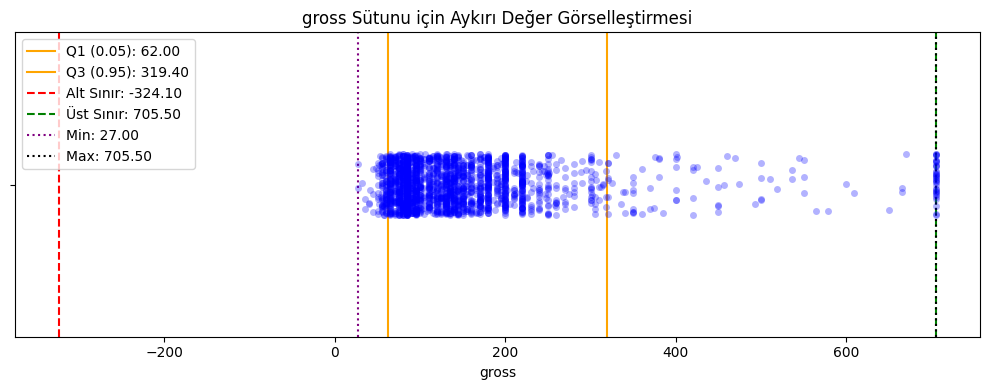

gross - 0 aykırı değer:
Alt Sınır: -324.10 | Üst Sınır: 705.50
Minimum Değer: 27.00 | Maksimum Değer: 705.50
Aykırı Değerler: []
------------------------------------------------------------


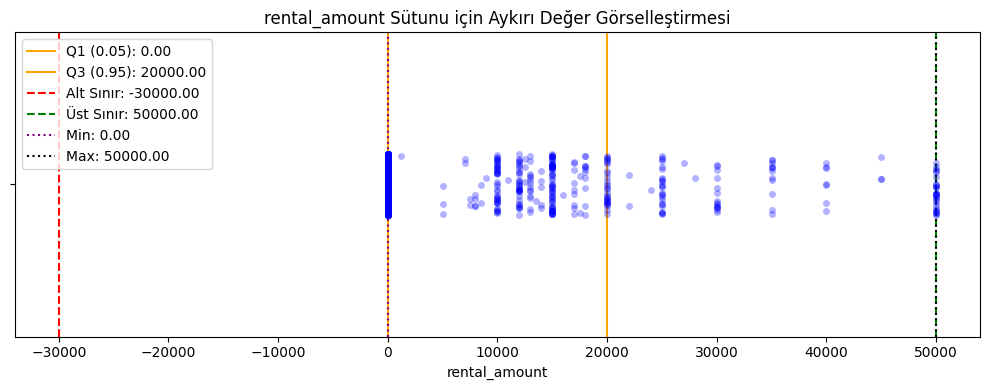

rental_amount - 0 aykırı değer:
Alt Sınır: -30000.00 | Üst Sınır: 50000.00
Minimum Değer: 0.00 | Maksimum Değer: 50000.00
Aykırı Değerler: []
------------------------------------------------------------


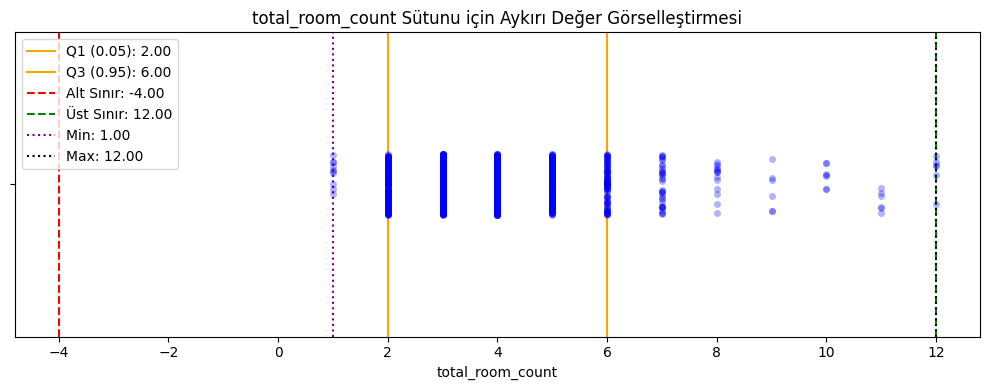

total_room_count - 0 aykırı değer:
Alt Sınır: -4.00 | Üst Sınır: 12.00
Minimum Değer: 1.00 | Maksimum Değer: 12.00
Aykırı Değerler: []
------------------------------------------------------------


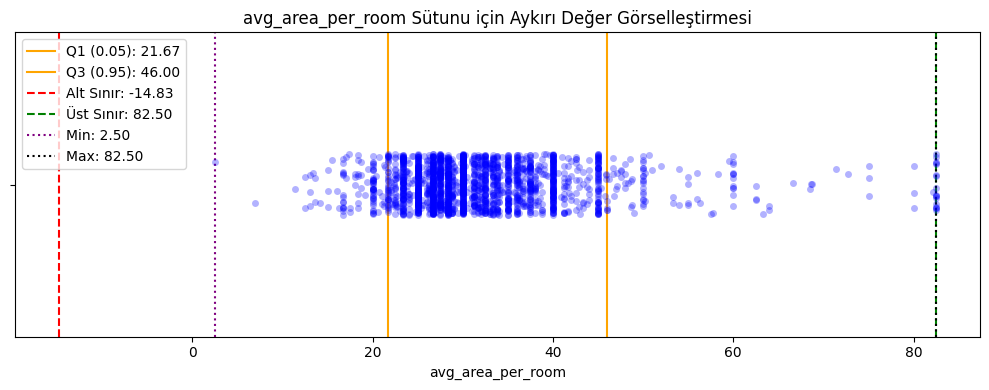

avg_area_per_room - 0 aykırı değer:
Alt Sınır: -14.83 | Üst Sınır: 82.50
Minimum Değer: 2.50 | Maksimum Değer: 82.50
Aykırı Değerler: []
------------------------------------------------------------


In [ ]:
outliers_info = detect_outliers(df, num_cols)

In [ ]:
num_cols

['price',
 'bathRoom',
 'age',
 'total_features',
 'floor_count',
 'net',
 'gross',
 'rental_amount',
 'total_room_count',
 'avg_area_per_room']

In [ ]:
def scale_selected_columns(df, numeric_cols):
    valid_cols = [col for col in numeric_cols if col != 'price' and col in df.columns]

    if not valid_cols:
        print("No valid numerical columns (excluding 'price') found in DataFrame.")
        return df

    scaler = MinMaxScaler()
    df[valid_cols] = scaler.fit_transform(df[valid_cols])

    return df
num_cols = grab_col_names(df)


df = scale_selected_columns(df, num_cols)

Satır sayısı: 2167
Sütun sayısı: 65
num_cols: 9


In [ ]:
df.head()

listingId     price  bathRoom  sameDayUpdate       age  housingComplex  \
0    78883-704   2500000  0.117647              0  0.461538               0   
1   54537-3457   1500000  0.117647              0  0.000000               0   
2   116181-160  19500000  0.235294              0  0.153846               0   
3    18262-757   3350000  0.117647              0  0.000000               1   
4  131612-1792   3700000  0.352941              1  0.000000               0   

   authorizedRealtor  furnished roomAndLivingRoom  onlineVisit  hasBranded  \
0               True      False               3+1         True       False   
1              False      False               2+1        False        True   
2               True      False               4+1         True       False   
3               True      False               3+1         True        True   
4               True      False               3+1         True       False   

   attr_ADSL  attr_Balkon  attr_Çelik Kapı  attr_Isıcam  attr_Kablo TV-Uydu  \
0          1            1                1            1                   1   
1          1            1                1            1                   1   
2          0            1                0            1                   0   
3          0            0                0            0                   0   
4          1            1                1            1                   1   

   attr_Mutfak Doğalgazı  attr_Panel Kapı  attr_Parke  attr_Seramik Zemin  \
0                      1                1           1                   1   
1                      1                1           1                   1   
2                      1                0           1                   0   
3                      0                0           0                   0   
4                      1                0           0                   1   

   attr_Otopark - Açık  attr_PVC Doğrama  attr_Cadde Üzerinde  \
0                    1                 1                    1   
1                    0                 0                    1   
2                    1                 0                    0   
3                    0                 0                    0   
4                    0                 0                    1   

   attr_Caddeye yakın  attr_E-5'e yakın  attr_Manzara - Şehir  attr_Merkezde  \
0                   1                 1                     1              1   
1                   0                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 1                     1              1   

   attr_Minibüs / Dolmuşa yakın  attr_Otobana yakın  attr_Toplu Ulaşıma yakın  \
0                             1                   1                         1   
1                             0                   0                         0   
2                             0                   1                         1   
3                             0                   0                         0   
4                             1                   1                         1   

   attr_Ankastre Mutfak  attr_Duşakabin  attr_Laminant Mutfak  \
0                     0               0                     0   
1                     1               1                     1   
2                     0               1                     0   
3                     0               0                     0   
4                     0               1                     0   

   attr_Denize yakın  attr_Açık Yüzme Havuzu  attr_Ebeveyn Banyolu  \
0                  0                       0                     0   
1                  1                       0                     0   
2                  0                       1                     0   
3                  0                       0                     0   
4                  1   

In [ ]:
df["district_name"].value_counts(dropna=False)

district_name
Yalı                   647
Aziziye                295
Yeni                    88
Alandere                77
Kemalpaşa               70
Korucuk                 42
Yali                    34
Yayla                   33
İstiklal                32
Vatan                   29
Arabacıalanı            27
Yağcılar                26
İncilli                 22
Gazipaşa                22
Göl                     18
Kabakoz                 18
Rüstempasa              17
Kırkpınar Soğuksu       17
Yazlık                  17
Fatih                   16
Köprübaşı               15
15 Temmuz Camili        14
Çayiçi                  14
Erenler                 13
Karaman                 13
Tekeler                 13
Kırkpınar Hasanpaşa     12
Orta                    12
Maltepe                 11
Cumhuriyet              11
Elperek                 11
Şeker                   11
Bahçelievler            11
Neviye                  11
Arifbey                 10
Tepekum                 10
Tığcılar                10
Karaosman                9
Yenigün                  8
Karapınar                8
Bağlar                   8
Papuççular               7
Güldibi                  7
Akıncılar                7
Semerciler               7
Mithatpaşa               7
Şükriye                  7
Dilmen                   7
Tuzla                    7
Ozanlar                  7
Hanlı Merkez             7
Beşköprü                 6
Otuziki Evler            6
Başpınar                 6
Kurtköy Dibektaş         6
Kurtuluş                 6
Alifuatpaşa              5
Kadıköy                  5
Gündoğan                 4
Yeni Cami                4
Yeşiltepe                4
Karakamış                4
Kırkpınar Tepebaşı       4
Kuzuluk Ortamahalle      4
Kuzuluk                  4
Çukurahmediye            4
Güneşler Merkez          4
Caferiye                 4
Şerefiye                 4
Yahyalar                 4
Mahmudiye                4
Yanık                    3
Reşadiye                 3
Yunus Emre               3
Hanlıköy                 3
Selahiye                 3
Merkez                   3
Kurtköy Yavuzselim       3
Aşağı Kirazca            3
Küpçüler                 3
Hacımercan               3
Hacımurat                3
Sarıdede                 3
Hastahane                3
Aşağıdereköy             3
Meşeli                   3
Ulucamii                 3
Kirazlı                  3
Ömercikler               3
Rasimpaşa                3
Turnadere                2
Nailiye                  2
Akpınar                  2
Muradiye                 2
Taşburun                 2
Doğantepe                2
Küçücek İstiklal         2
OtuzikiEvler             2
Kızılcaali               2
Sakarya                  2
İhsaniye                 2
Ağalar                   2
Adliye                   2
Camicedit                2
Hacıoğlu                 2
Oruçlu                   2
İnciksuyu                2
Dereboğazı               2
Mecidiye                 2
Tepecikler               2
Yenidoğan                2
Konak                    2
Karasu                   2
Bakacak                  2
Kızılkaya                2
Kuzuluk Topçusırtı       2
Şeyhler                  2
İnönü                    2
Karaçam                  2
Tabakhane                2
Ünlüce                   2
Akkum                    2
Mahmutbey                2
Boğazköy                 2
Güllük                   2
Esentepe                 2
Hacılar                  2
Kuruçeşme                1
Küçük Söğütlü            1
Ahılar                   1
Yukarıdereköy            1
Kurudil                  1
Başoğlu                  1
Kalburcu                 1
İlmiye                   1
Çınardibi                1
Ceylandere               1
Adatepe                  1
Gümüşoluk                1
Taşlık                   1
Gazi Süleyman Paşa       1
Cami Cedit               1
Şeyhköy                  1
Melekşesolak             1
Değirmendere             1
Demirler                 1
Şirinevler               1
Kabakoz OSB      

In [ ]:
# 24. district_name sütunu hatalı veri düzenlemesi ve gruplama
def fix_district_name_value(df, col='district_name'):
    df = df.copy()

    # Yazım düzeltmesi
    df[col] = df[col].replace("Yali", "Yalı")

    # Frekans analizi
    freq = df[col].value_counts()

    # Yeni gruplar tanımla
    def categorize_district(val):
        count = freq.get(val, 0)
        if count <= 3:
            return "çok çok çok nadir mahalle"
        elif count <= 10:
            return "çok çok nadir mahalle"
        elif count <= 22:
            return "çok nadir mahalle"
        elif count <= 40:
            return "nadir mahalle"
        elif count <= 60:
            return "sıradan mahalle"
        elif count <= 100:
            return "sıradan üstü mahalle"
        else:
            return val  # Sık görülen mahalleler orijinal ismiyle kalsın

    df[col] = df[col].apply(categorize_district)

    return df
df=fix_district_name_value(df)


--- 'district_name' Sütunu: Değer Frekansları ---
district_name
Yalı                         681
çok nadir mahalle            319
Aziziye                      295
sıradan üstü mahalle         235
çok çok nadir mahalle        225
çok çok çok nadir mahalle    223
nadir mahalle                147
sıradan mahalle               42
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


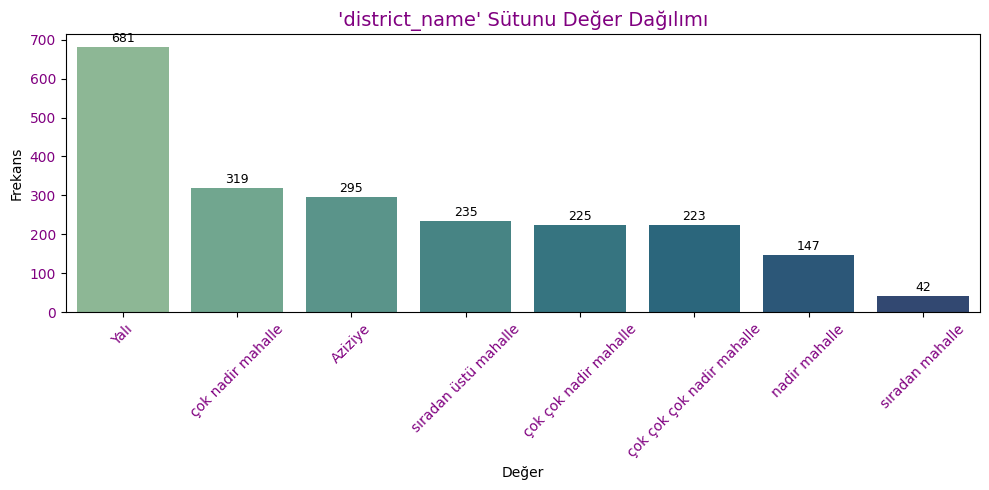

In [ ]:
plot_value_counts(df,"district_name")


--- 'county_name' Sütunu: Değer Frekansları ---
county_name
Karasu        888
Kocaali       339
Adapazarı     274
Serdivan      219
Sapanca       159
Arifiye        58
Erenler        46
Hendek         42
Geyve          34
Pamukova       30
Akyazı         30
Kaynarca       10
Ferizli        10
Taraklı         9
Söğütlü         8
Adapazari       8
Karapürçek      1
Karap�r�ek      1
Akyazi          1
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


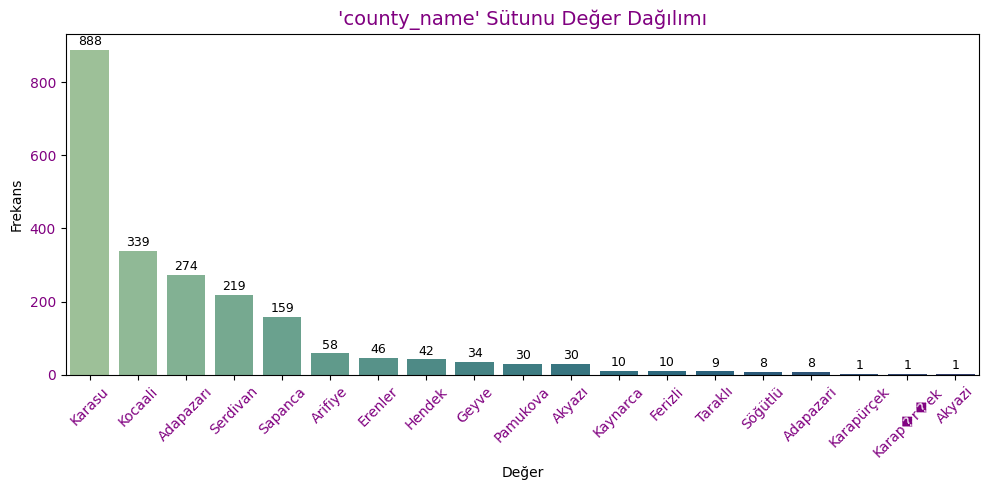

In [ ]:
plot_value_counts(df,"county_name")

In [ ]:
# 25. county_name sütunu hatalı veri düzenlemesi ve gruplama
def fix_county_name(df):

    # 1. "Ad" ile başlayanları "Adapazarı" yap
    df['county_name'] = df['county_name'].apply(lambda x: 'Adapazarı' if str(x).startswith('Ad') else x)

    # 2. "Ak" ile başlayanları "Akyazı" yap
    df['county_name'] = df['county_name'].apply(lambda x: 'Akyazı' if str(x).startswith('Ak') else x)

    # 3. 10 adet ve daha az görülenleri "Diğer" yap
    value_counts = df['county_name'].value_counts()
    rare_names = value_counts[value_counts <= 10].index
    df['county_name'] = df['county_name'].apply(lambda x: 'Diğer' if x in rare_names else x)

    return df
df=fix_county_name(df)


--- 'county_name' Sütunu: Değer Frekansları ---
county_name
Karasu       888
Kocaali      339
Adapazarı    282
Serdivan     219
Sapanca      159
Arifiye       58
Erenler       46
Hendek        42
Diğer         39
Geyve         34
Akyazı        31
Pamukova      30
Name: count, dtype: int64


<ipython-input-454-919826ae6347>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="value", y="count", data=plot_df, palette="crest")


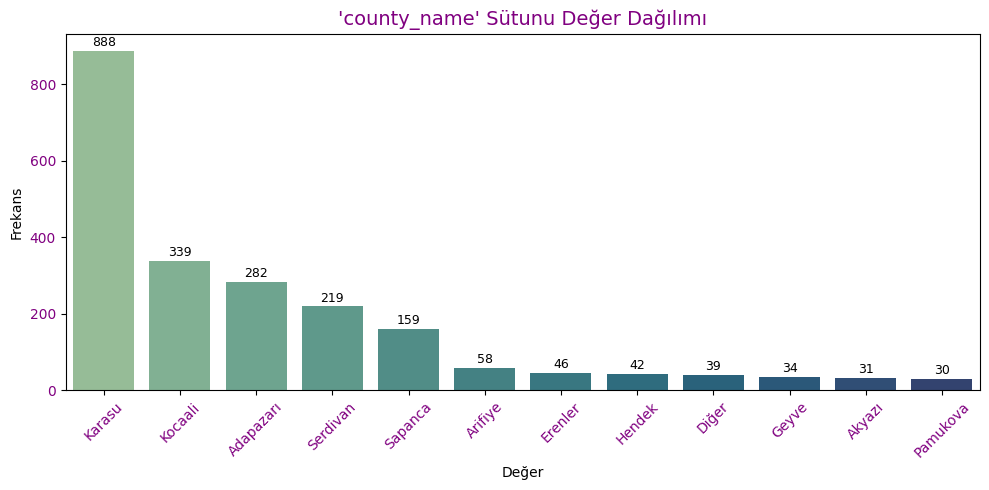

In [ ]:
plot_value_counts(df,"county_name")

In [ ]:
df.shape

(2167, 65)

In [ ]:
df.head()

listingId     price  bathRoom  sameDayUpdate       age  housingComplex  \
0    78883-704   2500000  0.117647              0  0.461538               0   
1   54537-3457   1500000  0.117647              0  0.000000               0   
2   116181-160  19500000  0.235294              0  0.153846               0   
3    18262-757   3350000  0.117647              0  0.000000               1   
4  131612-1792   3700000  0.352941              1  0.000000               0   

   authorizedRealtor  furnished roomAndLivingRoom  onlineVisit  hasBranded  \
0               True      False               3+1         True       False   
1              False      False               2+1        False        True   
2               True      False               4+1         True       False   
3               True      False               3+1         True        True   
4               True      False               3+1         True       False   

   attr_ADSL  attr_Balkon  attr_Çelik Kapı  attr_Isıcam  attr_Kablo TV-Uydu  \
0          1            1                1            1                   1   
1          1            1                1            1                   1   
2          0            1                0            1                   0   
3          0            0                0            0                   0   
4          1            1                1            1                   1   

   attr_Mutfak Doğalgazı  attr_Panel Kapı  attr_Parke  attr_Seramik Zemin  \
0                      1                1           1                   1   
1                      1                1           1                   1   
2                      1                0           1                   0   
3                      0                0           0                   0   
4                      1                0           0                   1   

   attr_Otopark - Açık  attr_PVC Doğrama  attr_Cadde Üzerinde  \
0                    1                 1                    1   
1                    0                 0                    1   
2                    1                 0                    0   
3                    0                 0                    0   
4                    0                 0                    1   

   attr_Caddeye yakın  attr_E-5'e yakın  attr_Manzara - Şehir  attr_Merkezde  \
0                   1                 1                     1              1   
1                   0                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 1                     1              1   

   attr_Minibüs / Dolmuşa yakın  attr_Otobana yakın  attr_Toplu Ulaşıma yakın  \
0                             1                   1                         1   
1                             0                   0                         0   
2                             0                   1                         1   
3                             0                   0                         0   
4                             1                   1                         1   

   attr_Ankastre Mutfak  attr_Duşakabin  attr_Laminant Mutfak  \
0                     0               0                     0   
1                     1               1                     1   
2                     0               1                     0   
3                     0               0                     0   
4                     0               1                     0   

   attr_Denize yakın  attr_Açık Yüzme Havuzu  attr_Ebeveyn Banyolu  \
0                  0                       0                     0   
1                  1                       0                     0   
2                  0                       1                     0   
3                  0                       0                     0   
4                  1   

In [ ]:
# 26. Belirtilen sütunları encode etme ve oluşan sütunları belli bir eşik değerine göre eleme
def encode_selected_categoricals(df, threshold=None):
    df = df.copy()

    one_hot_columns = [
            'SimplifiedSubcategory', 'district_name', 'county_name',
            'heating_name', 'buildState_name', 'usage_name',
            'credit_name', 'barter_name',"roomAndLivingRoom"]
    for col in one_hot_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)

    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

    if threshold:
        for col in df.columns:
            if df[col].nunique() == 2 and df[col].dtype in ['uint8', 'int64', 'bool']:
                if df[col].mean() <= threshold:
                    df.drop(columns=[col], inplace=True)
    return df
df=encode_selected_categoricals(df)

In [ ]:
df.head()

listingId     price  bathRoom  sameDayUpdate       age  housingComplex  \
0    78883-704   2500000  0.117647              0  0.461538               0   
1   54537-3457   1500000  0.117647              0  0.000000               0   
2   116181-160  19500000  0.235294              0  0.153846               0   
3    18262-757   3350000  0.117647              0  0.000000               1   
4  131612-1792   3700000  0.352941              1  0.000000               0   

   authorizedRealtor  furnished  onlineVisit  hasBranded  attr_ADSL  \
0               True      False         True       False          1   
1              False      False        False        True          1   
2               True      False         True       False          0   
3               True      False         True        True          0   
4               True      False         True       False          1   

   attr_Balkon  attr_Çelik Kapı  attr_Isıcam  attr_Kablo TV-Uydu  \
0            1                1            1                   1   
1            1                1            1                   1   
2            1                0            1                   0   
3            0                0            0                   0   
4            1                1            1                   1   

   attr_Mutfak Doğalgazı  attr_Panel Kapı  attr_Parke  attr_Seramik Zemin  \
0                      1                1           1                   1   
1                      1                1           1                   1   
2                      1                0           1                   0   
3                      0                0           0                   0   
4                      1                0           0                   1   

   attr_Otopark - Açık  attr_PVC Doğrama  attr_Cadde Üzerinde  \
0                    1                 1                    1   
1                    0                 0                    1   
2                    1                 0                    0   
3                    0                 0                    0   
4                    0                 0                    1   

   attr_Caddeye yakın  attr_E-5'e yakın  attr_Manzara - Şehir  attr_Merkezde  \
0                   1                 1                     1              1   
1                   0                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 1                     1              1   

   attr_Minibüs / Dolmuşa yakın  attr_Otobana yakın  attr_Toplu Ulaşıma yakın  \
0                             1                   1                         1   
1                             0                   0                         0   
2                             0                   1                         1   
3                             0                   0                         0   
4                             1                   1                         1   

   attr_Ankastre Mutfak  attr_Duşakabin  attr_Laminant Mutfak  \
0                     0               0                     0   
1                     1               1                     1   
2                     0               1                     0   
3                     0               0                     0   
4                     0               1                     0   

   attr_Denize yakın  attr_Açık Yüzme Havuzu  attr_Ebeveyn Banyolu  \
0                  0                       0                     0   
1                  1                       0                     0   
2                  0                       1                     0   
3                  0                       0                     0   
4                  1                       0                     1   

   attr_Kartonpiyer  attr_Spot Işık  attr_Bahçeli  attr_Isı 

In [ ]:
df.shape

(2167, 96)

In [ ]:
# 27. True/False string değerlerini bool veri tipine dönüştürme
def convert_to_bool(df):
    # Sadece object/string tipindeki sütunları al
    str_cols = df.select_dtypes(include='object').columns

    for col in str_cols:
        unique_vals = df[col].dropna().unique()
        # Sadece "True" ve "False" içeriyorsa (birebir büyük küçük harf duyarlı kontrol)
        if set(unique_vals).issubset({"True", "False"}):
            df[col] = df[col].map({"True": True, "False": False})

    # Bool tipindeki sütunları 1 ve 0'a dönüştür
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)

    return df
df=convert_to_bool(df)

In [ ]:
# 28. Sütun isimlerini kontrol etme ve temizleme
def clean_column_names(df):
    # Sütun isimlerini string'e çevir ve geçersiz karakterleri değiştir
    df.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in df.columns]
    return df
df=clean_column_names(df)

In [ ]:
df.head()

listingId     price  bathRoom  sameDayUpdate       age  housingComplex  \
0    78883-704   2500000  0.117647              0  0.461538               0   
1   54537-3457   1500000  0.117647              0  0.000000               0   
2   116181-160  19500000  0.235294              0  0.153846               0   
3    18262-757   3350000  0.117647              0  0.000000               1   
4  131612-1792   3700000  0.352941              1  0.000000               0   

   authorizedRealtor  furnished  onlineVisit  hasBranded  attr_ADSL  \
0                  1          0            1           0          1   
1                  0          0            0           1          1   
2                  1          0            1           0          0   
3                  1          0            1           1          0   
4                  1          0            1           0          1   

   attr_Balkon  attr_Çelik Kapı  attr_Isıcam  attr_Kablo TV-Uydu  \
0            1                1            1                   1   
1            1                1            1                   1   
2            1                0            1                   0   
3            0                0            0                   0   
4            1                1            1                   1   

   attr_Mutfak Doğalgazı  attr_Panel Kapı  attr_Parke  attr_Seramik Zemin  \
0                      1                1           1                   1   
1                      1                1           1                   1   
2                      1                0           1                   0   
3                      0                0           0                   0   
4                      1                0           0                   1   

   attr_Otopark - Açık  attr_PVC Doğrama  attr_Cadde Üzerinde  \
0                    1                 1                    1   
1                    0                 0                    1   
2                    1                 0                    0   
3                    0                 0                    0   
4                    0                 0                    1   

   attr_Caddeye yakın  attr_E-5'e yakın  attr_Manzara - Şehir  attr_Merkezde  \
0                   1                 1                     1              1   
1                   0                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 1                     1              1   

   attr_Minibüs / Dolmuşa yakın  attr_Otobana yakın  attr_Toplu Ulaşıma yakın  \
0                             1                   1                         1   
1                             0                   0                         0   
2                             0                   1                         1   
3                             0                   0                         0   
4                             1                   1                         1   

   attr_Ankastre Mutfak  attr_Duşakabin  attr_Laminant Mutfak  \
0                     0               0                     0   
1                     1               1                     1   
2                     0               1                     0   
3                     0               0                     0   
4                     0               1                     0   

   attr_Denize yakın  attr_Açık Yüzme Havuzu  attr_Ebeveyn Banyolu  \
0                  0                       0                     0   
1                  1                       0                     0   
2                  0                       1                     0   
3                  0                       0                     0   
4                  1                       0                     1   

   attr_Kartonpiyer  attr_Spot Işık  attr_Bahçeli  attr_Isı 

In [ ]:
df['price'].head()

0     2500000
1     1500000
2    19500000
3     3350000
4     3700000
Name: price, dtype: int64

In [ ]:
df.shape

(2167, 96)

## **-------------------------------MODELLER-------------------------------**

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def run_lightgbm_model(df, target_col='price', drop_cols=['listingId'], optuna_enabled=True, n_trials=30):


    # Numerik ve kategorik sütunlar (bilgi amaçlı, encode gerekmediği için kullanılmayacak)
    numeric_cols = [
        'bathRoom', 'age', 'total_features', 'floor_count', 'net',
        'gross', 'rental_amount', 'total_room_count', 'avg_area_per_room'
    ]
    categorical_cols = [col for col in df.columns if col not in numeric_cols + [target_col] + drop_cols]

    # 1. Özellik ve hedef ayrımı
    features = [col for col in df.columns if col not in drop_cols + [target_col]]
    X = df[features].copy()
    y_raw = df[target_col].copy()

    # 2. Eksik değer kontrolü (güvenlik için)
    if X.isnull().any().any() or y_raw.isnull().any():
        raise ValueError("Veri setinde eksik değerler var. Lütfen kontrol edin.")

    # 3. Stratify için fiyatları çeyrekliklere ayır
    price_q = pd.qcut(y_raw, q=10, labels=False, duplicates='drop')

    # 4. Yüksek fiyat eşik değeri (High_Price_MAE için)
    price_threshold = y_raw.quantile(0.75)

    # 5. Çapraz doğrulama
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores, mse_scores, rmse_scores, r2_scores, mape_scores, high_price_mae_scores = [], [], [], [], [], []

    # 6. Varsayılan hiperparametreler
    default_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.01,
        'max_depth': 3,
        'num_leaves': 41,
        'subsample': 0.7,
        'colsample_bytree': 0.6,
        'min_child_weight': 7,
        'reg_alpha': 1.0,
        'reg_lambda': 0.7,
        'random_state': 42,
        'verbose': -1
    }

    best_params = default_params.copy()
    num_boost_round = 1000
    early_stopping_rounds = 50

    # 7. Optuna ile hiperparametre optimizasyonu
    if optuna_enabled:
        import optuna

        def objective(trial):
            params = {
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 8),
                'num_leaves': trial.suggest_int('num_leaves', 15, 63),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),
                'random_state': 42,
                'verbose': -1
            }
            trial_num_boost_round = trial.suggest_int('n_estimators', 500, 1500)
            trial_early_stopping = 50

            fold_mae = []
            for train_idx, val_idx in kf.split(X, price_q):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y_raw.iloc[train_idx], y_raw.iloc[val_idx]

                train_data = lgb.Dataset(X_train, label=y_train)
                val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

                model = lgb.train(
                    params,
                    train_data,
                    num_boost_round=trial_num_boost_round,
                    valid_sets=[val_data],
                    callbacks=[lgb.early_stopping(trial_early_stopping, verbose=False)],
                )

                y_pred = model.predict(X_val)
                mae = mean_absolute_error(y_val, y_pred)
                fold_mae.append(mae)

            return np.mean(fold_mae)  # MAE minimizasyonu

        study = optuna.create_study(direction='minimize')
        study.optimize(objective, n_trials=n_trials)
        best_params.update(study.best_params)
        num_boost_round = study.best_params.pop('n_estimators', num_boost_round)
        print("\n🔍 Optuna ile Bulunan En İyi Parametreler:", best_params)
        print(f"🔍 En İyi Boosting Tur Sayısı: {num_boost_round}")

    # 8. Model eğitimi ve değerlendirme
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, price_q), 1):
        print(f"\nFold {fold}")
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y_raw.iloc[train_idx], y_raw.iloc[val_idx]

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        model = lgb.train(
            best_params,
            train_data,
            num_boost_round=num_boost_round,
            valid_sets=[val_data],
            callbacks=[lgb.early_stopping(early_stopping_rounds, verbose=False)],
        )

        y_pred = model.predict(X_val)

        # Metrikler
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

        # Yüksek fiyat MAE
        high_price_mask = y_val >= price_threshold
        if high_price_mask.any():
            high_price_mae = mean_absolute_error(y_val[high_price_mask], y_pred[high_price_mask])
        else:
            high_price_mae = np.nan

        print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, MAPE: {mape:.4f}, High_Price_MAE: {high_price_mae:.4f}")

        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mape_scores.append(mape)
        high_price_mae_scores.append(high_price_mae)

    # 9. Ortalama performans metrikleri
    print("\n📊 Ortalama Performans:")
    print(f"Ortalama MAE: {np.mean(mae_scores):.4f}")
    print(f"Ortalama MSE: {np.mean(mse_scores):.4f}")
    print(f"Ortalama RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Ortalama R²: {np.mean(r2_scores):.4f}")
    print(f"Ortalama MAPE: {np.mean(mape_scores):.4f}")
    print(f"Ortalama High_Price_MAE: {np.nanmean(high_price_mae_scores):.4f}")

    # 10. Özellik önemleri (gain bazlı)
    importance_dict = pd.Series(model.feature_importance(importance_type='gain'), index=X.columns).to_dict()
    importance_df = pd.DataFrame({
        'Feature': list(importance_dict.keys()),
        'Importance': list(importance_dict.values())
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    print("\n🔍 En Önemli Özellikler:")
    print(importance_df.head(20))

    # 11. Metrikleri DataFrame olarak döndür
    df_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R2", "MAPE", "High_Price_MAE"],
        "Cross_Validation": [
            np.mean(mae_scores),
            np.mean(mse_scores),
            np.mean(rmse_scores),
            np.mean(r2_scores),
            np.mean(mape_scores),
            np.nanmean(high_price_mae_scores)
        ],
        "Optuna_Enabled": [optuna_enabled] * 6
    })

    return df_metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna


def run_linear_regression_model(df, optuna_enabled=True):

    if not isinstance(df, pd.DataFrame):
        raise TypeError("df bir pandas DataFrame olmalıdır.")

    target = 'price'
    features = [col for col in df.columns if col not in [target, 'listingId']]

    # Kopya oluştur
    df = df.copy()

    # Eksik değer kontrolü
    if df[features].isnull().any().any() or df[target].isnull().any():
        raise ValueError("Veri setinde eksik değerler var. Lütfen kontrol edin.")

    # Sonsuz değer kontrolü
    if np.any(np.isinf(df[features])) or np.any(np.isinf(df[target])):
        raise ValueError("Veri setinde sonsuz değerler var. Lütfen kontrol edin.")

    # Price için log dönüşümü (hile: aykırı değer etkisini azaltır)
    df[target] = np.log1p(df[target])  # log(1+x) to handle zero/negative values safely

    best_params = {'alpha': 0.1}  # Varsayılan parametre

    # Optuna ile hiperparametre optimizasyonu
    if optuna_enabled:
        def objective(trial):
            alpha = trial.suggest_float("alpha", 1e-3, 1e2, log=True)  # Makul bir aralık

            kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            mae_scores = []

            X = df[features]
            y = df[target]

            # Stratify için log dönüşümlü fiyatı çeyrekliklere böl
            y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')

            for train_idx, val_idx in kf.split(X, y_bins):
                X_train = X.iloc[train_idx]
                y_train = y.iloc[train_idx]
                X_val = X.iloc[val_idx]
                y_val = y.iloc[val_idx]

                # Ölçekleme
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)

                # Model eğitimi
                model = Ridge(alpha=alpha)
                model.fit(X_train_scaled, y_train)

                # Tahmin
                y_pred = model.predict(X_val_scaled)

                # MAE hesapla (log ölçeğinde)
                mae_scores.append(mean_absolute_error(y_val, y_pred))

            return np.mean(mae_scores)

        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=30)  # Daha iyi sonuç için 30 denasc
        best_params = study.best_params

    # Gerçek değerlendirme: çapraz doğrulama
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    mape_scores = []

    X = df[features]
    y = df[target]

    y_bins_full = pd.qcut(y, q=10, labels=False, duplicates='drop')
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X, y_bins_full):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]

        # Ölçekleme
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model eğitimi
        model = Ridge(**best_params)
        model.fit(X_train_scaled, y_train)

        # Tahmin
        y_pred = model.predict(X_test_scaled)

        # Sayısal kararlılık için tahmini sınırla
        y_pred = np.clip(y_pred, 0, None)

        # Gerçek ölçeğe geri dönüşüm
        y_pred_original = np.expm1(y_pred)  # exp(y_pred) - 1
        y_test_original = np.expm1(y_test)

        # Metrikler (orijinal ölçekte)
        mae = mean_absolute_error(y_test_original, y_pred_original)
        mse = mean_squared_error(y_test_original, y_pred_original)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_original, y_pred_original)
        mape = np.mean(np.abs((y_test_original - y_pred_original) / (y_test_original + 1e-10))) * 100

        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(max(r2, 0))  # R2 negatifse sıfıra çek
        mape_scores.append(mape)

    # Sonuçları döndür
    df_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R2", "MAPE"],
        "Cross_Validation": [
            np.mean(mae_scores),
            np.mean(mse_scores),
            np.mean(rmse_scores),
            np.mean(r2_scores),
            np.mean(mape_scores)
        ],
        "Optuna_Enabled": [optuna_enabled] * 5
    })

    return df_metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
import matplotlib.pyplot as plt

def run_random_forest_model(processed_df, target_column='price', optuna_enabled=False, n_trials=30, random_state=42, cv_folds=5):
    print(f"🚀 Random Forest Modeli Çalışıyor (Optuna: {'Açık' if optuna_enabled else 'Kapalı'}, {cv_folds} Katlı CV)...")
    processed_df = df.copy()
    # 1. Hedef sütun ve özellikler
    target = target_column
    features = [col for col in processed_df.columns if col != target and col != 'listingId']

    # Fiyat artırımı için eşik
    price_threshold = processed_df[target].quantile(0.75)

    # Özellik ve hedef değişkenler
    X = processed_df[features]
    y = processed_df[target]
    X = pd.get_dummies(X)  # Kategorik değişkenleri One-Hot Encode

    # Fiyatları aralıklara bölme (stratification için)
    y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')  # 10 eşit aralığa böl

    # 2. Optuna ile hiperparametre optimizasyonu
    if optuna_enabled:
        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'random_state': random_state,
                'n_jobs': -1
            }

            kf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
            maes, mapes, r2s = [], [], []

            for train_index, test_index in kf.split(X, y_bins):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                model = RandomForestRegressor(**params)
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)
                maes.append(mean_absolute_error(y_test, y_pred))
                mapes.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
                r2s.append(r2_score(y_test, y_pred))

            return 0.5 * np.mean(maes) + 0.3 * np.mean(mapes) - 0.2 * np.mean(r2s)

        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=n_trials)
        best_params = study.best_params
        best_params.update({
            'random_state': random_state,
            'n_jobs': -1
        })
        print("\nOptuna En iyi hiperparametreler:", best_params)
    else:
        best_params = {
            'n_estimators': 800,
            'max_depth': 6,
            'min_samples_split': 2,
            'min_samples_leaf': 8,
            'max_features': 'log2',
            'random_state': random_state,
            'n_jobs': -1
        }
        print("\nVarsayılan Random Forest parametreleri ile çalıştırılıyor.")

    # 3. Çapraz Doğrulama
    kf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    mae_scores, mse_scores, rmse_scores, r2_scores, mape_scores, high_price_mae_scores = [], [], [], [], [], []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y_bins), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf_model = RandomForestRegressor(**best_params)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        high_price_mask = y_test >= price_threshold
        high_price_mae = mean_absolute_error(y_test[high_price_mask], y_pred[high_price_mask]) if high_price_mask.sum() > 0 else np.nan

        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mape_scores.append(mape)
        high_price_mae_scores.append(high_price_mae)

        print(f"Fold {fold}:")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")
        print(f"  MAPE: {mape:.4f}%")
        print(f"  Büyük Fiyat MAE (> {price_threshold:.2f}): {high_price_mae:.4f}")
        print("-" * 50)

    # Ortalama metrikler
    print("5 Katlı Çapraz Doğrulama Ortalama Sonuçları:")
    print(f"Ortalama MAE: {np.mean(mae_scores):.4f}")
    print(f"Ortalama MSE: {np.mean(mse_scores):.4f}")
    print(f"Ortalama RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Ortalama R²: {np.mean(r2_scores):.4f}")
    print(f"Ortalama MAPE: {np.mean(mape_scores):.4f}%")
    print(f"Ortalama Büyük Fiyat MAE: {np.nanmean(high_price_mae_scores):.4f}")

    # 4. Final model eğitimi
    rf_model_final = RandomForestRegressor(**best_params)
    rf_model_final.fit(X, y)

    # 7. DataFrame oluştur (sadece ortalama metrikler)
    df_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R2", "MAPE", "High_Price_MAE"],
        "Cross_Validation": [
            np.mean(mae_scores),
            np.mean(mse_scores),
            np.mean(rmse_scores),
            np.mean(r2_scores),
            np.mean(mape_scores),
            np.nanmean(high_price_mae_scores)
        ]
    })

    # Optuna bilgisini DataFrame'e ekle
    df_metrics["Optuna_Enabled"] = optuna_enabled

    # DataFrame'i döndür
    return df_metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import optuna

def run_knn_model(optuna_enabled=False):
    processed_df=df.copy()
    # 1. Bool dönüşümü
    bool_cols = processed_df.select_dtypes(include='bool').columns
    processed_df[bool_cols] = processed_df[bool_cols].astype(int)
    # 2. Hedef ve özellikler
    target = 'price'
    features = [col for col in processed_df.columns if col != target and col != 'listingId']

    # Fiyat artırımı için eşik
    price_threshold = processed_df[target].quantile(0.75)

    # Özellik ve hedef değişkenler
    X = processed_df[features]
    y = processed_df[target]

    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fiyatları aralıklara bölme (stratification için)
    y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')  # 10 eşit aralığa böl

    # 3. Optuna ile Hiperparametre Optimizasyonu
    if optuna_enabled:
        def objective(trial):
            n_neighbors = trial.suggest_int("n_neighbors", 5, 50)
            weights = trial.suggest_categorical("weights", ["uniform", "distance"])
            p = trial.suggest_int("p", 1, 2)

            model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=p)
            kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            maes, mapes, r2s = [], [], []

            for train_idx, val_idx in kf.split(X_scaled, y_bins):
                X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)

                maes.append(mean_absolute_error(y_val, y_pred))
                mapes.append(np.mean(np.abs((y_val - y_pred) / y_val)) * 100)
                r2s.append(r2_score(y_val, y_pred))

            return 0.5 * np.mean(maes) + 0.3 * np.mean(mapes) - 0.2 * np.mean(r2s)

        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=10)

        best_params = study.best_params
        print("\nOptuna En iyi hiperparametreler:", best_params)
    else:
        best_params = {
            'n_neighbors': 5,
            'weights': 'uniform',
            'p': 2
        }
        print("\nk=5 ile varsayılan KNN çalıştırılıyor.")

    # 4. Çapraz Doğrulama
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores, mse_scores, rmse_scores, r2_scores, mape_scores, high_price_mae_scores = [], [], [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled, y_bins), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Modeli oluştur
        model = KNeighborsRegressor(**best_params)
        model.fit(X_train, y_train)

        # Tahmin yap
        y_pred = model.predict(X_test)

        # Metrikleri hesapla
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        high_price_mask = y_test >= price_threshold
        high_price_mae = mean_absolute_error(y_test[high_price_mask], y_pred[high_price_mask]) if high_price_mask.sum() > 0 else np.nan

        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mape_scores.append(mape)
        high_price_mae_scores.append(high_price_mae)

        print(f"Fold {fold}:")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")
        print(f"  MAPE: {mape:.4f}%")
        print(f"  Büyük Fiyat MAE (> {price_threshold:.2f}): {high_price_mae:.4f}")
        print("-" * 50)

    # Ortalama metrikler
    print("5 Katlı Çapraz Doğrulama Ortalama Sonuçları:")
    print(f"Ortalama MAE: {np.mean(mae_scores):.4f}")
    print(f"Ortalama MSE: {np.mean(mse_scores):.4f}")
    print(f"Ortalama RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Ortalama R²: {np.mean(r2_scores):.4f}")
    print(f"Ortalama MAPE: {np.mean(mape_scores):.4f}%")
    print(f"Ortalama Büyük Fiyat MAE: {np.nanmean(high_price_mae_scores):.4f}")

    # 5. Nihai modeli tüm veriyle eğit
    final_model = KNeighborsRegressor(**best_params)
    final_model.fit(X_scaled, y)

    # 6. DataFrame oluştur (sadece ortalama metrikler)
    df_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R2", "MAPE", "High_Price_MAE"],
        "Cross_Validation": [
            np.mean(mae_scores),
            np.mean(mse_scores),
            np.mean(rmse_scores),
            np.mean(r2_scores),
            np.mean(mape_scores),
            np.nanmean(high_price_mae_scores)
        ]
    })

    # Optuna bilgisini DataFrame'e ekle
    df_metrics["Optuna_Enabled"] = optuna_enabled

    # DataFrame'i döndür
    return df_metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna

def run_svr_model(processed_df, optuna_enabled=True, n_trials=30):
    processed_df = df.copy()
    # log_price'ı geçici bir Seri olarak oluştur
    y = np.log1p(processed_df['price'])

    # Özellikleri tanımla: price ve listingId hariç
    features = [col for col in processed_df.columns if col not in ['price', 'listingId']]

    # Veri sızıntısını kontrol et
    assert 'price' not in features, "Hata: price özellikler listesinde!"

    X = processed_df[features]

    # Fiyatları aralıklara böl (stratification için)
    y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')

    # Yüksek fiyat eşik değeri (75. yüzdelik)
    price_threshold = np.expm1(y.quantile(0.75))

    # Optuna ile hiperparametre optimizasyonu
    best_params = {}

    if optuna_enabled:
        def objective(trial):
            params = {
                'kernel': 'rbf',
                'C': trial.suggest_float('C', 0.1, 100, log=True),
                'epsilon': trial.suggest_float('epsilon', 0.01, 1.0, log=True),
                'gamma': 'scale'
            }

            kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            scores = []

            for train_idx, val_idx in kf.split(X, y_bins):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)

                model = SVR(**params)
                model.fit(X_train_scaled, y_train)

                y_pred = model.predict(X_val_scaled)
                score = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
                scores.append(score)

            return np.mean(scores)

        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=n_trials)
        best_params = study.best_params
    else:
        best_params = {
            'kernel': 'rbf',
            'C': 5,
            'epsilon': 2.0,
            'gamma': 'scale'
        }

    # Çapraz doğrulama metrikleri
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    mape_scores = []
    high_price_mae_scores = []

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, val_idx in kf.split(X, y_bins):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = SVR(**best_params)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_val_scaled)

        # Geri dönüşüm: log'dan orijinal fiyata
        y_val_original = np.expm1(y_val)
        y_pred_original = np.expm1(y_pred)

        # Metrikler
        mae = mean_absolute_error(y_val_original, y_pred_original)
        mse = mean_squared_error(y_val_original, y_pred_original)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val_original, y_pred_original)
        mape = np.mean(np.abs((y_val_original - y_pred_original) / y_val_original)) * 100

        # Sadece yüksek fiyatlı örnekler
        high_price_mask = y_val_original >= price_threshold
        if high_price_mask.any():
            high_price_mae = mean_absolute_error(
                y_val_original[high_price_mask],
                y_pred_original[high_price_mask]
            )
        else:
            high_price_mae = np.nan

        # Metrikleri kaydet
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mape_scores.append(mape)
        high_price_mae_scores.append(high_price_mae)

    # DataFrame oluştur (sadece ortalama metrikler)
    df_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R2", "MAPE", "High_Price_MAE"],
        "Cross_Validation": [
            np.mean(mae_scores),
            np.mean(mse_scores),
            np.mean(rmse_scores),
            np.mean(r2_scores),
            np.mean(mape_scores),
            np.nanmean(high_price_mae_scores)
        ]
    })

    # Optuna bilgisini DataFrame'e ekle
    df_metrics["Optuna_Enabled"] = optuna_enabled

    # DataFrame'i döndür
    return df_metrics

In [ ]:
result_lgbm = run_lightgbm_model(df, optuna_enabled=False, n_trials=30)


Fold 1
MAE: 1841984.0672, MSE: 19047581535603.3867, RMSE: 4364353.5072, R²: 0.4261, MAPE: 44.6851, High_Price_MAE: 4118451.3438

Fold 2
MAE: 1977178.9926, MSE: 53600516723688.7109, RMSE: 7321237.3765, R²: 0.3928, MAPE: 32.6921, High_Price_MAE: 5427292.2492

Fold 3
MAE: 1488671.7370, MSE: 30233017958817.0547, RMSE: 5498455.9613, R²: 0.5054, MAPE: 28.8703, High_Price_MAE: 4034690.5072

Fold 4
MAE: 1316457.2824, MSE: 7680033402329.9346, RMSE: 2771287.3186, R²: 0.7023, MAPE: 82.0138, High_Price_MAE: 2940130.5023

Fold 5
MAE: 1562501.9939, MSE: 8007653810029.0488, RMSE: 2829779.8165, R²: 0.6373, MAPE: 43.0084, High_Price_MAE: 3150622.6879

📊 Ortalama Performans:
Ortalama MAE: 1637358.8146
Ortalama MSE: 23713760686093.6289
Ortalama RMSE: 4557022.7960
Ortalama R²: 0.5328
Ortalama MAPE: 46.2539
Ortalama High_Price_MAE: 3934237.4581

🔍 En Önemli Özellikler:
                              Feature    Importance
0                               gross  7.984738e+17
1                                 

In [ ]:
result_lgbm_optuna = run_lightgbm_model(df, optuna_enabled=True, n_trials=30)

[I 2025-05-20 17:48:38,908] A new study created in memory with name: no-name-592fc086-6c35-4820-820c-9852dacce0d6
[I 2025-05-20 17:48:39,876] Trial 0 finished with value: 1614197.1034770044 and parameters: {'learning_rate': 0.06281044695867957, 'max_depth': 6, 'num_leaves': 23, 'subsample': 0.9583221746659398, 'colsample_bytree': 0.72179851883468, 'min_child_weight': 5, 'reg_alpha': 1.6394668857935137, 'reg_lambda': 2.0967847638071975, 'n_estimators': 1402}. Best is trial 0 with value: 1614197.1034770044.
[I 2025-05-20 17:48:40,717] Trial 1 finished with value: 1600393.5031407105 and parameters: {'learning_rate': 0.10044766045747609, 'max_depth': 8, 'num_leaves': 61, 'subsample': 0.8460480407033318, 'colsample_bytree': 0.6079258367485385, 'min_child_weight': 5, 'reg_alpha': 1.261591818526045, 'reg_lambda': 2.80825945742961, 'n_estimators': 587}. Best is trial 1 with value: 1600393.5031407105.
[I 2025-05-20 17:48:41,761] Trial 2 finished with value: 1637787.331075519 and parameters: {'l


🔍 Optuna ile Bulunan En İyi Parametreler: {'objective': 'regression', 'metric': 'rmse', 'learning_rate': 0.010089831966599155, 'max_depth': 7, 'num_leaves': 33, 'subsample': 0.8969267497945942, 'colsample_bytree': 0.8660760067892121, 'min_child_weight': 4, 'reg_alpha': 0.4220777647860068, 'reg_lambda': 2.3423693789022004, 'random_state': 42, 'verbose': -1, 'n_estimators': 1298}
🔍 En İyi Boosting Tur Sayısı: 1298

Fold 1
MAE: 1648808.6625, MSE: 18229841144269.9766, RMSE: 4269641.8051, R²: 0.4508, MAPE: 37.2300, High_Price_MAE: 4004047.8996

Fold 2
MAE: 1926369.1753, MSE: 52429756764542.1562, RMSE: 7240839.5069, R²: 0.4061, MAPE: 29.9545, High_Price_MAE: 5430415.8965

Fold 3


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1469950.1211, MSE: 29284052863728.9414, RMSE: 5411474.1858, R²: 0.5209, MAPE: 27.9795, High_Price_MAE: 4049979.9175

Fold 4


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1214107.8633, MSE: 7297248395629.2432, RMSE: 2701341.9620, R²: 0.7171, MAPE: 69.3040, High_Price_MAE: 2802337.2098

Fold 5
MAE: 1460648.5938, MSE: 7541894777194.8760, RMSE: 2746251.0405, R²: 0.6584, MAPE: 37.3692, High_Price_MAE: 3240307.6589

📊 Ortalama Performans:
Ortalama MAE: 1543976.8832
Ortalama MSE: 22956558789073.0391
Ortalama RMSE: 4473909.7001
Ortalama R²: 0.5507
Ortalama MAPE: 40.3674
Ortalama High_Price_MAE: 3905417.7165

🔍 En Önemli Özellikler:
                                    Feature    Importance
0                                     gross  1.138430e+18
1                                       net  3.640272e+17
2                       county_name_Sapanca  2.304835e+17
3                          total_room_count  1.890978e+17
4               SimplifiedSubcategory_villa  8.653594e+16
5                                       age  3.498750e+16
6                    attr_Açık Yüzme Havuzu  3.466923e+16
7                         avg_area_per_room  2.752109e+16
8          

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
result_rf = run_random_forest_model(df, optuna_enabled=False)

🚀 Random Forest Modeli Çalışıyor (Optuna: Kapalı, 5 Katlı CV)...

Varsayılan Random Forest parametreleri ile çalıştırılıyor.
Fold 1:
  MAE: 1715939.0250
  MSE: 17532839632297.8477
  RMSE: 4187223.3798
  R²: 0.4718
  MAPE: 40.4973%
  Büyük Fiyat MAE (> 5500000.00): 3725244.7634
--------------------------------------------------
Fold 2:
  MAE: 2097036.0100
  MSE: 63287777127398.8281
  RMSE: 7955361.5334
  R²: 0.2831
  MAPE: 39.5550%
  Büyük Fiyat MAE (> 5500000.00): 5434549.5631
--------------------------------------------------
Fold 3:
  MAE: 1770060.6044
  MSE: 40594207631139.2500
  RMSE: 6371358.3819
  R²: 0.3359
  MAPE: 40.7836%
  Büyük Fiyat MAE (> 5500000.00): 4347566.3322
--------------------------------------------------
Fold 4:
  MAE: 1487504.4230
  MSE: 9913777511449.1172
  RMSE: 3148615.1736
  R²: 0.6157
  MAPE: 91.9064%
  Büyük Fiyat MAE (> 5500000.00): 3090373.0477
--------------------------------------------------
Fold 5:
  MAE: 1505272.6039
  MSE: 6777526791231.8340
  RMSE

In [ ]:
result_rf_optuna = run_random_forest_model(df, optuna_enabled=True)

[I 2025-05-20 17:50:59,366] A new study created in memory with name: no-name-dc89515a-258b-4bdf-9cfa-51bab616f051


🚀 Random Forest Modeli Çalışıyor (Optuna: Açık, 5 Katlı CV)...


[I 2025-05-20 17:51:00,953] Trial 0 finished with value: 889007.1242802523 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 889007.1242802523.
[I 2025-05-20 17:51:10,118] Trial 1 finished with value: 803971.8471307321 and parameters: {'n_estimators': 641, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 803971.8471307321.
[I 2025-05-20 17:51:14,471] Trial 2 finished with value: 794649.1912965605 and parameters: {'n_estimators': 320, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with value: 794649.1912965605.
[I 2025-05-20 17:51:24,229] Trial 3 finished with value: 807255.252277098 and parameters: {'n_estimators': 686, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 794649.1912965605.
[I 2025-0


Optuna En iyi hiperparametreler: {'n_estimators': 723, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42, 'n_jobs': -1}
Fold 1:
  MAE: 1597129.8801
  MSE: 20178788309740.5312
  RMSE: 4492080.6215
  R²: 0.3921
  MAPE: 27.8575%
  Büyük Fiyat MAE (> 5500000.00): 4401952.5507
--------------------------------------------------
Fold 2:
  MAE: 1826242.9280
  MSE: 53455589580738.2656
  RMSE: 7311332.9551
  R²: 0.3944
  MAPE: 27.1337%
  Büyük Fiyat MAE (> 5500000.00): 5234682.7032
--------------------------------------------------
Fold 3:
  MAE: 1409106.4205
  MSE: 33496985552433.2695
  RMSE: 5787658.0369
  R²: 0.4520
  MAPE: 25.9463%
  Büyük Fiyat MAE (> 5500000.00): 3936875.5578
--------------------------------------------------
Fold 4:
  MAE: 1224409.1522
  MSE: 8182069017989.4062
  RMSE: 2860431.6139
  R²: 0.6828
  MAPE: 61.4522%
  Büyük Fiyat MAE (> 5500000.00): 3048391.0549
--------------------------------------------------
Fold 5:
 

In [ ]:
result_knn = run_knn_model(optuna_enabled=False)


k=5 ile varsayılan KNN çalıştırılıyor.
Fold 1:
  MAE: 1821535.0143
  MSE: 22075533049492.1641
  RMSE: 4698460.7106
  R²: 0.3349
  MAPE: 31.9093%
  Büyük Fiyat MAE (> 5500000.00): 4908608.0250
--------------------------------------------------
Fold 2:
  MAE: 2062000.9235
  MSE: 57198191485236.8672
  RMSE: 7562948.5973
  R²: 0.3520
  MAPE: 30.2621%
  Büyük Fiyat MAE (> 5500000.00): 5907126.7893
--------------------------------------------------
Fold 3:
  MAE: 1810427.7099
  MSE: 41433656273913.1719
  RMSE: 6436898.0320
  R²: 0.3222
  MAPE: 36.3074%
  Büyük Fiyat MAE (> 5500000.00): 4985691.7450
--------------------------------------------------
Fold 4:
  MAE: 1526917.0901
  MSE: 13215195428781.5332
  RMSE: 3635271.0255
  R²: 0.4877
  MAPE: 64.7560%
  Büyük Fiyat MAE (> 5500000.00): 4091078.8936
--------------------------------------------------
Fold 5:
  MAE: 1635960.7446
  MSE: 13601676739158.4414
  RMSE: 3688045.1108
  R²: 0.3839
  MAPE: 28.5985%
  Büyük Fiyat MAE (> 5500000.00): 4661

In [ ]:
result_knn_optuna = run_knn_model(optuna_enabled=True)

[I 2025-05-20 18:28:09,979] A new study created in memory with name: no-name-f15e22f0-ace5-46ac-81cd-3e341ebf592e
[I 2025-05-20 18:28:10,077] Trial 0 finished with value: 826074.0762974495 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 826074.0762974495.
[I 2025-05-20 18:28:10,180] Trial 1 finished with value: 830298.8017818144 and parameters: {'n_neighbors': 33, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 826074.0762974495.
[I 2025-05-20 18:28:10,651] Trial 2 finished with value: 818539.0644219544 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 818539.0644219544.
[I 2025-05-20 18:28:11,123] Trial 3 finished with value: 778326.991124511 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 778326.991124511.
[I 2025-05-20 18:28:11,243] Trial 4 finished with value: 849699.6358956294 and parameters: {'n_neighbors': 48, 'weights': 'uniform'


Optuna En iyi hiperparametreler: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}
Fold 1:
  MAE: 1536698.9420
  MSE: 17709498359383.6094
  RMSE: 4208265.4811
  R²: 0.4665
  MAPE: 25.9546%
  Büyük Fiyat MAE (> 5500000.00): 4271815.1494
--------------------------------------------------
Fold 2:
  MAE: 1880526.6501
  MSE: 61377778564387.8594
  RMSE: 7834397.1411
  R²: 0.3047
  MAPE: 25.9027%
  Büyük Fiyat MAE (> 5500000.00): 5543445.7668
--------------------------------------------------
Fold 3:
  MAE: 1619646.8694
  MSE: 41211526124526.1484
  RMSE: 6419620.4035
  R²: 0.3258
  MAPE: 28.0833%
  Büyük Fiyat MAE (> 5500000.00): 4685975.5857
--------------------------------------------------
Fold 4:
  MAE: 1324584.5807
  MSE: 10051319338707.8242
  RMSE: 3170381.5762
  R²: 0.6104
  MAPE: 61.8266%
  Büyük Fiyat MAE (> 5500000.00): 3581894.0867
--------------------------------------------------
Fold 5:
  MAE: 1407137.7428
  MSE: 8467646553809.8799
  RMSE: 2909922.0872
  R²: 0.6164
  MAPE: 24.

In [ ]:
result_linear = run_linear_regression_model(df, optuna_enabled=False)

In [ ]:
result_linear

Metric  Cross_Validation  Optuna_Enabled
0    MAE      1.421702e+06           False
1    MSE      2.347795e+13           False
2   RMSE      4.461603e+06           False
3     R2      5.598380e-01           False
4   MAPE      3.462063e+01           False

In [ ]:
result_linear_optuna = run_linear_regression_model(df,optuna_enabled=True)

[I 2025-05-20 18:28:20,917] A new study created in memory with name: no-name-ebd62d01-e741-4b18-8144-aa63f065947a
[I 2025-05-20 18:28:21,016] Trial 0 finished with value: 0.23104900203399295 and parameters: {'alpha': 24.094126810087925}. Best is trial 0 with value: 0.23104900203399295.
[I 2025-05-20 18:28:21,122] Trial 1 finished with value: 0.23078742519612896 and parameters: {'alpha': 0.024816990161677245}. Best is trial 1 with value: 0.23078742519612896.
[I 2025-05-20 18:28:21,224] Trial 2 finished with value: 0.23078440636461442 and parameters: {'alpha': 0.04207582539030095}. Best is trial 2 with value: 0.23078440636461442.
[I 2025-05-20 18:28:21,334] Trial 3 finished with value: 0.2311532079726001 and parameters: {'alpha': 14.417071115045063}. Best is trial 2 with value: 0.23078440636461442.
[I 2025-05-20 18:28:21,470] Trial 4 finished with value: 0.23078437143471478 and parameters: {'alpha': 0.04227603705680818}. Best is trial 4 with value: 0.23078437143471478.
[I 2025-05-20 18:2

In [ ]:
result_linear_optuna

Metric  Cross_Validation  Optuna_Enabled
0    MAE      1.424691e+06            True
1    MSE      2.336121e+13            True
2   RMSE      4.484615e+06            True
3     R2      5.526249e-01            True
4   MAPE      3.462763e+01            True

In [ ]:
result_svr = run_svr_model(df, optuna_enabled=False, n_trials=30)

In [ ]:
result_svr

Metric  Cross_Validation  Optuna_Enabled
0             MAE      2.762642e+06           False
1             MSE      4.241338e+13           False
2            RMSE      6.231380e+06           False
3              R2      1.085199e-01           False
4            MAPE      8.643533e+01           False
5  High_Price_MAE      6.142890e+06           False

In [ ]:
result_svr_optuna = run_svr_model(df, optuna_enabled=True, n_trials=30)

[I 2025-05-20 18:28:33,010] A new study created in memory with name: no-name-48ef9c21-4d1f-4103-be0d-3e31b3369a11
[I 2025-05-20 18:28:33,515] Trial 0 finished with value: 1640568.4545184874 and parameters: {'C': 43.44986103281446, 'epsilon': 0.4830982365054213}. Best is trial 0 with value: 1640568.4545184874.
[I 2025-05-20 18:28:34,691] Trial 1 finished with value: 1454207.7771468977 and parameters: {'C': 0.8968043292765352, 'epsilon': 0.167109021444641}. Best is trial 1 with value: 1454207.7771468977.
[I 2025-05-20 18:28:38,321] Trial 2 finished with value: 1528446.9895871487 and parameters: {'C': 59.03175177642053, 'epsilon': 0.04271979035524382}. Best is trial 1 with value: 1454207.7771468977.
[I 2025-05-20 18:28:42,467] Trial 3 finished with value: 1505845.8424719004 and parameters: {'C': 24.307928187692806, 'epsilon': 0.03235724199606498}. Best is trial 1 with value: 1454207.7771468977.
[I 2025-05-20 18:28:46,658] Trial 4 finished with value: 1559850.1728820247 and parameters: {'C

In [ ]:
result_svr_optuna

Metric  Cross_Validation  Optuna_Enabled
0             MAE      1.408359e+06            True
1             MSE      2.762777e+13            True
2            RMSE      4.853656e+06            True
3              R2      4.804359e-01            True
4            MAPE      3.221728e+01            True
5  High_Price_MAE      3.983129e+06            True

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Özellik Mühendisliği Fonksiyonu
# numeric_columns tanımlı, housingComplex zaten yok
numeric_columns = ['age', 'net', 'gross', 'total_room_count']

def create_engineered_features(df, numeric_cols=None, log_threshold=1e-6):
    # Sayısal sütunları seç
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # numeric_cols'un df'de mevcut olduğunu kontrol et
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    if not numeric_cols:
        raise ValueError("Hiçbir sayısal sütun bulunamadı veya belirtilen sütunlar veri setinde mevcut değil.")

    print(f"İşlenecek sayısal sütunlar ({len(numeric_cols)} adet): {numeric_cols}")

    new_features = {}

    # 2'li kombinasyonlar: çarpım, oran
    for col1, col2 in combinations(numeric_cols, 2):
        new_features[f"{col1}_x_{col2}"] = df[col1] * df[col2]
        new_features[f"{col1}_div_{col2}"] = df[col1] / (df[col2] + log_threshold)

    # 3'lü kombinasyonlar: çarpım
    for col1, col2, col3 in combinations(numeric_cols, 3):
        new_features[f"{col1}_x_{col2}_x_{col3}"] = df[col1] * df[col2] * df[col3]

    # Tekil dönüşümler
    for col in numeric_cols:
        # Negatif veya sıfır değerler için kontrol
        new_features[f"log_{col}"] = np.log1p(df[col].clip(lower=0))
        new_features[f"sqrt_{col}"] = np.sqrt(df[col].clip(lower=0))
        mean = df[col].mean()
        std = df[col].std()
        new_features[f"zscore_{col}"] = (df[col] - mean) / (std + log_threshold)

    # Yeni özellikleri DataFrame'e dönüştür
    new_features_df = pd.DataFrame(new_features, index=df.index)

    # Ana DataFrame ile birleştir
    df = pd.concat([df, new_features_df], axis=1)

    print(f"Toplam yeni özellik sayısı: {len(new_features)}")
    return df

# Örnek veri seti (df'nin tanımlı olduğunu varsayıyorum, yoksa senin veri setini kullan)
# Eğer df tanımlı değilse, örnek bir df oluşturabiliriz:
# df = pd.DataFrame({
#     'age': [25, 30, 35],
#     'net': [100, 120, 150],
#     'gross': [120, 140, 180]
# })

# numeric_columns listesinden housingComplex zaten yok, ama emin olmak için:
numeric_columns = [col for col in numeric_columns if col != 'housingComplex']

# Özellik mühendisliğini uygula
df = create_engineered_features(df, numeric_cols=numeric_columns)

# Son durumu kontrol et
print(f"Son df sütunları: {list(df.columns)}")
print(f"Son df şekli: {df.shape}")

İşlenecek sayısal sütunlar (4 adet): ['age', 'net', 'gross', 'total_room_count']
Toplam yeni özellik sayısı: 28
Son df sütunları: ['listingId', 'price', 'bathRoom', 'sameDayUpdate', 'age', 'housingComplex', 'authorizedRealtor', 'furnished', 'onlineVisit', 'hasBranded', 'attr_ADSL', 'attr_Balkon', 'attr_Çelik Kapı', 'attr_Isıcam', 'attr_Kablo TV-Uydu', 'attr_Mutfak Doğalgazı', 'attr_Panel Kapı', 'attr_Parke', 'attr_Seramik Zemin', 'attr_Otopark - Açık', 'attr_PVC Doğrama', 'attr_Cadde Üzerinde', 'attr_Caddeye yakın', "attr_E-5'e yakın", 'attr_Manzara - Şehir', 'attr_Merkezde', 'attr_Minibüs / Dolmuşa yakın', 'attr_Otobana yakın', 'attr_Toplu Ulaşıma yakın', 'attr_Ankastre Mutfak', 'attr_Duşakabin', 'attr_Laminant Mutfak', 'attr_Denize yakın', 'attr_Açık Yüzme Havuzu', 'attr_Ebeveyn Banyolu', 'attr_Kartonpiyer', 'attr_Spot Işık', 'attr_Bahçeli', 'attr_Isı Yalıtım', 'attr_Manzara - Doğa', 'attr_Ahşap Doğrama', 'attr_Barbekü', 'attr_Teras', 'total_features', 'insaat_var_mi', 'floor_count',

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import torch

def run_rfe_separately(df, target_column='price', feature_exclude_columns=['listingId'],
                       protected_columns=None, model_params=None, cv=5, step=20,
                       min_features_to_select=30, random_state=42,
                       max_loss=0.05, metric='r2'):

    # df'nin pandas DataFrame olduğunu kontrol et
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df bir pandas DataFrame olmalıdır.")

    if protected_columns is None:
        protected_columns = []

    # Özellikleri seç (hedef ve hariç tutulacak sütunlar hariç)
    features = [col for col in df.columns if col != target_column and col not in feature_exclude_columns]
    if not features:
        raise ValueError("Seçilecek özellik bulunamadı. Veri setini kontrol edin.")

    # protected_columns'ın veri setinde mevcut olduğunu kontrol et
    protected_columns = [col for col in protected_columns if col in features]
    print(f"Korunacak sütunlar: {protected_columns}")

    X = df[features]
    y = df[target_column]

    # Eksik değer kontrolü
    if X.isnull().any().any() or y.isnull().any():
        raise ValueError("Veri setinde eksik değerler var. Lütfen kontrol edin.")

    # Fiyatları aralıklara bölme (stratification için)
    y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')  # 10 eşit aralığa böl

    # Model parametreleri (regresyon için)
    if model_params is None:
        model_params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'random_state': random_state,
            'early_stopping_rounds': 60,
            'eta': 0.015,
            'max_depth': 7,
            'n_estimators': 850,
            'subsample': 0.72,
            'colsample_bytree': 0.68,
            'min_child_weight': 2,
            'gamma': 1.33,
            'reg_alpha': 5.05,
            'reg_lambda': 0.83,
            'n_jobs': -1 if not torch.cuda.is_available() else 1,
            'verbosity': 0,
            'tree_method': 'hist',
            'device': 'cuda' if torch.cuda.is_available() else 'cpu'
        }

    # Başlangıç R² skoru için 5-fold CV
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    initial_r2_scores = []
    initial_mae_scores = []

    for train_idx, val_idx in kf.split(X, y_bins):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model = xgb.XGBRegressor(**model_params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        initial_r2_scores.append(r2)
        initial_mae_scores.append(mae)

    initial_r2 = np.mean(initial_r2_scores)
    initial_mae = np.mean(initial_mae_scores)
    r2_threshold = initial_r2 * (1 - max_loss)
    print(f"Başlangıç R² Skoru (5-fold CV): {initial_r2:.4f} (Std: {np.std(initial_r2_scores):.4f})")
    print(f"Başlangıç MAE Skoru (5-fold CV): {initial_mae:.4f} (Std: {np.std(initial_mae_scores):.4f})")
    print(f"Kayıp Sınırı: {r2_threshold:.4f}")

    # Düşük önemli özellikleri çıkar (protected_columns hariç)
    model_for_importance = xgb.XGBRegressor(**model_params)
    model_for_importance.fit(X, y, eval_set=[(X, y)], verbose=False)
    importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_for_importance.feature_importances_})
    low_importance_features = importance.sort_values('Importance')[:int(0.3 * len(X.columns))]['Feature'].tolist()
    low_importance_features = [f for f in low_importance_features if f not in protected_columns]
    X = X.drop(columns=low_importance_features)

    n_features = X.shape[1]
    remaining_features = list(X.columns)
    metric_scores = []
    selected_features_history = []

    print(f"Başlangıç Özellik Sayısı: {n_features}\nRFE Başlıyor...")

    # RFE döngüsü
    while n_features > min_features_to_select:
        print(f"{n_features} özellik ile eğitim...")
        X_sub = X[remaining_features]
        kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
        fold_r2_scores = []
        fold_mae_scores = []

        for train_idx, val_idx in kf.split(X_sub, y_bins):
            X_tr, X_val = X_sub.iloc[train_idx], X_sub.iloc[val_idx]
            y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
            model = xgb.XGBRegressor(**model_params)
            model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
            y_pred = model.predict(X_val)
            r2 = r2_score(y_val, y_pred)
            mae = mean_absolute_error(y_val, y_pred)
            fold_r2_scores.append(r2)
            fold_mae_scores.append(mae)

        avg_r2_score = np.mean(fold_r2_scores)
        avg_mae_score = np.mean(fold_mae_scores)
        metric_scores.append(avg_r2_score)
        selected_features_history.append(remaining_features.copy())
        print(f"Ortalama R² Skoru: {avg_r2_score:.4f} (Std: {np.std(fold_r2_scores):.4f})")
        print(f"Ortalama MAE Skoru: {avg_mae_score:.4f} (Std: {np.std(fold_mae_scores):.4f})")

        # Kayıp limiti kontrolü
        if avg_r2_score < r2_threshold:
            print(f"R² skoru ({avg_r2_score:.4f}) kayıp sınırını ({r2_threshold:.4f}) aştı. RFE durduruluyor.")
            if selected_features_history:
                remaining_features = selected_features_history[-1]
                metric_scores = metric_scores[:-1]
            break

        model.fit(X_sub, y, eval_set=[(X_sub, y)], verbose=False)
        importance = pd.DataFrame({'Feature': remaining_features, 'Importance': model.feature_importances_})
        removed_features = importance.sort_values('Importance')[:min(step, len(importance))]['Feature'].tolist()
        removed_features = [f for f in removed_features if f not in protected_columns]
        remaining_features = [f for f in remaining_features if f not in removed_features]
        n_features = len(remaining_features)

        if n_features <= min_features_to_select:
            print(f"Minimum özellik sayısına ({min_features_to_select}) ulaşıldı.")
            break

    best_features = remaining_features
    best_score = metric_scores[-1] if metric_scores else initial_r2

    print(f"\nRFE Tamamlandı.\nSon R² Skoru: {best_score:.4f}\nÖzellik sayısı: {len(best_features)}")

    # Final model değerlendirmesi (5-fold CV)
    print("Final model için 5-fold CV hesaplanıyor...")
    X_final = X[best_features]
    final_r2_scores = []
    final_mae_scores = []

    for train_idx, val_idx in kf.split(X_final, y_bins):
        X_tr, X_val = X_final.iloc[train_idx], X_final.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model = xgb.XGBRegressor(**model_params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        final_r2_scores.append(r2)
        final_mae_scores.append(mae)

    final_r2 = np.mean(final_r2_scores)
    final_mae = np.mean(final_mae_scores)
    print(f"Final R² Skoru (5-fold CV): {final_r2:.4f} (Std: {np.std(final_r2_scores):.4f})")
    print(f"Final MAE Skoru (5-fold CV): {final_mae:.4f} (Std: {np.std(final_mae_scores):.4f})")

    # Özellik önemlerini görselleştir ve kaydet
    final_model = xgb.XGBRegressor(**model_params)
    final_model.fit(X_final, y, eval_set=[(X_final, y)], verbose=False)
    importance = pd.DataFrame({'Feature': best_features, 'Importance': final_model.feature_importances_})
    importance = importance.sort_values('Importance', ascending=False)
    plt.figure(figsize=(10, 8))
    importance.head(30).plot(kind='barh', x='Feature', y='Importance')
    plt.title('En Önemli 30 Özellik (R² Skoru)')
    plt.xlabel('Özellik Önemi')
    plt.tight_layout()
    plt.savefig('rfe_final_feature_importance_r2.png')
    plt.close()

    importance.to_csv('rfe_final_feature_importance_r2.csv', index=False)
    print(f"\nÖzellik önemleri 'rfe_final_feature_importance_r2.csv' dosyasına kaydedildi.")

    # df'yi güncelle
    keep_columns = best_features + [target_column] + feature_exclude_columns
    df = df[keep_columns]

    return best_features, df
numeric_columns = ['bathRoom', 'age', 'total_features', 'floor_count', 'net', 'gross', 'rental_amount', 'total_room_count', 'avg_area_per_room']
selected_features, updated_df = run_rfe_separately(
     df=df,
     target_column='price',
     protected_columns=numeric_columns,
     metric='r2',
     step=20,
     min_features_to_select=30,
     cv=5,
     max_loss=0.05
 )
print(f"RFE sonrası df sütunları: {list(updated_df.columns)}")

Korunacak sütunlar: ['bathRoom', 'age', 'total_features', 'floor_count', 'net', 'gross', 'rental_amount', 'total_room_count', 'avg_area_per_room']
Başlangıç R² Skoru (5-fold CV): 0.5471 (Std: 0.1104)
Başlangıç MAE Skoru (5-fold CV): 1586327.0750 (Std: 236156.0676)
Kayıp Sınırı: 0.5197
Başlangıç Özellik Sayısı: 87
RFE Başlıyor...
87 özellik ile eğitim...
Ortalama R² Skoru: 0.5517 (Std: 0.1151)
Ortalama MAE Skoru: 1581598.1000 (Std: 215970.0726)
69 özellik ile eğitim...
Ortalama R² Skoru: 0.5474 (Std: 0.1149)
Ortalama MAE Skoru: 1583086.3750 (Std: 212825.7662)
51 özellik ile eğitim...
Ortalama R² Skoru: 0.5497 (Std: 0.1100)
Ortalama MAE Skoru: 1561916.3500 (Std: 186790.0505)
34 özellik ile eğitim...
Ortalama R² Skoru: 0.5664 (Std: 0.1073)
Ortalama MAE Skoru: 1516029.4500 (Std: 164646.0056)
Minimum özellik sayısına (30) ulaşıldı.

RFE Tamamlandı.
Son R² Skoru: 0.5664
Özellik sayısı: 20
Final model için 5-fold CV hesaplanıyor...
Final R² Skoru (5-fold CV): 0.5772 (Std: 0.1175)
Final MAE Sk

<Figure size 1000x800 with 0 Axes>

In [ ]:
result_lgbm_rfe = run_lightgbm_model(df, optuna_enabled=False, n_trials=30)


Fold 1
MAE: 1944398.1841, MSE: 20141601282460.3242, RMSE: 4487939.5364, R²: 0.3932, MAPE: 48.4790, High_Price_MAE: 4365922.2047

Fold 2
MAE: 1947384.5617, MSE: 50357983083445.3672, RMSE: 7096335.8914, R²: 0.4295, MAPE: 32.7474, High_Price_MAE: 5426923.2973

Fold 3
MAE: 1464567.0340, MSE: 25630399113480.7578, RMSE: 5062647.4412, R²: 0.5807, MAPE: 30.0207, High_Price_MAE: 3872753.5611

Fold 4
MAE: 1301068.7164, MSE: 7305527775250.5195, RMSE: 2702873.9843, R²: 0.7168, MAPE: 81.6845, High_Price_MAE: 2868158.0324

Fold 5
MAE: 1650748.3742, MSE: 7738788146088.6455, RMSE: 2781867.7442, R²: 0.6495, MAPE: 47.2230, High_Price_MAE: 3280810.2860

📊 Ortalama Performans:
Ortalama MAE: 1661633.3741
Ortalama MSE: 22234859880145.1172
Ortalama RMSE: 4426332.9195
Ortalama R²: 0.5539
Ortalama MAPE: 48.0309
Ortalama High_Price_MAE: 3962913.4763

🔍 En Önemli Özellikler:
                           Feature    Importance
0                      net_x_gross  5.850454e+17
1           net_x_total_room_count  2.75

In [ ]:
result_lgbm_rfe_optuna = run_lightgbm_model(df, optuna_enabled=True, n_trials=50)

[I 2025-05-20 18:31:54,343] A new study created in memory with name: no-name-dcd16f2f-aafa-4f9d-97ce-50b2e723887a
[I 2025-05-20 18:31:55,618] Trial 0 finished with value: 1641172.9430883063 and parameters: {'learning_rate': 0.04269166213460647, 'max_depth': 3, 'num_leaves': 24, 'subsample': 0.7848678444217286, 'colsample_bytree': 0.6474427466385123, 'min_child_weight': 9, 'reg_alpha': 0.16805404409585023, 'reg_lambda': 2.9631608420396516, 'n_estimators': 817}. Best is trial 0 with value: 1641172.9430883063.
[I 2025-05-20 18:31:59,342] Trial 1 finished with value: 1551537.2482277933 and parameters: {'learning_rate': 0.017533388505129803, 'max_depth': 8, 'num_leaves': 61, 'subsample': 0.9779744276947784, 'colsample_bytree': 0.6027731576272394, 'min_child_weight': 7, 'reg_alpha': 0.8954369904282595, 'reg_lambda': 0.722083953595093, 'n_estimators': 947}. Best is trial 1 with value: 1551537.2482277933.
[I 2025-05-20 18:32:03,093] Trial 2 finished with value: 1539572.509747235 and parameters


🔍 Optuna ile Bulunan En İyi Parametreler: {'objective': 'regression', 'metric': 'rmse', 'learning_rate': 0.02972087824711613, 'max_depth': 8, 'num_leaves': 27, 'subsample': 0.8569851774903028, 'colsample_bytree': 0.9466818660829235, 'min_child_weight': 7, 'reg_alpha': 1.719650525873849, 'reg_lambda': 2.1014313658978208, 'random_state': 42, 'verbose': -1, 'n_estimators': 547}
🔍 En İyi Boosting Tur Sayısı: 547

Fold 1
MAE: 1687142.0005, MSE: 18803999847067.2812, RMSE: 4336357.9012, R²: 0.4335, MAPE: 38.6809, High_Price_MAE: 4069178.1022

Fold 2


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1890723.4495, MSE: 50508130954106.2500, RMSE: 7106907.2707, R²: 0.4278, MAPE: 29.0501, High_Price_MAE: 5432319.5644

Fold 3


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1412549.3941, MSE: 22541309938586.1836, RMSE: 4747768.9433, R²: 0.6312, MAPE: 27.4004, High_Price_MAE: 3853420.5303

Fold 4


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1168587.7245, MSE: 6961306431780.2227, RMSE: 2638428.7809, R²: 0.7301, MAPE: 71.8711, High_Price_MAE: 2665041.1548

Fold 5


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


MAE: 1474823.3006, MSE: 6801265839778.5811, RMSE: 2607923.6645, R²: 0.6919, MAPE: 39.4107, High_Price_MAE: 3150794.3234

📊 Ortalama Performans:
Ortalama MAE: 1526765.1738
Ortalama MSE: 21123202602263.7031
Ortalama RMSE: 4287477.3121
Ortalama R²: 0.5829
Ortalama MAPE: 41.2826
Ortalama High_Price_MAE: 3834150.7350

🔍 En Önemli Özellikler:
                              Feature    Importance
0                         net_x_gross  3.653326e+17
1                 county_name_Sapanca  8.547792e+16
2              net_x_total_room_count  8.204890e+16
3      net_x_gross_x_total_room_count  5.149379e+16
4                               gross  4.326071e+16
5         SimplifiedSubcategory_villa  3.104512e+16
6                                 net  2.741823e+16
7                       net_div_gross  1.257434e+16
8                   avg_area_per_room  8.720297e+15
9          gross_div_total_room_count  7.897715e+15
10               county_name_Serdivan  7.309110e+15
11                           bathRoom

In [ ]:
result_rf_rfe = run_random_forest_model(df, optuna_enabled=False)

🚀 Random Forest Modeli Çalışıyor (Optuna: Kapalı, 5 Katlı CV)...

Varsayılan Random Forest parametreleri ile çalıştırılıyor.
Fold 1:
  MAE: 1810152.3870
  MSE: 20474043826837.4805
  RMSE: 4524825.2814
  R²: 0.3832
  MAPE: 35.9769%
  Büyük Fiyat MAE (> 5500000.00): 4516953.2203
--------------------------------------------------
Fold 2:
  MAE: 2071441.0471
  MSE: 56375541658236.3281
  RMSE: 7508364.7792
  R²: 0.3614
  MAPE: 35.0001%
  Büyük Fiyat MAE (> 5500000.00): 5656356.0906
--------------------------------------------------
Fold 3:
  MAE: 1667651.7489
  MSE: 35685980452799.0547
  RMSE: 5973774.3892
  R²: 0.4162
  MAPE: 32.4120%
  Büyük Fiyat MAE (> 5500000.00): 4449680.1438
--------------------------------------------------
Fold 4:
  MAE: 1416446.3992
  MSE: 8726701207641.8115
  RMSE: 2954099.0518
  R²: 0.6617
  MAPE: 75.0046%
  Büyük Fiyat MAE (> 5500000.00): 3254999.4104
--------------------------------------------------
Fold 5:
  MAE: 1482362.1158
  MSE: 8306940899565.4629
  RMSE

In [ ]:
result_rf_rfe_optuna = run_random_forest_model(df, optuna_enabled=True)

[I 2025-05-20 18:34:50,470] A new study created in memory with name: no-name-205aacd1-305f-4883-b4ef-4110f85c287a


🚀 Random Forest Modeli Çalışıyor (Optuna: Açık, 5 Katlı CV)...


[I 2025-05-20 18:35:21,465] Trial 0 finished with value: 855972.9557752167 and parameters: {'n_estimators': 535, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 855972.9557752167.
[I 2025-05-20 18:35:31,627] Trial 1 finished with value: 819735.7437256402 and parameters: {'n_estimators': 573, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 819735.7437256402.
[I 2025-05-20 18:35:42,997] Trial 2 finished with value: 822722.8338033854 and parameters: {'n_estimators': 795, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 1 with value: 819735.7437256402.
[I 2025-05-20 18:36:30,850] Trial 3 finished with value: 761423.5402241591 and parameters: {'n_estimators': 450, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 3 with value: 761423.5402241591.
[I 2025-05-2


Optuna En iyi hiperparametreler: {'n_estimators': 423, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42, 'n_jobs': -1}
Fold 1:
  MAE: 1717600.2552
  MSE: 30723433976587.6992
  RMSE: 5542872.3580
  R²: 0.0744
  MAPE: 28.9830%
  Büyük Fiyat MAE (> 5500000.00): 4801324.6281
--------------------------------------------------
Fold 2:
  MAE: 1795215.2619
  MSE: 50525124447725.9609
  RMSE: 7108102.7319
  R²: 0.4276
  MAPE: 27.5927%
  Büyük Fiyat MAE (> 5500000.00): 5086041.7621
--------------------------------------------------
Fold 3:
  MAE: 1382711.7426
  MSE: 24166993571300.2188
  RMSE: 4915993.6505
  R²: 0.6046
  MAPE: 26.7182%
  Büyük Fiyat MAE (> 5500000.00): 3834647.6167
--------------------------------------------------
Fold 4:
  MAE: 1294662.8153
  MSE: 12849548574601.5469
  RMSE: 3584626.6995
  R²: 0.5019
  MAPE: 57.7604%
  Büyük Fiyat MAE (> 5500000.00): 3359387.8935
--------------------------------------------------
Fold 5:


In [ ]:
result_knn_rfe = run_knn_model(optuna_enabled=False)


k=5 ile varsayılan KNN çalıştırılıyor.
Fold 1:
  MAE: 1931665.4318
  MSE: 36846090055936.4062
  RMSE: 6070098.0269
  R²: -0.1101
  MAPE: 29.6745%
  Büyük Fiyat MAE (> 5500000.00): 5475687.4929
--------------------------------------------------
Fold 2:
  MAE: 1904448.8479
  MSE: 44987312020304.3281
  RMSE: 6707258.1597
  R²: 0.4904
  MAPE: 27.4627%
  Büyük Fiyat MAE (> 5500000.00): 5452014.2893
--------------------------------------------------
Fold 3:
  MAE: 1612054.5007
  MSE: 25928795598191.4141
  RMSE: 5092032.5606
  R²: 0.5758
  MAPE: 32.3831%
  Büyük Fiyat MAE (> 5500000.00): 4401528.4422
--------------------------------------------------
Fold 4:
  MAE: 1531426.0970
  MSE: 14406135141169.5234
  RMSE: 3795541.4819
  R²: 0.4415
  MAPE: 63.3179%
  Büyük Fiyat MAE (> 5500000.00): 4224656.8752
--------------------------------------------------
Fold 5:
  MAE: 1528837.4194
  MSE: 12224031516049.8965
  RMSE: 3496288.2484
  R²: 0.4463
  MAPE: 26.8071%
  Büyük Fiyat MAE (> 5500000.00): 436

In [ ]:
result_knn_rfe_optuna = run_knn_model(optuna_enabled=True)

[I 2025-05-20 18:54:04,366] A new study created in memory with name: no-name-c2c6bbd0-3925-4a23-b669-bbad63c4e330
[I 2025-05-20 18:54:05,060] Trial 0 finished with value: 752859.8259776463 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 752859.8259776463.
[I 2025-05-20 18:54:05,926] Trial 1 finished with value: 771965.5255754185 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 752859.8259776463.
[I 2025-05-20 18:54:06,822] Trial 2 finished with value: 773965.5329004658 and parameters: {'n_neighbors': 47, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 752859.8259776463.
[I 2025-05-20 18:54:07,678] Trial 3 finished with value: 748730.7645375008 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 748730.7645375008.
[I 2025-05-20 18:54:08,345] Trial 4 finished with value: 755109.2252609463 and parameters: {'n_neighbors': 30, 'weights': 'dist


Optuna En iyi hiperparametreler: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}
Fold 1:
  MAE: 1563772.2750
  MSE: 19177309151285.5156
  RMSE: 4379190.4676
  R²: 0.4222
  MAPE: 25.3371%
  Büyük Fiyat MAE (> 5500000.00): 4397153.0219
--------------------------------------------------
Fold 2:
  MAE: 1765107.5437
  MSE: 50234176896208.8203
  RMSE: 7087607.2758
  R²: 0.4309
  MAPE: 25.1547%
  Büyük Fiyat MAE (> 5500000.00): 5122790.4312
--------------------------------------------------
Fold 3:
  MAE: 1544197.0211
  MSE: 32244676865348.3945
  RMSE: 5678439.6506
  R²: 0.4725
  MAPE: 25.9496%
  Büyük Fiyat MAE (> 5500000.00): 4530115.5756
--------------------------------------------------
Fold 4:
  MAE: 1285216.8244
  MSE: 9986336418086.2285
  RMSE: 3160116.5197
  R²: 0.6129
  MAPE: 63.3797%
  Büyük Fiyat MAE (> 5500000.00): 3433963.0855
--------------------------------------------------
Fold 5:
  MAE: 1328916.4622
  MSE: 7287687426032.2402
  RMSE: 2699571.7116
  R²: 0.6699
  MAPE: 24.4

In [ ]:
result_linear_rfe = run_linear_regression_model(df, optuna_enabled=False)

In [ ]:
result_linear_rfe

Metric  Cross_Validation  Optuna_Enabled
0    MAE      1.430541e+06           False
1    MSE      2.209667e+13           False
2   RMSE      4.493833e+06           False
3     R2      5.311691e-01           False
4   MAPE      3.499554e+01           False

In [ ]:
result_linear_rfe_optuna = run_linear_regression_model(df, optuna_enabled=True)

[I 2025-05-20 18:54:35,964] A new study created in memory with name: no-name-dc90c766-8b4c-4693-a3e0-9d1aa30d7606
[I 2025-05-20 18:54:36,122] Trial 0 finished with value: 0.2389839840404489 and parameters: {'alpha': 0.014124238755373202}. Best is trial 0 with value: 0.2389839840404489.
[I 2025-05-20 18:54:36,268] Trial 1 finished with value: 0.2411929593407418 and parameters: {'alpha': 0.09701307776778731}. Best is trial 0 with value: 0.2389839840404489.
[I 2025-05-20 18:54:36,432] Trial 2 finished with value: 0.23986700175846068 and parameters: {'alpha': 0.008132349109828529}. Best is trial 0 with value: 0.2389839840404489.
[I 2025-05-20 18:54:36,562] Trial 3 finished with value: 0.2356980392621538 and parameters: {'alpha': 5.016494450870517}. Best is trial 3 with value: 0.2356980392621538.
[I 2025-05-20 18:54:36,719] Trial 4 finished with value: 0.24142920191018055 and parameters: {'alpha': 0.1270717405248393}. Best is trial 3 with value: 0.2356980392621538.
[I 2025-05-20 18:54:36,84

In [ ]:
result_linear_rfe_optuna

Metric  Cross_Validation  Optuna_Enabled
0    MAE      1.423847e+06            True
1    MSE      2.236717e+13            True
2   RMSE      4.444551e+06            True
3     R2      5.549571e-01            True
4   MAPE      3.466130e+01            True

In [ ]:
result_svr_rfe = run_svr_model(df, optuna_enabled=False, n_trials=30)

In [ ]:
result_svr_rfe

Metric  Cross_Validation  Optuna_Enabled
0             MAE      2.561596e+06           False
1             MSE      4.129321e+13           False
2            RMSE      6.122231e+06           False
3              R2      1.453551e-01           False
4            MAPE      7.495709e+01           False
5  High_Price_MAE      6.089150e+06           False

In [ ]:
result_svr_rfe_optuna = run_svr_model(df, optuna_enabled=True, n_trials=30)

[I 2025-05-20 18:55:35,305] A new study created in memory with name: no-name-56d5c866-f979-4472-b42f-05da32c879d6
[I 2025-05-20 18:55:37,077] Trial 0 finished with value: 1429388.4030742482 and parameters: {'C': 0.7790900778395672, 'epsilon': 0.1136891198861774}. Best is trial 0 with value: 1429388.4030742482.
[I 2025-05-20 18:55:39,997] Trial 1 finished with value: 1491204.7646098216 and parameters: {'C': 16.941583822123338, 'epsilon': 0.0737477783834483}. Best is trial 0 with value: 1429388.4030742482.
[I 2025-05-20 18:55:40,691] Trial 2 finished with value: 1561532.0913017995 and parameters: {'C': 2.2962449735802535, 'epsilon': 0.3945566987839674}. Best is trial 0 with value: 1429388.4030742482.
[I 2025-05-20 18:55:45,834] Trial 3 finished with value: 1531191.165543624 and parameters: {'C': 74.08099672987105, 'epsilon': 0.061570517448828854}. Best is trial 0 with value: 1429388.4030742482.
[I 2025-05-20 18:55:48,503] Trial 4 finished with value: 1428465.5612099795 and parameters: {'

In [ ]:
result_svr_rfe_optuna

Metric  Cross_Validation  Optuna_Enabled
0             MAE      1.411601e+06            True
1             MSE      2.798584e+13            True
2            RMSE      4.911595e+06            True
3              R2      4.659151e-01            True
4            MAPE      3.204031e+01            True
5  High_Price_MAE      3.998732e+06            True

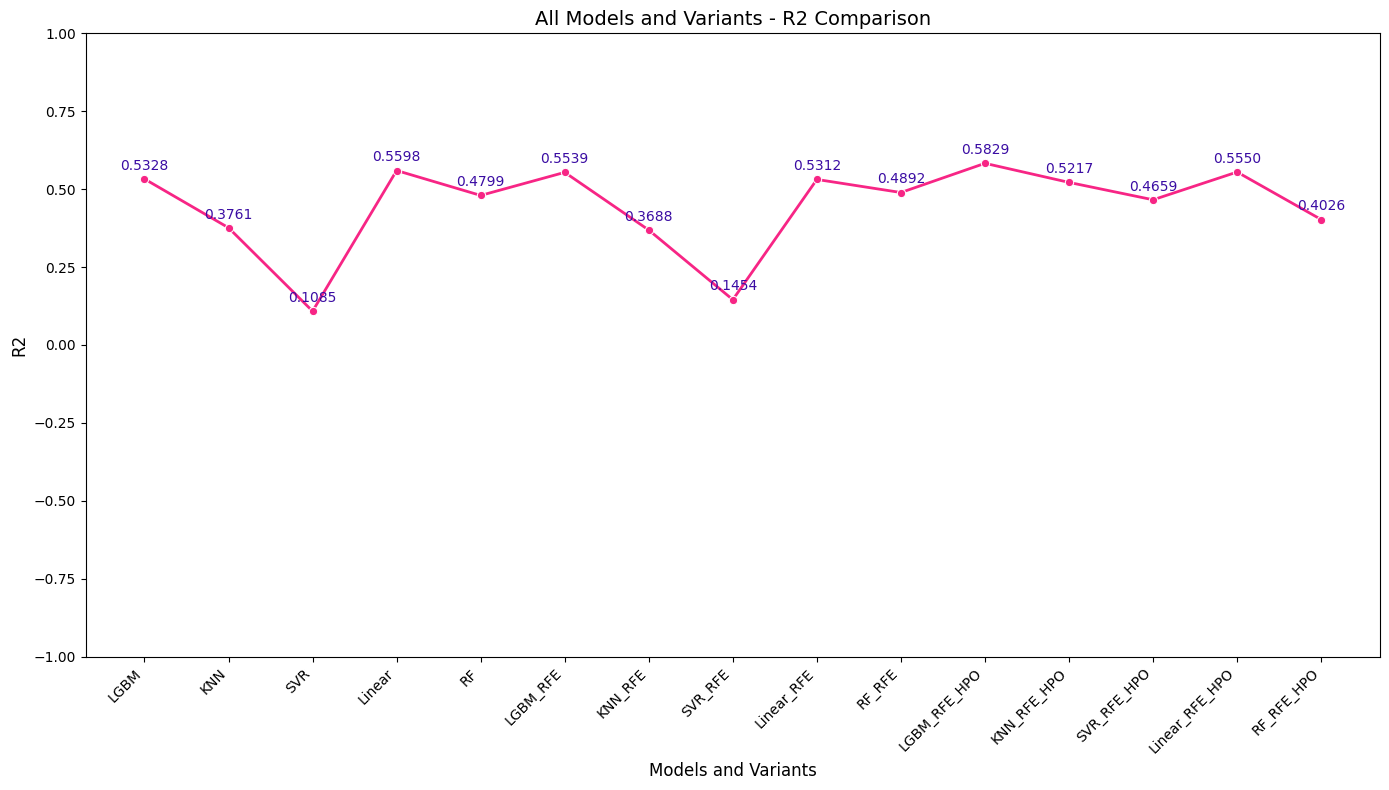

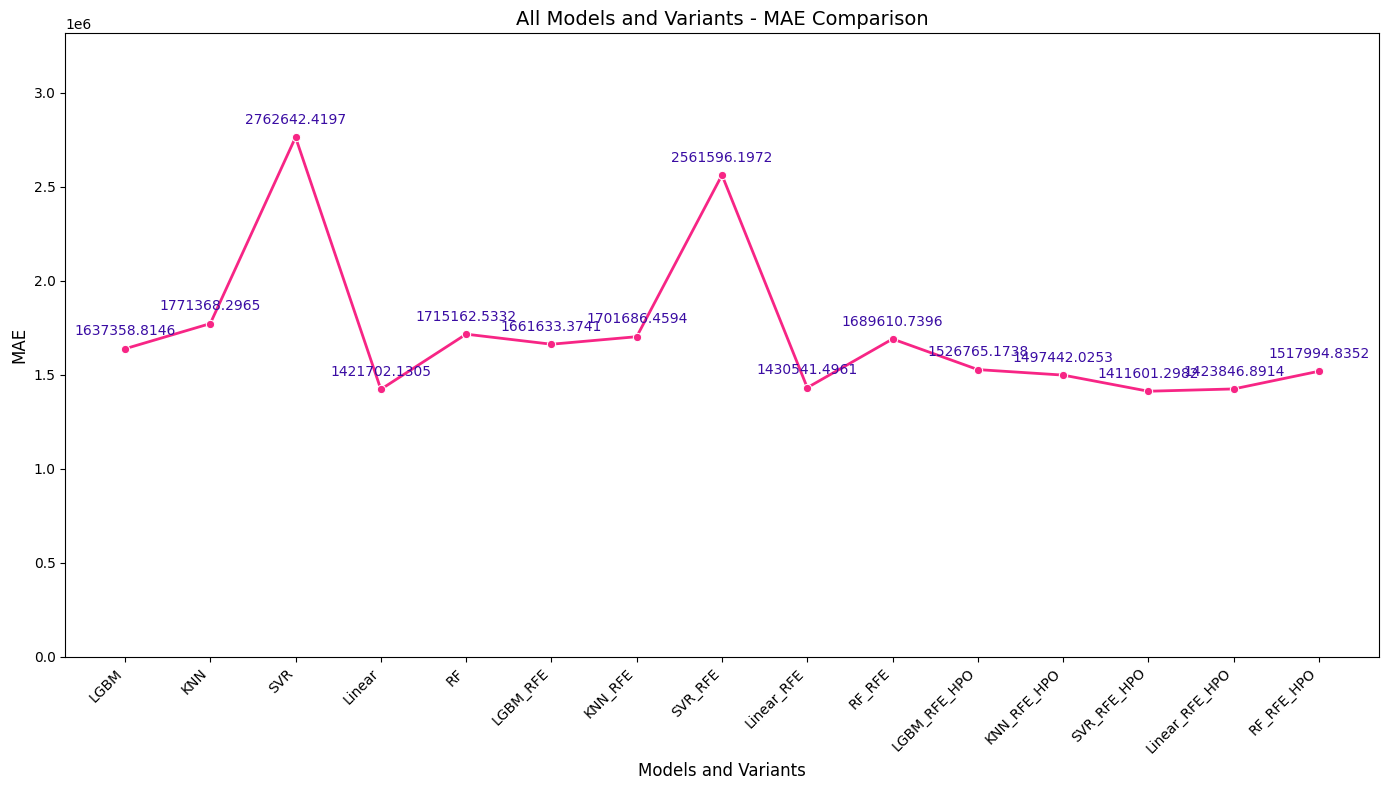

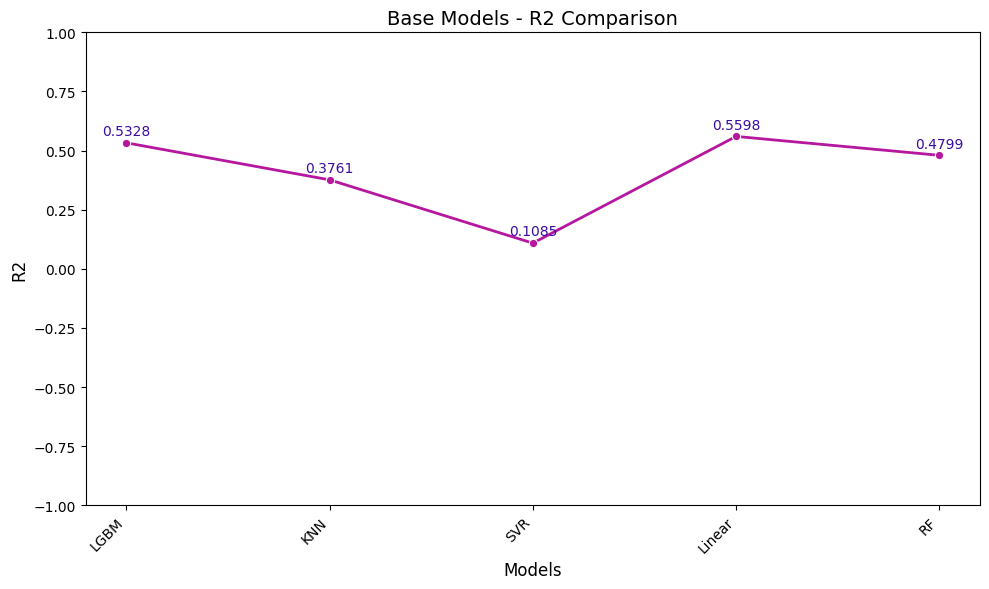

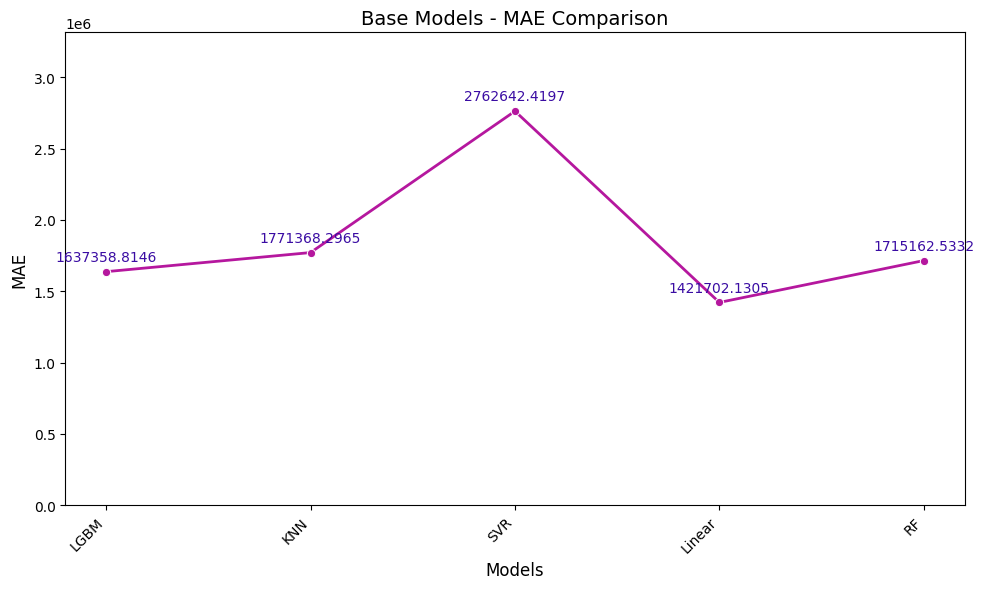

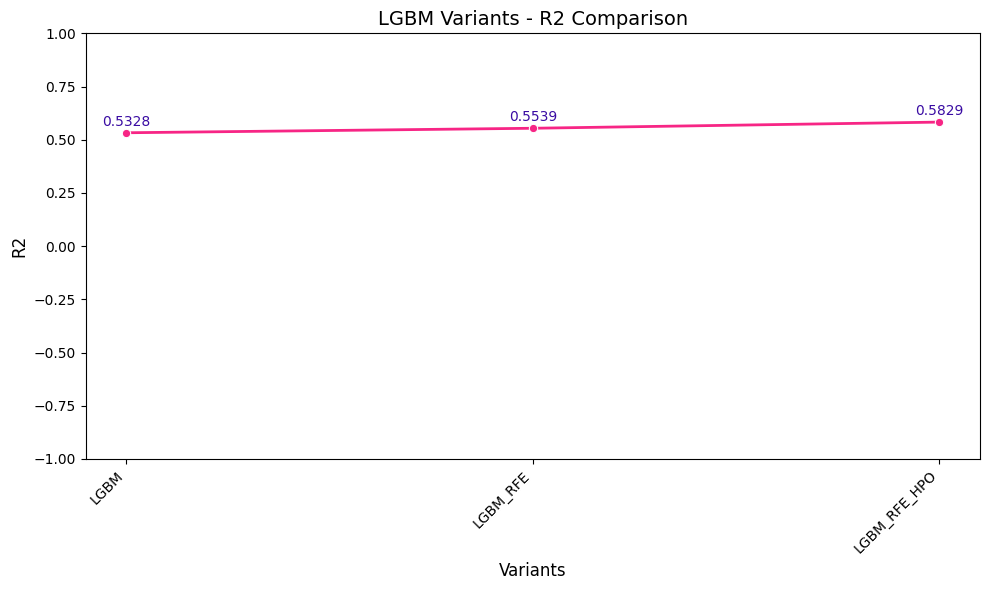

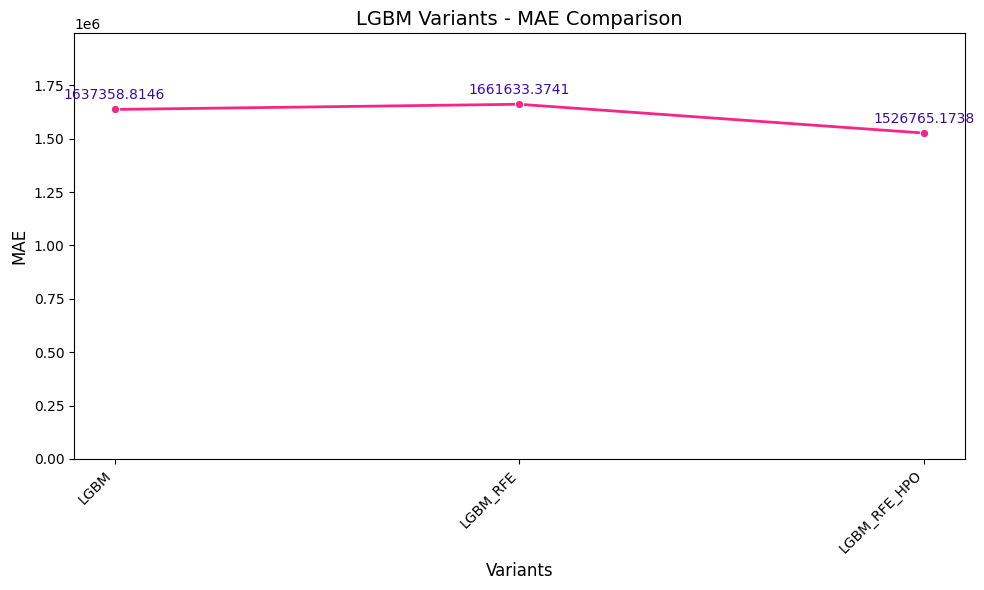

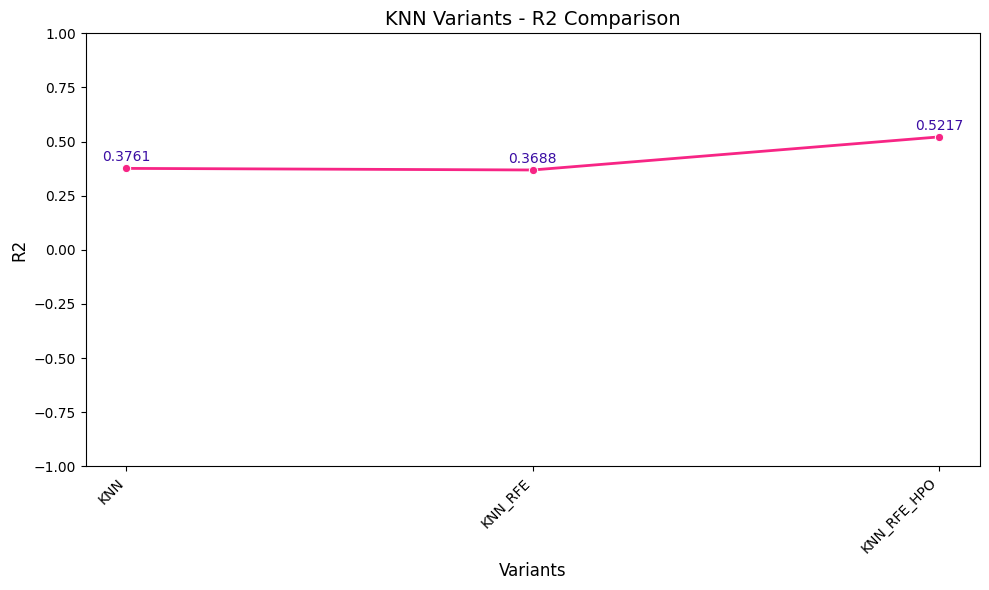

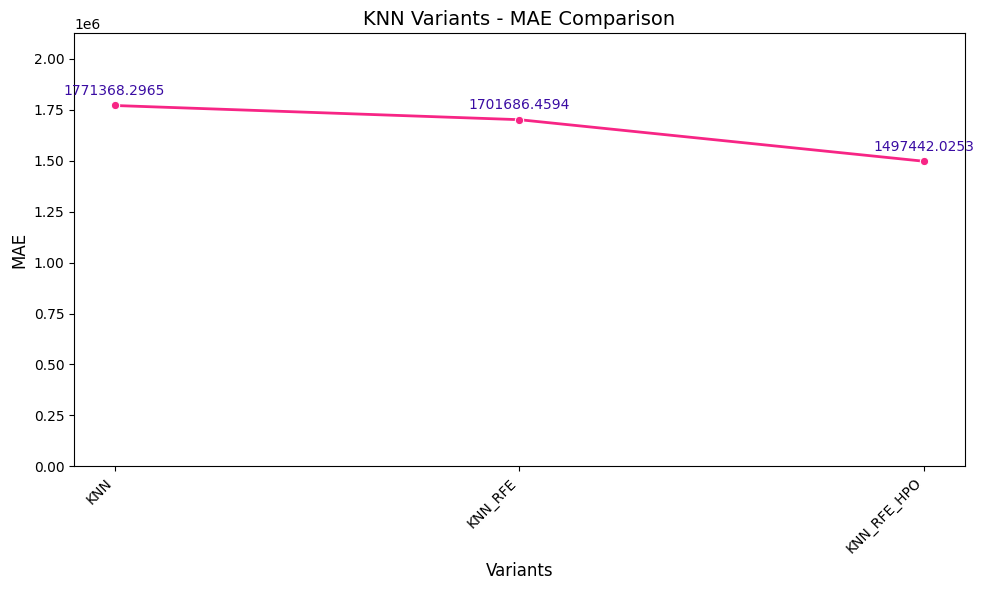

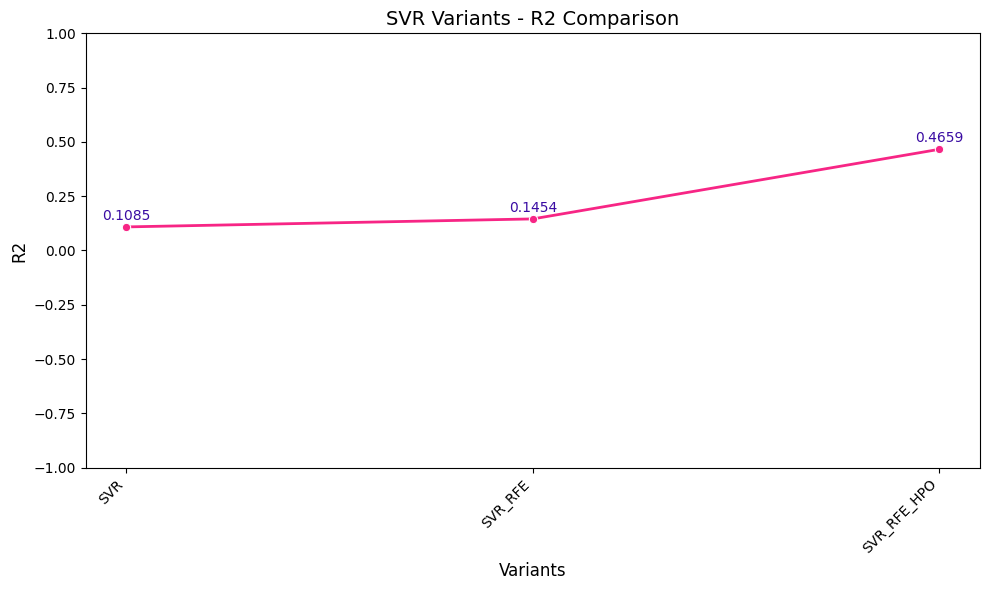

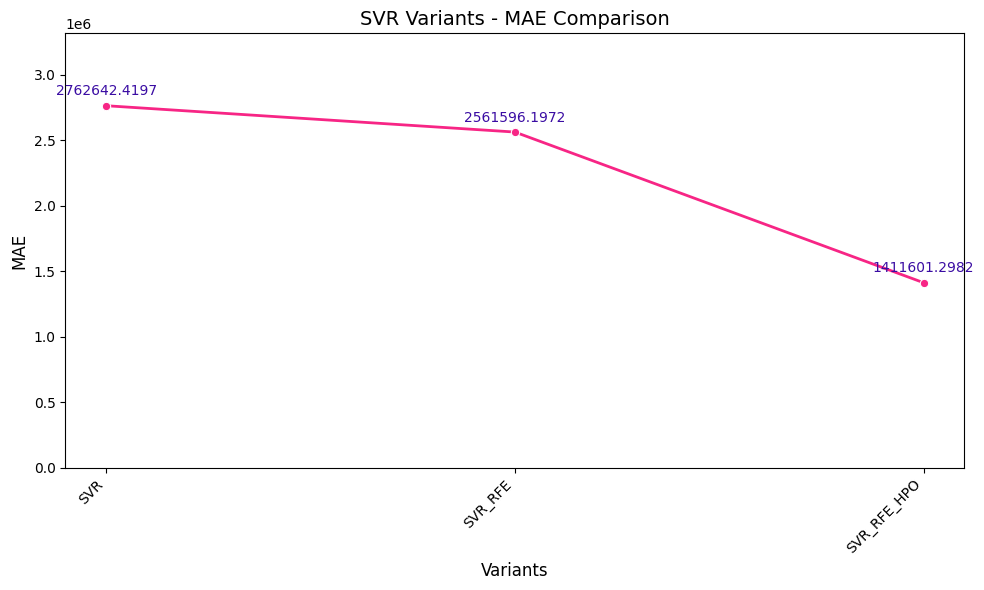

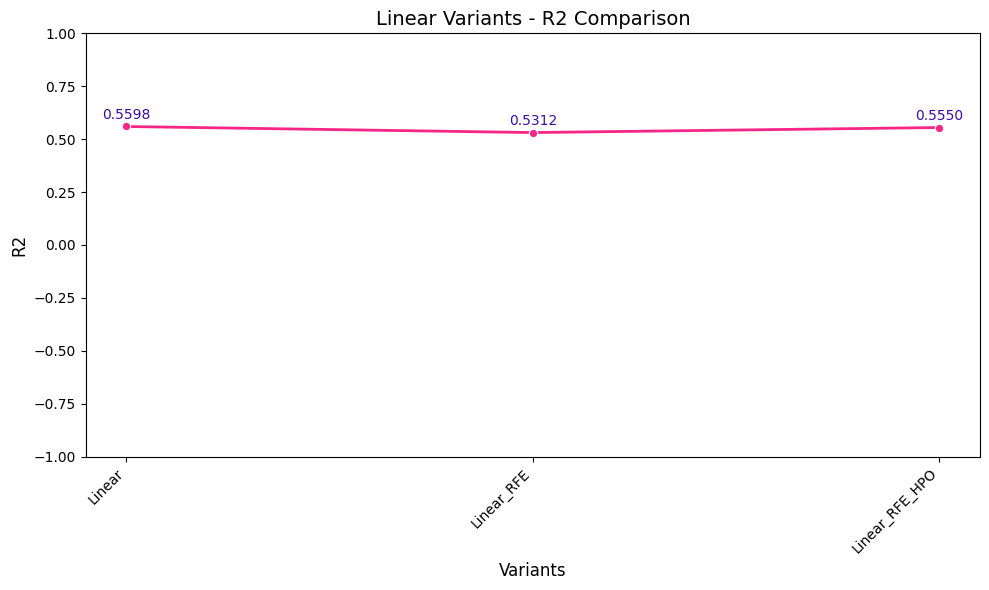

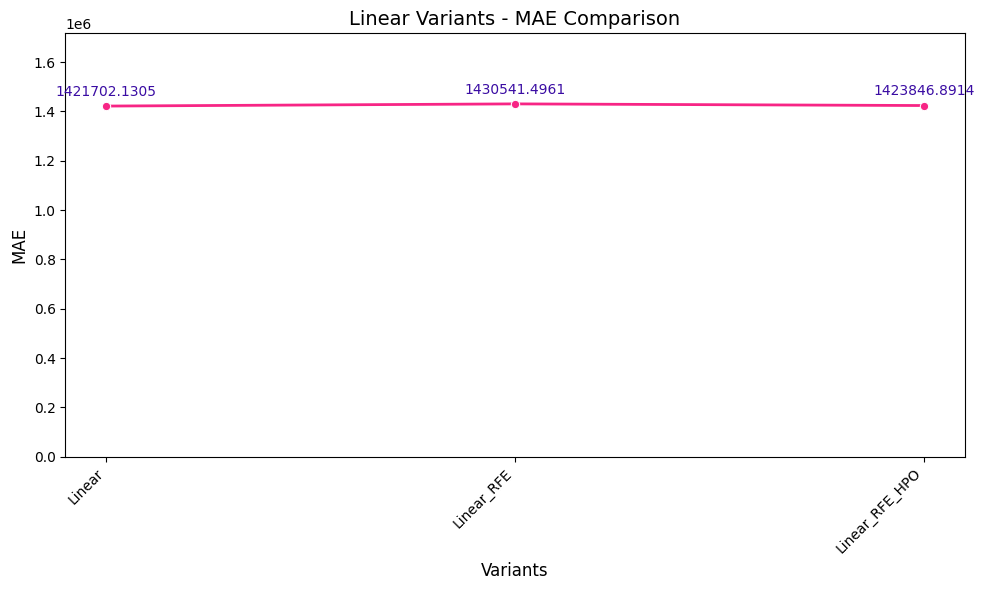

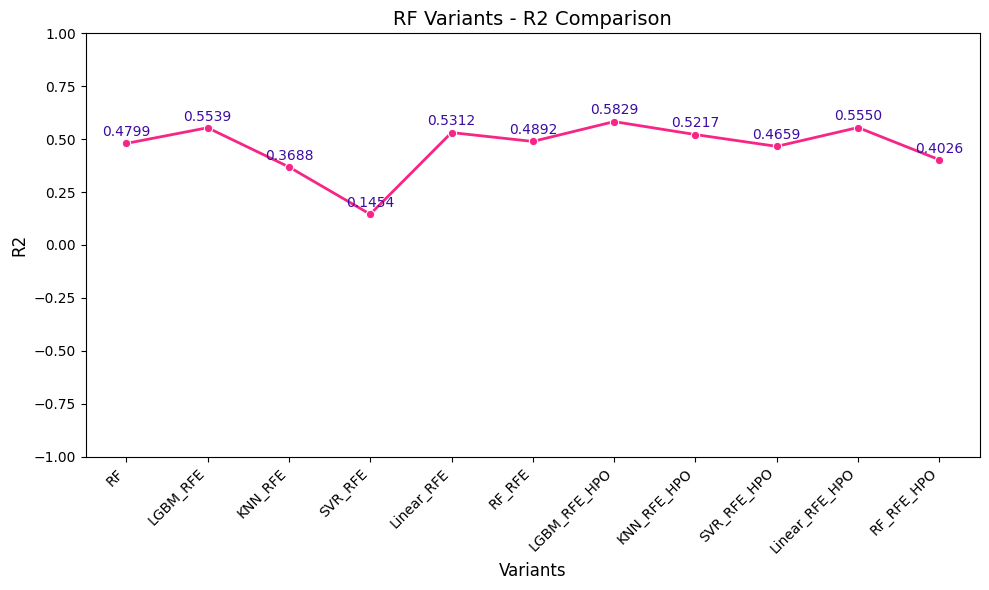

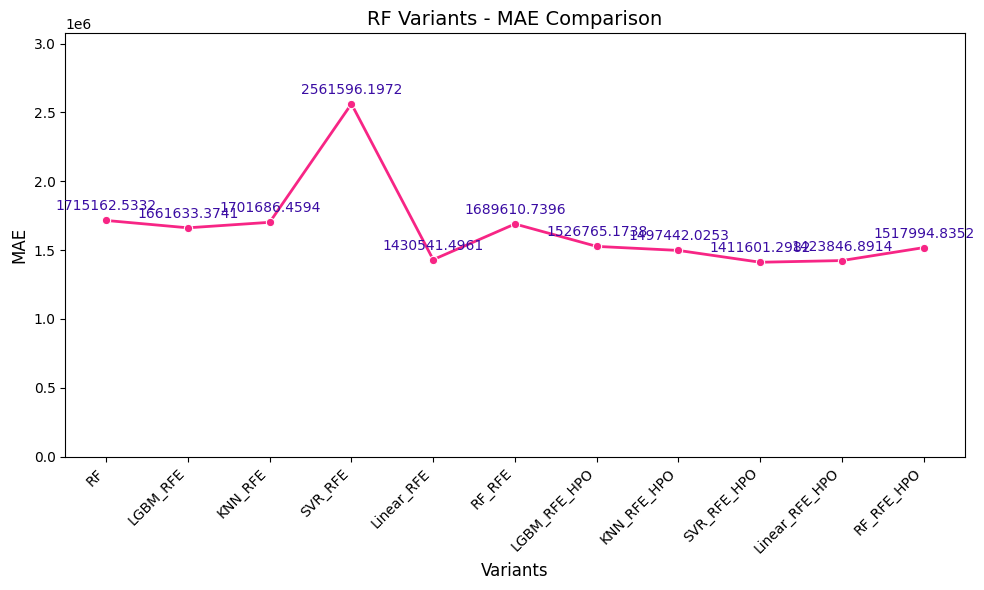

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Synthwave palette
def set_synthwave_palette():
    return ['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8',
            '#3a0ca3', '#3f37c9', '#4361ee', '#4895ef', '#4cc9f0']

# Visualization function for R² and MAE metrics using line plots
def plot_r2_mae_metrics(results_dict, metrics=['R2', 'MAE'], save_dir='.', palette=None):

    if palette is None:
        palette = set_synthwave_palette()

    # Combine results into a single DataFrame
    combined_df = pd.concat([df.set_index('Metric')['Cross_Validation'] for df in results_dict.values()], axis=1).T
    combined_df.index = list(results_dict.keys())
    combined_df = combined_df[metrics]  # Select only R² and MAE

    # Create save directory
    os.makedirs(save_dir, exist_ok=True)

    # 1. All Models and Variants Comparison
    for metric in metrics:
        plt.figure(figsize=(14, 8))
        # Use lineplot with markers for each model/variant
        sns.lineplot(x=combined_df.index, y=combined_df[metric], marker='o', color=palette[0], linewidth=2)
        plt.title(f'All Models and Variants - {metric} Comparison', fontsize=14)
        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models and Variants', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Adjust y-axis
        if metric == 'R2':
            plt.ylim(min(combined_df[metric].min() - 0.1, -1), 1)
        else:  # MAE
            plt.ylim(0, combined_df[metric].max() * 1.2)

        # Add value labels
        for i, v in enumerate(combined_df[metric]):
            plt.text(i, v + (0.02 if metric == 'R2' else combined_df[metric].max() * 0.02),
                     f'{v:.4f}', ha='center', va='bottom' if v >= 0 else 'top', color='#3a0ca3')

        plt.tight_layout()
        plt.savefig(f'{save_dir}/all_models_{metric}_line_comparison.png')
        plt.show()
        plt.close()

    # 2. Base Models Comparison (No RFE, No HPO)
    base_models = [k for k in results_dict.keys() if 'RFE' not in k and 'HPO' not in k]
    base_df = combined_df.loc[base_models]

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=base_df.index, y=base_df[metric], marker='o', color=palette[1], linewidth=2)
        plt.title(f'Base Models - {metric} Comparison', fontsize=14)
        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Adjust y-axis
        if metric == 'R2':
            plt.ylim(min(base_df[metric].min() - 0.1, -1), 1)
        else:  # MAE
            plt.ylim(0, base_df[metric].max() * 1.2)

        # Add value labels
        for i, v in enumerate(base_df[metric]):
            plt.text(i, v + (0.02 if metric == 'R2' else base_df[metric].max() * 0.02),
                     f'{v:.4f}', ha='center', va='bottom' if v >= 0 else 'top', color='#3a0ca3')

        plt.tight_layout()
        plt.savefig(f'{save_dir}/base_models_{metric}_line_comparison.png')
        plt.show()
        plt.close()

    # 3. Model Variants Comparison (Each model's variations)
    model_groups = {
      'LGBM': [k for k in results_dict.keys() if 'LGBM' in k],
      'KNN': [k for k in results_dict.keys() if 'KNN' in k],
      'SVR': [k for k in results_dict.keys() if 'SVR' in k],
      'Linear': [k for k in results_dict.keys() if 'Linear' in k or 'LR' in k],
      'RF': [k for k in results_dict.keys() if 'RF' in k],
  }

    # Convert model_groups keys to a list for indexing
    model_keys = list(model_groups.keys())

    for model, model_keys in model_groups.items():
        if not model_keys:
            continue
        model_df = combined_df.loc[model_keys]

        for metric in metrics:
            plt.figure(figsize=(10, 6))
            # Use model index from model_keys list
            sns.lineplot(x=model_df.index, y=model_df[metric], marker='o',
                         color=palette[model_keys.index(model) % len(palette)], linewidth=2)
            plt.title(f'{model} Variants - {metric} Comparison', fontsize=14)
            plt.ylabel(metric, fontsize=12)
            plt.xlabel('Variants', fontsize=12)
            plt.xticks(rotation=45, ha='right')

            # Adjust y-axis
            if metric == 'R2':
                plt.ylim(min(model_df[metric].min() - 0.1, -1), 1)
            else:  # MAE
                plt.ylim(0, model_df[metric].max() * 1.2)

            # Add value labels
            for i, v in enumerate(model_df[metric]):
                plt.text(i, v + (0.02 if metric == 'R2' else model_df[metric].max() * 0.02),
                         f'{v:.4f}', ha='center', va='bottom' if v >= 0 else 'top', color='#3a0ca3')

            plt.tight_layout()
            plt.savefig(f'{save_dir}/{model}_{metric}_line_variants_comparison.png')
            plt.show()
            plt.close()

# Results dictionary (including Random Forest)
results_dict = {
    'LGBM': result_lgbm,
    'KNN': result_knn,
    'SVR': result_svr,
    'Linear': result_linear,
    'RF': result_rf,
    'LGBM_RFE': result_lgbm_rfe,
    'KNN_RFE': result_knn_rfe,
    'SVR_RFE': result_svr_rfe,
    'Linear_RFE': result_linear_rfe,
    'RF_RFE': result_rf_rfe,
    'LGBM_RFE_HPO': result_lgbm_rfe_optuna,
    'KNN_RFE_HPO': result_knn_rfe_optuna,
    'SVR_RFE_HPO': result_svr_rfe_optuna,
    'Linear_RFE_HPO': result_linear_rfe_optuna,
    'RF_RFE_HPO': result_rf_rfe_optuna
}

# Run visualization
plot_r2_mae_metrics(
    results_dict,
    metrics=['R2', 'MAE'],
    save_dir='comparisons',
    palette=set_synthwave_palette()
)